In [1]:
# Import required libraries

import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (30.0, 15.0)

import operator
import datetime
import re
import random

from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, CuDNNLSTM, GRU, CuDNNGRU, SimpleRNN, ConvLSTM2D, Dropout, BatchNormalization, Bidirectional
from keras.layers.advanced_activations import PReLU
from keras.utils import plot_model

from keras.models import Model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint

/data/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# df = pd.read_csv('../data/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2018-01-08.csv', sep=',', header=0)
# df.head()

In [3]:
# def timestamp_to_datetime_conversion(row):
#     return datetime.datetime.fromtimestamp(row['Timestamp']).strftime('%Y-%m-%d %H:%M:%S')

# # for rowid, row in df.iterrows():
# #     print datetime.datetime.fromtimestamp(row['Timestamp']).strftime('%Y-%m-%d %H:%M:%S')
# #     if rowid > 10:
# #         break
        
# df['datetime'] = df.apply(timestamp_to_datetime_conversion, axis=1)

In [4]:
# df['datetime_pandas'] = pd.to_datetime(df['datetime'])
# df['day_of_month'] = df['datetime_pandas'].dt.day
# df['month'] = df['datetime_pandas'].dt.month
# df['year'] = df['datetime_pandas'].dt.year
# df['weekday'] = df['datetime_pandas'].dt.weekday
# df['week'] = df['datetime_pandas'].dt.week
# df['hour'] = df['datetime_pandas'].dt.hour
# df['minute'] = df['datetime_pandas'].dt.minute
# df.head()

In [5]:
# df.to_csv('../data/bitstamp_minute_data.csv', sep=',', index=False)

In [6]:
df = pd.read_csv('../data/bitstamp_minute_data.csv', sep=',')
print df.shape
df.sort_values(by=['year', 'month', 'day_of_month', 'hour'], inplace=True)
df.head()

(3161057, 17)


Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980  4.39  4.39  4.39   4.39      0.455581                2.0   
2  1325318040  4.39  4.39  4.39   4.39      0.455581                2.0   
3  1325318100  4.39  4.39  4.39   4.39      0.455581                2.0   
4  1325318160  4.39  4.39  4.39   4.39      0.455581                2.0   

   Weighted_Price             datetime      datetime_pandas  day_of_month  \
0            4.39  2011-12-31 07:52:00  2011-12-31 07:52:00            31   
1            4.39  2011-12-31 07:53:00  2011-12-31 07:53:00            31   
2            4.39  2011-12-31 07:54:00  2011-12-31 07:54:00            31   
3            4.39  2011-12-31 07:55:00  2011-12-31 07:55:00            31   
4            4.39  2011-12-31 07:56:00  2011-12-31 07:56:00            31   

   month  year  weekday  week  hour  minute  
0     12  2011        5    52     7      52  
1     12  2011        5    52     7      53  
2     12  2011        5    52     7      54  
3     12  2011        5    52     7      55  
4     12  2011        5    52     7      56

In [7]:
print df.columns.values
df.sort_values(by='Timestamp', inplace=True)
features = ['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price', 'day_of_month', 'month', 'year', 'weekday', 'week', 'hour', 'minute', 'Close']
hour_features = ['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price', 'day_of_month', 'month', 'year', 'weekday', 'week', 'hour', 'Close']
print features
print df.shape

['Timestamp' 'Open' 'High' 'Low' 'Close' 'Volume_(BTC)'
 'Volume_(Currency)' 'Weighted_Price' 'datetime' 'datetime_pandas'
 'day_of_month' 'month' 'year' 'weekday' 'week' 'hour' 'minute']
['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price', 'day_of_month', 'month', 'year', 'weekday', 'week', 'hour', 'minute', 'Close']
(3161057, 17)


In [8]:
df['datetime_pandas'] = pd.to_datetime(df['datetime_pandas'])
df['Date'] = df['datetime_pandas'].apply(lambda x: x.date())
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date']<'2018-01-01']
del df['Timestamp']
del df['datetime']
del df['datetime_pandas']
df.tail(30)

Open      High       Low     Close  Volume_(BTC)  \
3150946  13950.00  13950.00  13930.00  13930.00      1.683328   
3150947  13930.00  13951.59  13930.00  13951.59      4.376772   
3150948  13950.06  13960.00  13945.21  13960.00     14.119377   
3150949  13970.07  13970.07  13931.34  13957.10      0.309732   
3150950  13957.19  13957.19  13957.19  13957.19      1.280621   
3150951  13957.19  13993.92  13930.00  13988.34     15.435691   
3150952  13980.80  13980.80  13963.21  13963.89      1.825191   
3150953  13999.91  13999.91  13963.22  13987.68      0.587565   
3150954  13931.60  13999.81  13931.60  13999.81      4.161676   
3150955  13932.16  13999.98  13932.16  13957.50      3.054607   
3150956  13979.17  13979.17  13957.53  13957.61      1.996414   
3150957  13990.00  13990.00  13989.80  13989.80      1.383335   
3150958  13957.74  13973.69  13930.00  13959.87      4.466697   
3150959  13930.00  13959.65  13930.00  13930.00      6.244358   
3150960  13930.00  13959.41  13888.03  13890.95      7.715447   
3150961  13888.01  13929.96  13888.01  13929.96      0.379710   
3150962  13929.96  13950.00  13889.01  13889.01      1.764234   
3150963  13941.61  13941.61  13941.61  13941.61      0.000869   
3150964  13941.44  13957.01  13941.40  13942.35      6.054410   
3150965  13942.30  13942.30  13927.34  13927.34      3.163530   
3150966  13927.34  13927.34  13892.57  13927.28      0.565494   
3150967  13892.57  13927.21  13885.00  13885.00      0.595928   
3150968  13885.00  13898.32  13823.19  13883.13      7.153715   
3150969  13854.52  13898.70  13840.85  13884.15     10.469531   
3150970  13884.14  13884.14  13823.88  13854.28      4.810702   
3150971  13825.05  13825.05  13825.05  13825.05      0.065501   
3150972  13827.00  13908.69  13827.00  13859.58      0.666459   
3150973  13908.73  13913.26  13874.99  13913.26      0.775012   
3150974  13913.26  13953.83  13884.69  13953.77      1.398784   
3150975  13913.28  13913.28  13867.18  13880.00      0.591748   

         Volume_(Currency)  Weighted_Price  day_of_month  month  year  \
3150946       23473.988712    13944.990705            31     12  2017   
3150947       61024.849398    13942.891170            31     12  2017   
3150948      197096.693070    13959.304855            31     12  2017   
3150949        4318.640489    13943.146579            31     12  2017   
3150950       17873.872569    13957.190000            31     12  2017   
3150951      215218.037020    13942.883282            31     12  2017   
3150952       25487.410961    13964.245238            31     12  2017   
3150953        8217.678618    13985.980690            31     12  2017   
3150954       58148.432686    13972.358169            31     12  2017   
3150955       42680.903879    13972.634618            31     12  2017   
3150956       27896.007785    13973.060874            31     12  2017   
3150957       19352.664239    13989.862020            31     12  2017   
3150958       62339.612690    13956.535677            31     12  2017   
3150959       86991.331749    13931.189199            31     12  2017   
3150960      107560.828630    13940.971457            31     12  2017   
3150961        5274.080901    13889.761809            31     12  2017   
3150962       24562.623466    13922.541668            31     12  2017   
3150963          12.118187    13941.610000            31     12  2017   
3150964       84444.849897    13947.660084            31     12  2017   
3150965       44106.812325    13942.276846            31     12  2017   
3150966        7875.567986    13926.874215            31     12  2017   
3150967        8286.110265    13904.543251            31     12  2017   
3150968       99031.560361    13843.375871            31     12  2017   
3150969      145355.986210    13883.714956            31     12  2017   
3150970       66709.577154    13866.911428            31     12  2017   
3150971         905.560130    13825.050000            31     12  2017   
3150972        9218.975090

In [9]:
open_df = df[df['minute']==0][['Open', 'Date', 'hour']]
close_df = df[df['minute']==59][['Close', 'Date', 'hour']]
close_df.tail()

Close       Date  hour
3150735  13949.61 2017-12-31    19
3150795  14111.28 2017-12-31    20
3150855  13977.47 2017-12-31    21
3150915  13937.95 2017-12-31    22
3150975  13880.00 2017-12-31    23

In [10]:
high_df = df[['High', 'Date', 'hour']].groupby(['Date', 'hour']).max()
high_df.reset_index(inplace=True)
low_df = df[['Low', 'Date', 'hour']].groupby(['Date', 'hour']).min()
low_df.reset_index(inplace=True)
low_df.tail()

Date  hour       Low
52513 2017-12-31    19  13804.25
52514 2017-12-31    20  13948.95
52515 2017-12-31    21  13944.64
52516 2017-12-31    22  13803.20
52517 2017-12-31    23  13807.86

In [11]:
volume_df = df[['Volume_(BTC)','Volume_(Currency)', 'Date', 'hour']].groupby(['Date', 'hour']).sum()
volume_df.reset_index(inplace=True)
volume_df.tail()

Date  hour  Volume_(BTC)  Volume_(Currency)
52513 2017-12-31    19    207.963504       2.893771e+06
52514 2017-12-31    20    362.943308       5.131342e+06
52515 2017-12-31    21    263.540150       3.692298e+06
52516 2017-12-31    22    267.845331       3.733251e+06
52517 2017-12-31    23    223.238758       3.108604e+06

In [12]:
wprice_df = df[['Weighted_Price', 'day_of_month', 'month', 'year', 'weekday', 'week', 'Date', 'hour']].groupby(['day_of_month', 'month', 'year', 'weekday', 'week', 'Date', 'hour']).mean()
wprice_df.reset_index(inplace=True)
wprice_df.tail()

day_of_month  month  year  weekday  week       Date  hour  \
52513            31     12  2017        6    52 2017-12-31    19   
52514            31     12  2017        6    52 2017-12-31    20   
52515            31     12  2017        6    52 2017-12-31    21   
52516            31     12  2017        6    52 2017-12-31    22   
52517            31     12  2017        6    52 2017-12-31    23   

       Weighted_Price  
52513    13929.576077  
52514    14085.825194  
52515    14003.624168  
52516    13946.834307  
52517    13914.049529

In [13]:
hour_df = pd.merge(wprice_df, volume_df, on=['Date', 'hour'])
print hour_df.shape
hour_df = pd.merge(hour_df, high_df, on=['Date', 'hour'])
print hour_df.shape
hour_df = pd.merge(hour_df, low_df, on=['Date', 'hour'])
print hour_df.shape
hour_df = pd.merge(hour_df, open_df, on=['Date', 'hour'])
print hour_df.shape
hour_df = pd.merge(hour_df, close_df, on=['Date', 'hour'])
print hour_df.shape
hour_df.tail()

(52518, 10)
(52518, 11)
(52518, 12)
(52516, 13)
(52515, 14)


day_of_month  month  year  weekday  week       Date  hour  \
52510            31     12  2017        6    52 2017-12-31    19   
52511            31     12  2017        6    52 2017-12-31    20   
52512            31     12  2017        6    52 2017-12-31    21   
52513            31     12  2017        6    52 2017-12-31    22   
52514            31     12  2017        6    52 2017-12-31    23   

       Weighted_Price  Volume_(BTC)  Volume_(Currency)      High       Low  \
52510    13929.576077    207.963504       2.893771e+06  14049.78  13804.25   
52511    14085.825194    362.943308       5.131342e+06  14296.06  13948.95   
52512    14003.624168    263.540150       3.692298e+06  14166.00  13944.64   
52513    13946.834307    267.845331       3.733251e+06  14050.00  13803.20   
52514    13914.049529    223.238758       3.108604e+06  13999.98  13807.86   

           Open     Close  
52510  13840.53  13949.61  
52511  13949.65  14111.28  
52512  14111.20  13977.47  
52513  14024.70  13937.95  
52514  13925.00  13880.00

In [14]:
# hour_df = df[features].groupby(['day_of_month', 'month', 'year', 'weekday', 'week', 'hour']).mean()
# hour_df.reset_index(inplace=True)
# hour_df.sort_values(by=['year', 'month', 'day_of_month', 'hour'], inplace=True)
# hour_df.reset_index(inplace=True)
# hour_df.tail(50)

In [15]:
# df = df[features]
# print df.shape
# df.tail()

hour_df = hour_df.sort_values(by=['Date', 'hour'], ascending=True)
hour_df.reset_index(inplace=True)
hour_df = hour_df[hour_features]
print hour_df.shape

hour_df.tail()

(52515, 13)


Open      High       Low  Volume_(BTC)  Volume_(Currency)  \
52510  13840.53  14049.78  13804.25    207.963504       2.893771e+06   
52511  13949.65  14296.06  13948.95    362.943308       5.131342e+06   
52512  14111.20  14166.00  13944.64    263.540150       3.692298e+06   
52513  14024.70  14050.00  13803.20    267.845331       3.733251e+06   
52514  13925.00  13999.98  13807.86    223.238758       3.108604e+06   

       Weighted_Price  day_of_month  month  year  weekday  week  hour  \
52510    13929.576077            31     12  2017        6    52    19   
52511    14085.825194            31     12  2017        6    52    20   
52512    14003.624168            31     12  2017        6    52    21   
52513    13946.834307            31     12  2017        6    52    22   
52514    13914.049529            31     12  2017        6    52    23   

          Close  
52510  13949.61  
52511  14111.28  
52512  13977.47  
52513  13937.95  
52514  13880.00

In [16]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1):
    n_vars = 1 if type(data) is list else data.shape[1]
    temp_df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(temp_df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(temp_df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    return agg

In [17]:
# ensure all data is float
# values = df.values.astype('float32')
values = hour_df.values.astype('float32')

# frame as supervised learning
reframed = series_to_supervised(values, 3, 1)
print reframed.shape
reframed.tail()

(52515, 52)


var1(t-3)     var2(t-3)     var3(t-3)    var4(t-3)   var5(t-3)  \
52510  13351.009766  14187.570312  13301.780273  1673.169922  23241072.0   
52511  14036.400391  14081.700195  13768.799805   566.864624   7906635.5   
52512  13987.580078  14006.330078  13777.559570   217.305984   3019932.5   
52513  13840.530273  14049.780273  13804.250000   207.963501   2893771.0   
52514  13949.650391  14296.059570  13948.950195   362.943298   5131341.5   

          var6(t-3)  var7(t-3)  var8(t-3)  var9(t-3)  var10(t-3)  \
52510  13894.583984       31.0       12.0     2017.0         6.0   
52511  13947.277344       31.0       12.0     2017.0         6.0   
52512  13912.181641       31.0       12.0     2017.0         6.0   
52513  13929.576172       31.0       12.0     2017.0         6.0   
52514  14085.825195       31.0       12.0     2017.0         6.0   

           ...          var4(t)     var5(t)       var6(t)  var7(t)  var8(t)  \
52510      ...       207.963501  2893771.00  13929.576172     31.0     12.0   
52511      ...       362.943298  5131341.50  14085.825195     31.0     12.0   
52512      ...       263.540161  3692298.00  14003.624023     31.0     12.0   
52513      ...       267.845337  3733250.75  13946.833984     31.0     12.0   
52514      ...       223.238754  3108604.00  13914.049805     31.0     12.0   

       var9(t)  var10(t)  var11(t)  var12(t)      var13(t)  
52510   2017.0       6.0      52.0      19.0  13949.610352  
52511   2017.0       6.0      52.0      20.0  14111.280273  
52512   2017.0       6.0      52.0      21.0  13977.469727  
52513   2017.0       6.0      52.0      22.0  13937.950195  
52514   2017.0       6.0      52.0      23.0  13880.000000  

[5 rows x 52 columns]

In [18]:
for col in reframed.columns:
    if "(t)" in col:
        if col in ['var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)']:
            del reframed[col]

print reframed.shape
reframed.fillna(0, inplace=True)
reframed.head()

(52515, 46)


var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var6(t-3)  \
0       0.00       0.00       0.00   0.000000        0.0       0.00   
1       0.00       0.00       0.00   0.000000        0.0       0.00   
2       0.00       0.00       0.00   0.000000        0.0       0.00   
3       4.39       4.39       4.39  27.334852      120.0       4.39   
4       4.39       4.39       4.39  27.334852      120.0       4.39   

   var7(t-3)  var8(t-3)  var9(t-3)  var10(t-3)    ...     var11(t-1)  \
0        0.0        0.0        0.0         0.0    ...            0.0   
1        0.0        0.0        0.0         0.0    ...           52.0   
2        0.0        0.0        0.0         0.0    ...           52.0   
3       31.0       12.0     2011.0         5.0    ...           52.0   
4       31.0       12.0     2011.0         5.0    ...           52.0   

   var12(t-1)  var13(t-1)  var7(t)  var8(t)  var9(t)  var10(t)  var11(t)  \
0         0.0        0.00     31.0     12.0   2011.0       5.0      52.0   
1         8.0        4.39     31.0     12.0   2011.0       5.0      52.0   
2         9.0        4.39     31.0     12.0   2011.0       5.0      52.0   
3        10.0        4.39     31.0     12.0   2011.0       5.0      52.0   
4        11.0        4.39     31.0     12.0   2011.0       5.0      52.0   

   var12(t)  var13(t)  
0       8.0      4.39  
1       9.0      4.39  
2      10.0      4.39  
3      11.0      4.39  
4      12.0      4.39  

[5 rows x 46 columns]

In [19]:
reframed.tail()

var1(t-3)     var2(t-3)     var3(t-3)    var4(t-3)   var5(t-3)  \
52510  13351.009766  14187.570312  13301.780273  1673.169922  23241072.0   
52511  14036.400391  14081.700195  13768.799805   566.864624   7906635.5   
52512  13987.580078  14006.330078  13777.559570   217.305984   3019932.5   
52513  13840.530273  14049.780273  13804.250000   207.963501   2893771.0   
52514  13949.650391  14296.059570  13948.950195   362.943298   5131341.5   

          var6(t-3)  var7(t-3)  var8(t-3)  var9(t-3)  var10(t-3)  \
52510  13894.583984       31.0       12.0     2017.0         6.0   
52511  13947.277344       31.0       12.0     2017.0         6.0   
52512  13912.181641       31.0       12.0     2017.0         6.0   
52513  13929.576172       31.0       12.0     2017.0         6.0   
52514  14085.825195       31.0       12.0     2017.0         6.0   

           ...       var11(t-1)  var12(t-1)    var13(t-1)  var7(t)  var8(t)  \
52510      ...             52.0        18.0  13808.190430     31.0     12.0   
52511      ...             52.0        19.0  13949.610352     31.0     12.0   
52512      ...             52.0        20.0  14111.280273     31.0     12.0   
52513      ...             52.0        21.0  13977.469727     31.0     12.0   
52514      ...             52.0        22.0  13937.950195     31.0     12.0   

       var9(t)  var10(t)  var11(t)  var12(t)      var13(t)  
52510   2017.0       6.0      52.0      19.0  13949.610352  
52511   2017.0       6.0      52.0      20.0  14111.280273  
52512   2017.0       6.0      52.0      21.0  13977.469727  
52513   2017.0       6.0      52.0      22.0  13937.950195  
52514   2017.0       6.0      52.0      23.0  13880.000000  

[5 rows x 46 columns]

In [20]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
values = scaler.fit_transform(reframed.values)

In [55]:
print values.shape
train, test, valid, train_X, train_y, test_X, test_y, valid_X, valid_y = None, None, None, None, None, None, None, None, None
def gen_train_data():
    global train, test, valid, train_X, train_y, test_X, test_y, valid_X, valid_y
    # split into train and test sets
    train = values[25000:52350, :]
    test = values[52350:52450, :]
    valid = values[np.random.choice(values[40000:].shape[0], 5000, replace=False), :]

    print type(values)
    # split into input and outputs
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]
    valid_X, valid_y = valid[:, :-1], valid[:, -1]

    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    valid_X = valid_X.reshape((valid_X.shape[0], 1, valid_X.shape[1]))
    print train_X.shape, train_y.shape, test_X.shape, test_y.shape, valid_X.shape, valid_y.shape


(52515, 46)


In [82]:
# design network
def get_lstm1_model(with_bidirectional=False):
    global train, test, valid, train_X, train_y, test_X, test_y, valid_X, valid_y
    model = Sequential()

    if with_bidirectional:
        model.add(Bidirectional(LSTM(384), input_shape=(train_X.shape[1], train_X.shape[2])))
    else:
        model.add(LSTM(384, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(1))
    return model

def get_gru1_model(with_bidirectional=False):
    global train, test, valid, train_X, train_y, test_X, test_y, valid_X, valid_y
    model = Sequential()

    if with_bidirectional:
        model.add(Bidirectional(GRU(384), input_shape=(train_X.shape[1], train_X.shape[2])))
    else:
        model.add(GRU(384, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(1))
    return model

def get_lstm2_model(with_bidirectional=False):
    global train, test, valid, train_X, train_y, test_X, test_y, valid_X, valid_y
    model = Sequential()

    if with_bidirectional:
        model.add(Bidirectional(LSTM(384, return_sequences=True), input_shape=(train_X.shape[1], train_X.shape[2])))
    else:
        model.add(LSTM(384, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    if with_bidirectional:
        model.add(Bidirectional(LSTM(384)))
    else:
        model.add(LSTM(384))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(1))
    return model

def get_gru2_model(with_bidirectional=False):
    global train, test, valid, train_X, train_y, test_X, test_y, valid_X, valid_y
    model = Sequential()

    if with_bidirectional:
        model.add(Bidirectional(GRU(384, return_sequences=True), input_shape=(train_X.shape[1], train_X.shape[2])))
    else:
        model.add(GRU(384, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    if with_bidirectional:
        model.add(Bidirectional(GRU(384)))
    else:
        model.add(GRU(384))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(1))
    return model

def get_lstm3_model(with_bidirectional=False):
    global train, test, valid, train_X, train_y, test_X, test_y, valid_X, valid_y
    model = Sequential()

    if with_bidirectional:
        model.add(Bidirectional(LSTM(384, return_sequences=True), input_shape=(train_X.shape[1], train_X.shape[2])))
    else:
        model.add(LSTM(384, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    if with_bidirectional:
        model.add(Bidirectional(LSTM(384, return_sequences=True)))
    else:
        model.add(LSTM(384, return_sequences=True))
    model.add(Dropout(0.5))

    if with_bidirectional:
        model.add(Bidirectional(LSTM(384)))
    else:
        model.add(LSTM(384))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(1))
    return model

def get_gru3_model(with_bidirectional=False):
    global train, test, valid, train_X, train_y, test_X, test_y, valid_X, valid_y
    model = Sequential()

    if with_bidirectional:
        model.add(Bidirectional(GRU(384, return_sequences=True), input_shape=(train_X.shape[1], train_X.shape[2])))
    else:
        model.add(GRU(384, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    if with_bidirectional:
        model.add(Bidirectional(GRU(384, return_sequences=True)))
    else:
        model.add(GRU(384, return_sequences=True))
    model.add(Dropout(0.5))

    if with_bidirectional:
        model.add(Bidirectional(GRU(384)))
    else:
        model.add(GRU(384))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(1))
    return model



In [91]:
def run_rnn(with_model, with_bidirectional, n):
    global train, test, valid, train_X, train_y, test_X, test_y, valid_X, valid_y
    gen_train_data()
    
    if with_model=='lstm1':
        model = get_lstm1_model(with_bidirectional, n)
    elif with_model=='lstm2':
        model = get_lstm2_model(with_bidirectional)
    elif with_model=='lstm3':
        model = get_lstm3_model(with_bidirectional)
    elif with_model=='gru1':
        model = get_gru1_model(with_bidirectional)
    elif with_model=='gru2':
        model = get_gru2_model(with_bidirectional)
    elif with_model=='gru3':
        model = get_gru3_model(with_bidirectional)
        
    model.compile(loss='mse', optimizer='adam')
    print model.summary()

    earlystop = EarlyStopping(monitor='loss', min_delta=0.0000001, patience=64, verbose=1, mode='auto')
    checkpointer = ModelCheckpoint(filepath='../output/tmp/model_lstm.hdf5', verbose=1, save_best_only=True)
    callbacks_list = [earlystop, checkpointer]

    # fit network
    history = model.fit(train_X, train_y, epochs=500, batch_size=384, 
                        validation_data=(test_X, test_y), callbacks=callbacks_list, shuffle=False)

    # plot history
    plt.plot(history.history['loss'][:], label='train')
    plt.plot(history.history['val_loss'][:], label='test')
    plt.legend()
    plt.show()

    if with_model=='lstm1':
        model = get_lstm1_model(with_bidirectional, n)
    elif with_model=='lstm2':
        model = get_lstm2_model(with_bidirectional)
    elif with_model=='lstm3':
        model = get_lstm3_model(with_bidirectional)
    elif with_model=='gru1':
        model = get_gru1_model(with_bidirectional)
    elif with_model=='gru2':
        model = get_gru2_model(with_bidirectional)
    elif with_model=='gru3':
        model = get_gru3_model(with_bidirectional)
        
    model.load_weights("../output/tmp/model_lstm.hdf5")
    model.compile(loss='mse', optimizer='adam')
    print model.summary()


    # make a prediction
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

    # invert scaling for forecast
    inv_yhat = np.concatenate((test_X, yhat), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,-1]

    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = np.concatenate((test_X, test_y), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,-1]

    # calculate RMSE
    rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
    print 'Test RMSE: %.3f' % rmse
    result = pd.DataFrame()
    result['actual'] = inv_y
    result['prediction'] = inv_yhat
    plt.plot(inv_y, label='actual_y')
    plt.plot(inv_yhat, label='pred_y')
    plt.legend()
    plt.show()

    binary_op_actual, binary_op_pred = [], []
    prev_val = 0
    for i, val in enumerate(result['actual'].values):
        if i > 0:
            if val > prev_val:
                binary_op_actual.append(1)
            else:
                binary_op_actual.append(0)
        prev_val = val

    prev_val = 0
    for i, val in enumerate(result['prediction'].values):
        if i > 0:
            if val > prev_val:
                binary_op_pred.append(1)
            else:
                binary_op_pred.append(0)
        prev_val = val

    print len(binary_op_actual), len(binary_op_pred)
    print binary_op_actual[:10], binary_op_pred[:10]

    print classification_report(binary_op_actual, binary_op_pred)

<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_29 (LSTM)               (None, 384)               660480    
_________________________________________________________________
batch_normalization_42 (Batc (None, 384)               1536      
_________________________________________________________________
dropout_51 (Dropout)         (None, 384)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 385       
Total params: 662,401
Trainable params: 661,633
Non-trainable params: 768
_________________________________________________________________
None
Train on 27350 samples, validate on 100 samples
Epoch 1/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.1215
Epoch 00001: val_loss improved from inf to

25728/27350 [===========================>..] - ETA: 0s - loss: 0.0059
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 1s 24us/step - loss: 0.0197 - val_loss: 0.0028
Epoch 33/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0059
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 1s 24us/step - loss: 0.0196 - val_loss: 3.0963e-04
Epoch 34/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0059
Epoch 00034: val_loss did not improve
27350/27350 [==============================] - 1s 24us/step - loss: 0.0196 - val_loss: 0.0054
Epoch 35/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0059
Epoch 00035: val_loss did not improve
27350/27350 [==============================] - 1s 24us/step - loss: 0.0196 - val_loss: 9.5694e-04
Epoch 36/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0058
Epoch 00036: val_loss did not improve
27350/27350 [===========

Epoch 70/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0074
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 1s 27us/step - loss: 0.0199 - val_loss: 0.0943
Epoch 71/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0112
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 1s 27us/step - loss: 0.0199 - val_loss: 0.0751
Epoch 72/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0076
Epoch 00072: val_loss did not improve
27350/27350 [==============================] - 1s 26us/step - loss: 0.0198 - val_loss: 0.0672
Epoch 73/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0193
Epoch 00073: val_loss did not improve
27350/27350 [==============================] - 1s 27us/step - loss: 0.0205 - val_loss: 0.0715
Epoch 74/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0097
Epoch 00074: val_loss did not improve
27350/27350 [======

25728/27350 [===========================>..] - ETA: 0s - loss: 0.0085
Epoch 00108: val_loss did not improve
27350/27350 [==============================] - 1s 26us/step - loss: 0.0198 - val_loss: 0.1132
Epoch 109/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0194
Epoch 00109: val_loss did not improve
27350/27350 [==============================] - 1s 26us/step - loss: 0.0205 - val_loss: 0.1025
Epoch 110/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0086
Epoch 00110: val_loss did not improve
27350/27350 [==============================] - 1s 26us/step - loss: 0.0198 - val_loss: 0.1246
Epoch 111/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0108
Epoch 00111: val_loss did not improve
27350/27350 [==============================] - 1s 27us/step - loss: 0.0207 - val_loss: 0.0669
Epoch 112/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0118
Epoch 00112: val_loss did not improve
27350/27350 [===============

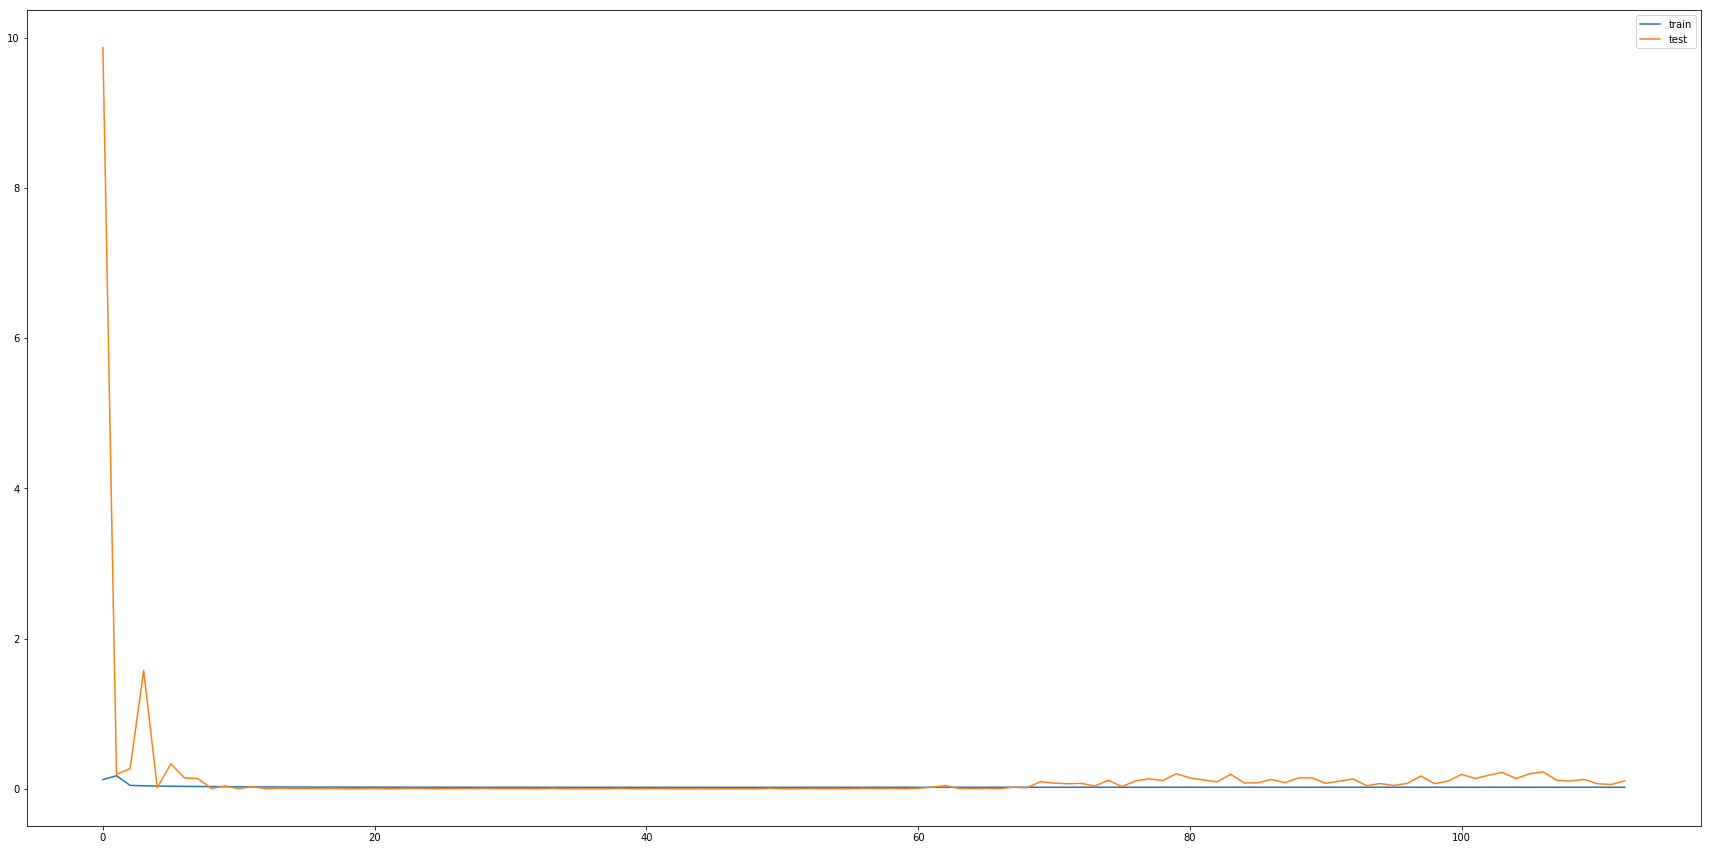

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 384)               660480    
_________________________________________________________________
batch_normalization_43 (Batc (None, 384)               1536      
_________________________________________________________________
dropout_52 (Dropout)         (None, 384)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 385       
Total params: 662,401
Trainable params: 661,633
Non-trainable params: 768
_________________________________________________________________
None
Test RMSE: 333.174
99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 1, 1, 0, 1, 1, 1, 0, 1, 1]
             precision    recall  f1-score   support

          0       0.28      0.35      0.31        40
          1       0.47      0.39      0.43        59

avg / total  

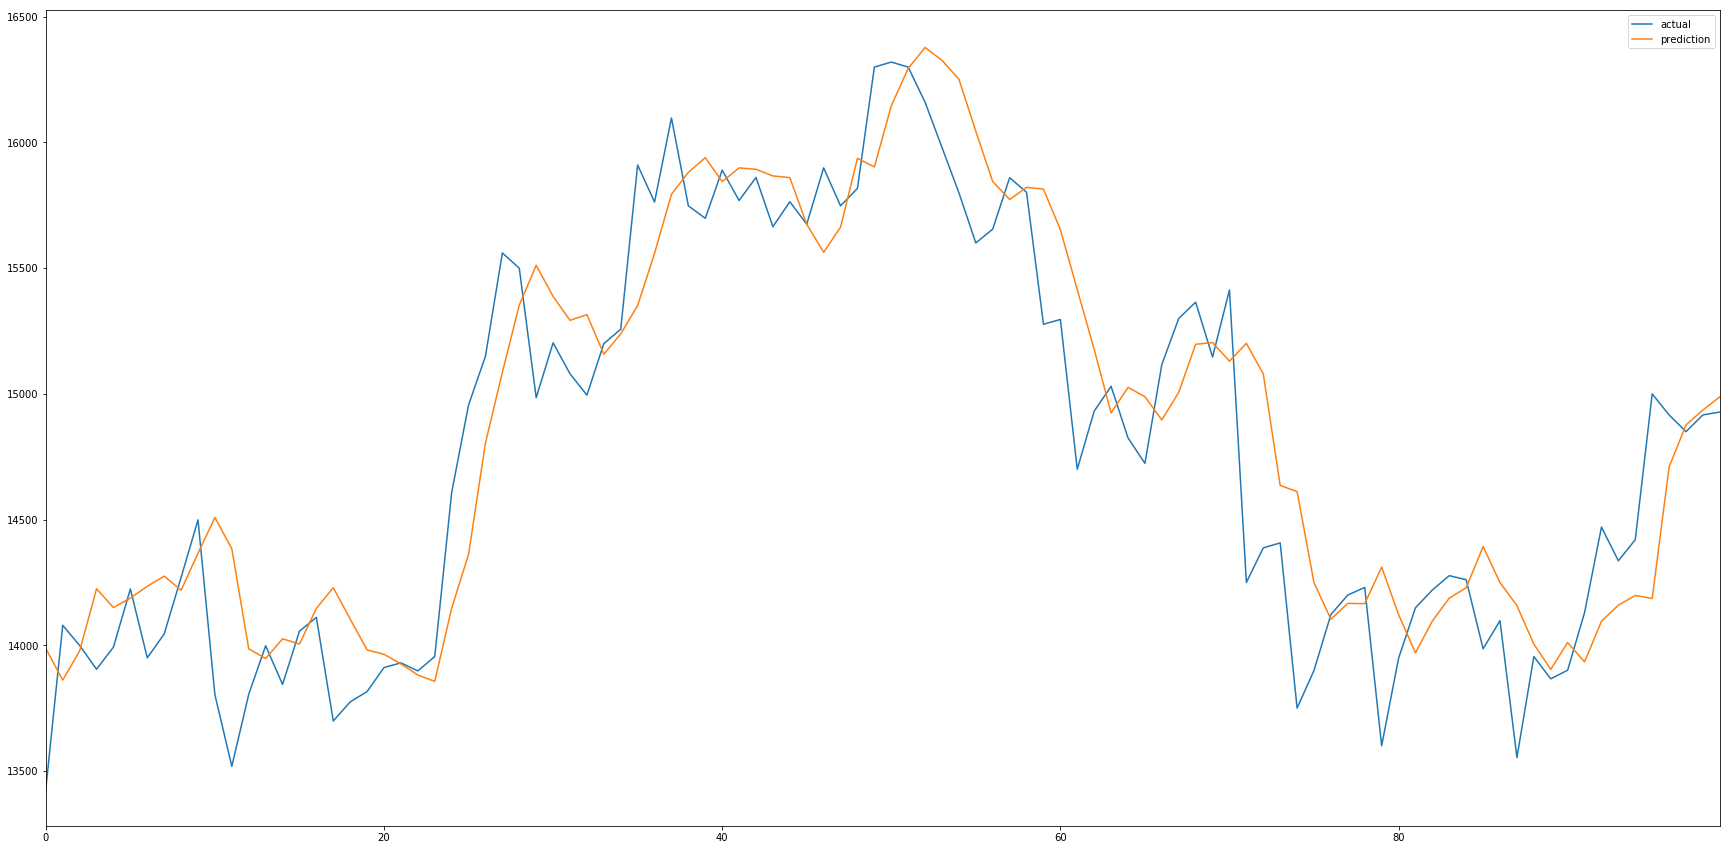

In [58]:
run_rnn('lstm1', False)

<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_26 (Bidirectio (None, 768)               1320960   
_________________________________________________________________
batch_normalization_44 (Batc (None, 768)               3072      
_________________________________________________________________
dropout_53 (Dropout)         (None, 768)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 769       
Total params: 1,324,801
Trainable params: 1,323,265
Non-trainable params: 1,536
_________________________________________________________________
None
Train on 27350 samples, validate on 100 samples
Epoch 1/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.1815
Epoch 00001: val_loss improved from 

27264/27350 [============================>.] - ETA: 0s - loss: 0.0187
Epoch 00031: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0199 - val_loss: 0.0012
Epoch 32/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0084
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0199 - val_loss: 0.0047
Epoch 33/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0073
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0200 - val_loss: 0.0019
Epoch 34/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0108
Epoch 00034: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0200 - val_loss: 0.0035
Epoch 35/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0108
Epoch 00035: val_loss did not improve
27350/27350 [===================

Epoch 69/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0101
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0200 - val_loss: 0.0872
Epoch 70/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0123
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0199 - val_loss: 0.1418
Epoch 71/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0193
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0202 - val_loss: 0.0229
Epoch 72/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0131
Epoch 00072: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0204 - val_loss: 0.0109
Epoch 73/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0123
Epoch 00073: val_loss did not improve
27350/27350 [======

26880/27350 [============================>.] - ETA: 0s - loss: 0.0107
Epoch 00107: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0185 - val_loss: 0.2486
Epoch 108/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0182
Epoch 00108: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0192 - val_loss: 0.1099
Epoch 109/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0177
Epoch 00109: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0187 - val_loss: 0.3571
Epoch 110/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0115
Epoch 00110: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0192 - val_loss: 0.2562
Epoch 111/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0115
Epoch 00111: val_loss did not improve
27350/27350 [===============

Epoch 145/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0097
Epoch 00145: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0203 - val_loss: 0.0046
Epoch 146/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0095
Epoch 00146: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0195 - val_loss: 0.0295
Epoch 147/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0090
Epoch 00147: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0189 - val_loss: 0.0066
Epoch 148/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0079
Epoch 00148: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0187 - val_loss: 0.0135
Epoch 149/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0080
Epoch 00149: val_loss did not improve
27350/27350 [=

Epoch 183/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0103
Epoch 00183: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0208 - val_loss: 0.0719
Epoch 184/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0191
Epoch 00184: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0201 - val_loss: 0.0844
Epoch 185/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0183
Epoch 00185: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0194 - val_loss: 0.0292
Epoch 186/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0183
Epoch 00186: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0193 - val_loss: 0.0072
Epoch 187/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0090
Epoch 00187: val_loss did not improve
27350/27350 [=

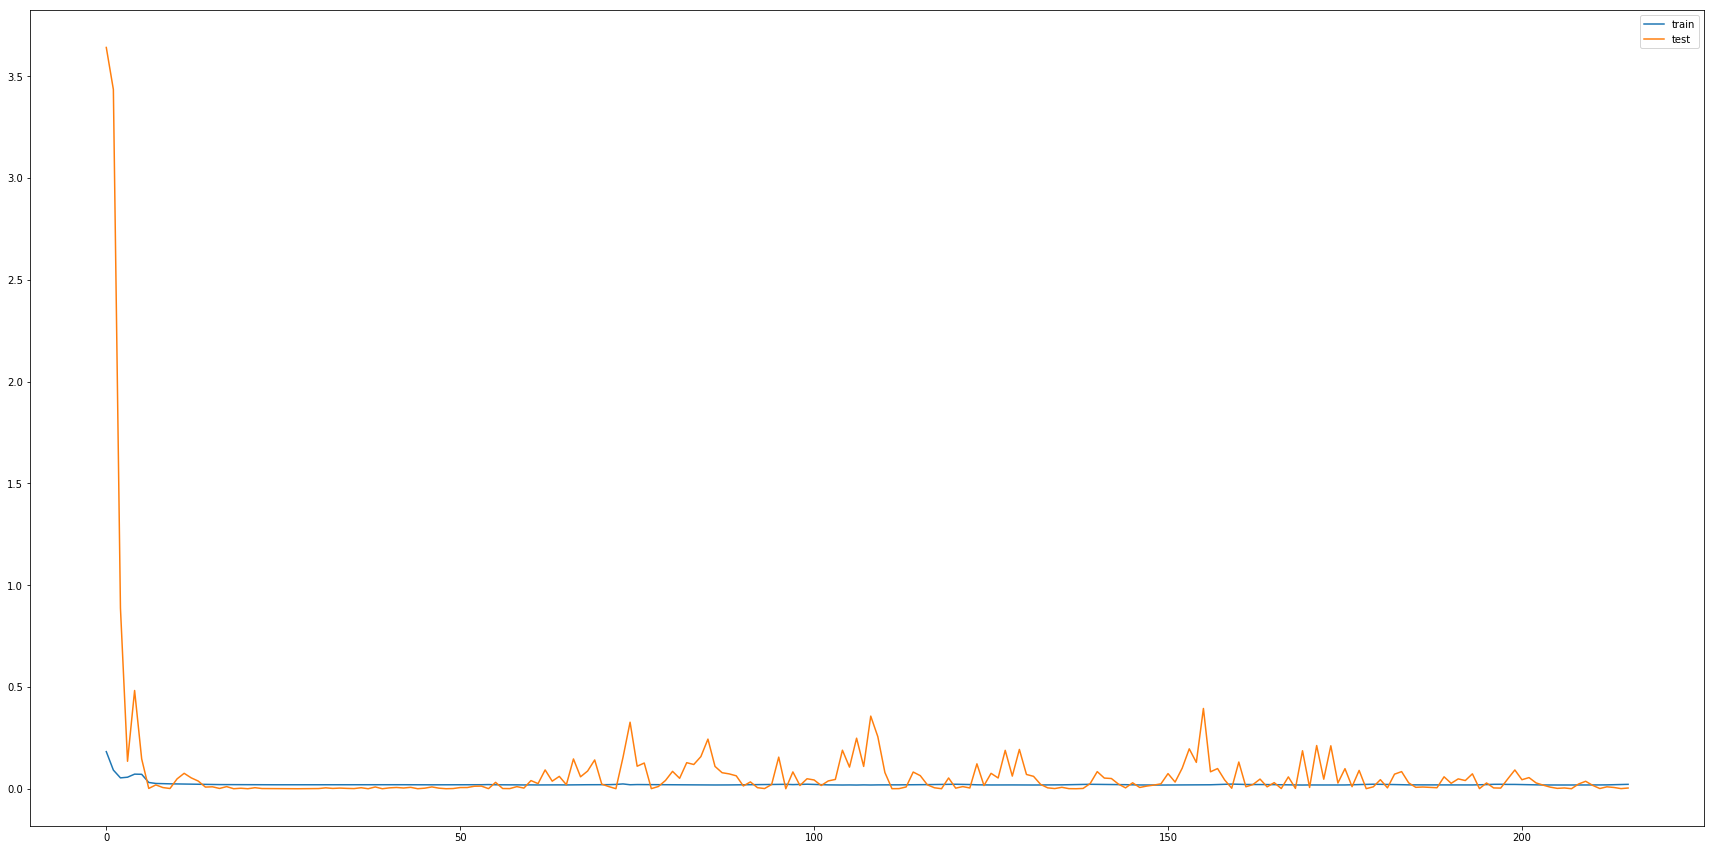

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_27 (Bidirectio (None, 768)               1320960   
_________________________________________________________________
batch_normalization_45 (Batc (None, 768)               3072      
_________________________________________________________________
dropout_54 (Dropout)         (None, 768)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 769       
Total params: 1,324,801
Trainable params: 1,323,265
Non-trainable params: 1,536
_________________________________________________________________
None
Test RMSE: 361.024
99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 0, 1, 1, 1, 1, 1, 0, 1, 1]
             precision    recall  f1-score   support

          0       0.30      0.35      0.32        40
          1       0.50      0.44      0.47        59

avg / t

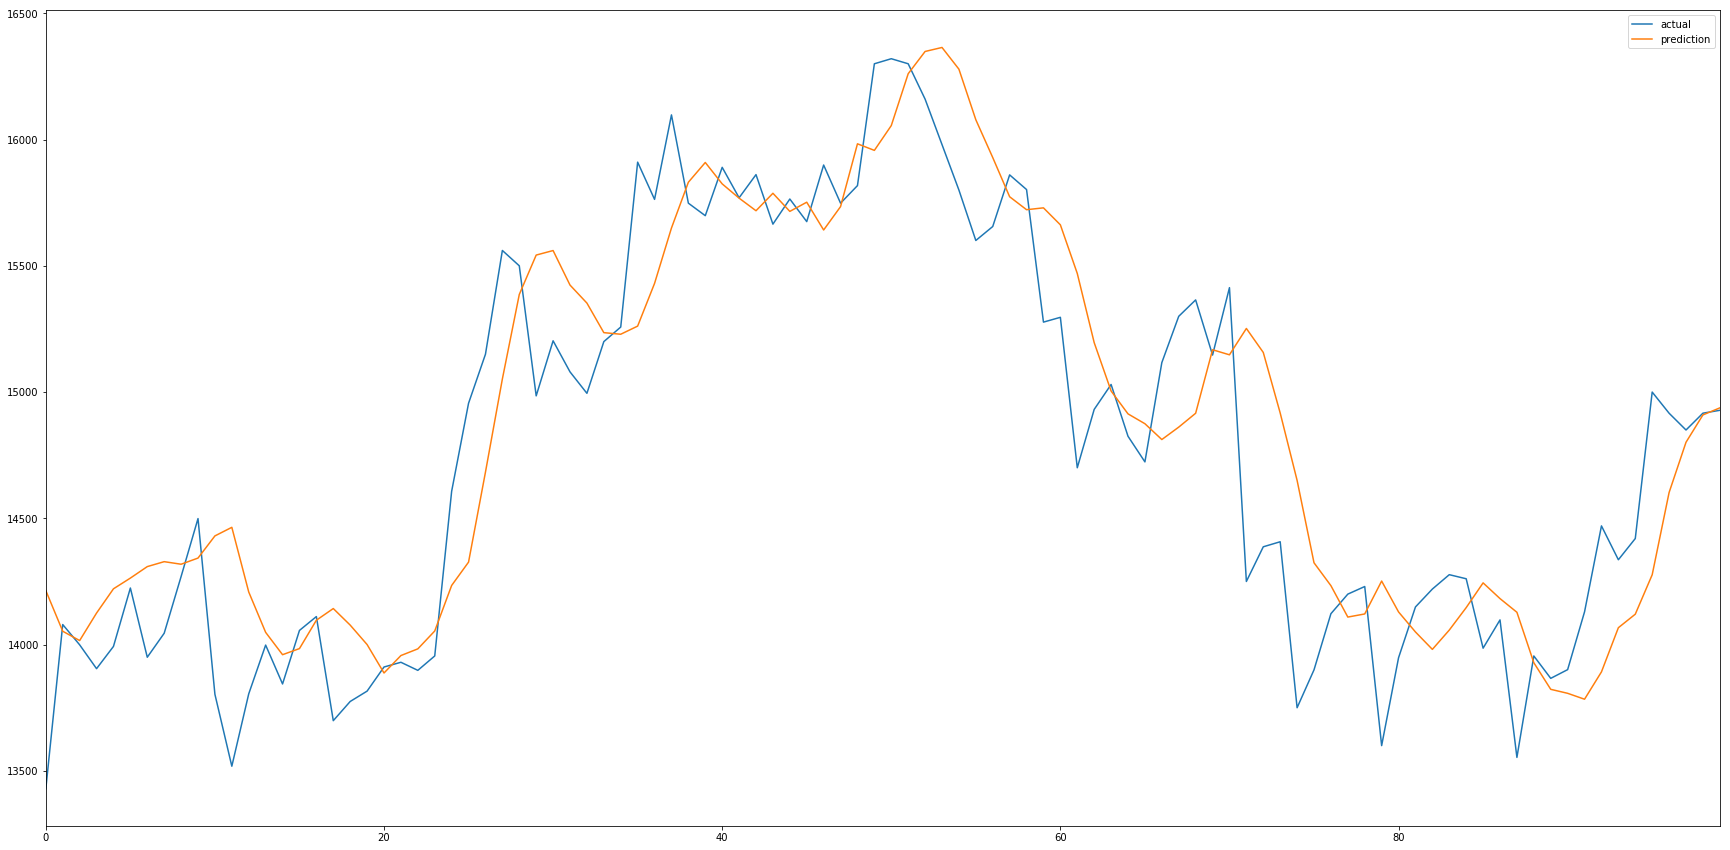

In [59]:
run_rnn('lstm1', True)

<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_25 (GRU)                 (None, 384)               495360    
_________________________________________________________________
batch_normalization_46 (Batc (None, 384)               1536      
_________________________________________________________________
dropout_55 (Dropout)         (None, 384)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 385       
Total params: 497,281
Trainable params: 496,513
Non-trainable params: 768
_________________________________________________________________
None
Train on 27350 samples, validate on 100 samples
Epoch 1/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.4507
Epoch 00001: val_loss improved from inf to

Epoch 33/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0060
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 1s 22us/step - loss: 0.0189 - val_loss: 0.0027
Epoch 34/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0052
Epoch 00034: val_loss improved from 0.00058 to 0.00037, saving model to ../output/tmp/model_lstm.hdf5
27350/27350 [==============================] - 1s 24us/step - loss: 0.0189 - val_loss: 3.6995e-04
Epoch 35/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0059
Epoch 00035: val_loss improved from 0.00037 to 0.00033, saving model to ../output/tmp/model_lstm.hdf5
27350/27350 [==============================] - 1s 24us/step - loss: 0.0188 - val_loss: 3.2533e-04
Epoch 36/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0060
Epoch 00036: val_loss did not improve
27350/27350 [==============================] - 1s 22us/step - loss: 0.0189 - val_loss: 0.0014
Epoc

Epoch 70/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0076
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 1s 22us/step - loss: 0.0199 - val_loss: 0.0329
Epoch 71/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0071
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 1s 22us/step - loss: 0.0201 - val_loss: 0.0109
Epoch 72/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0070
Epoch 00072: val_loss did not improve
27350/27350 [==============================] - 1s 23us/step - loss: 0.0199 - val_loss: 0.1245
Epoch 73/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0072
Epoch 00073: val_loss did not improve
27350/27350 [==============================] - 1s 22us/step - loss: 0.0200 - val_loss: 0.0900
Epoch 74/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0072
Epoch 00074: val_loss did not improve
27350/27350 [======

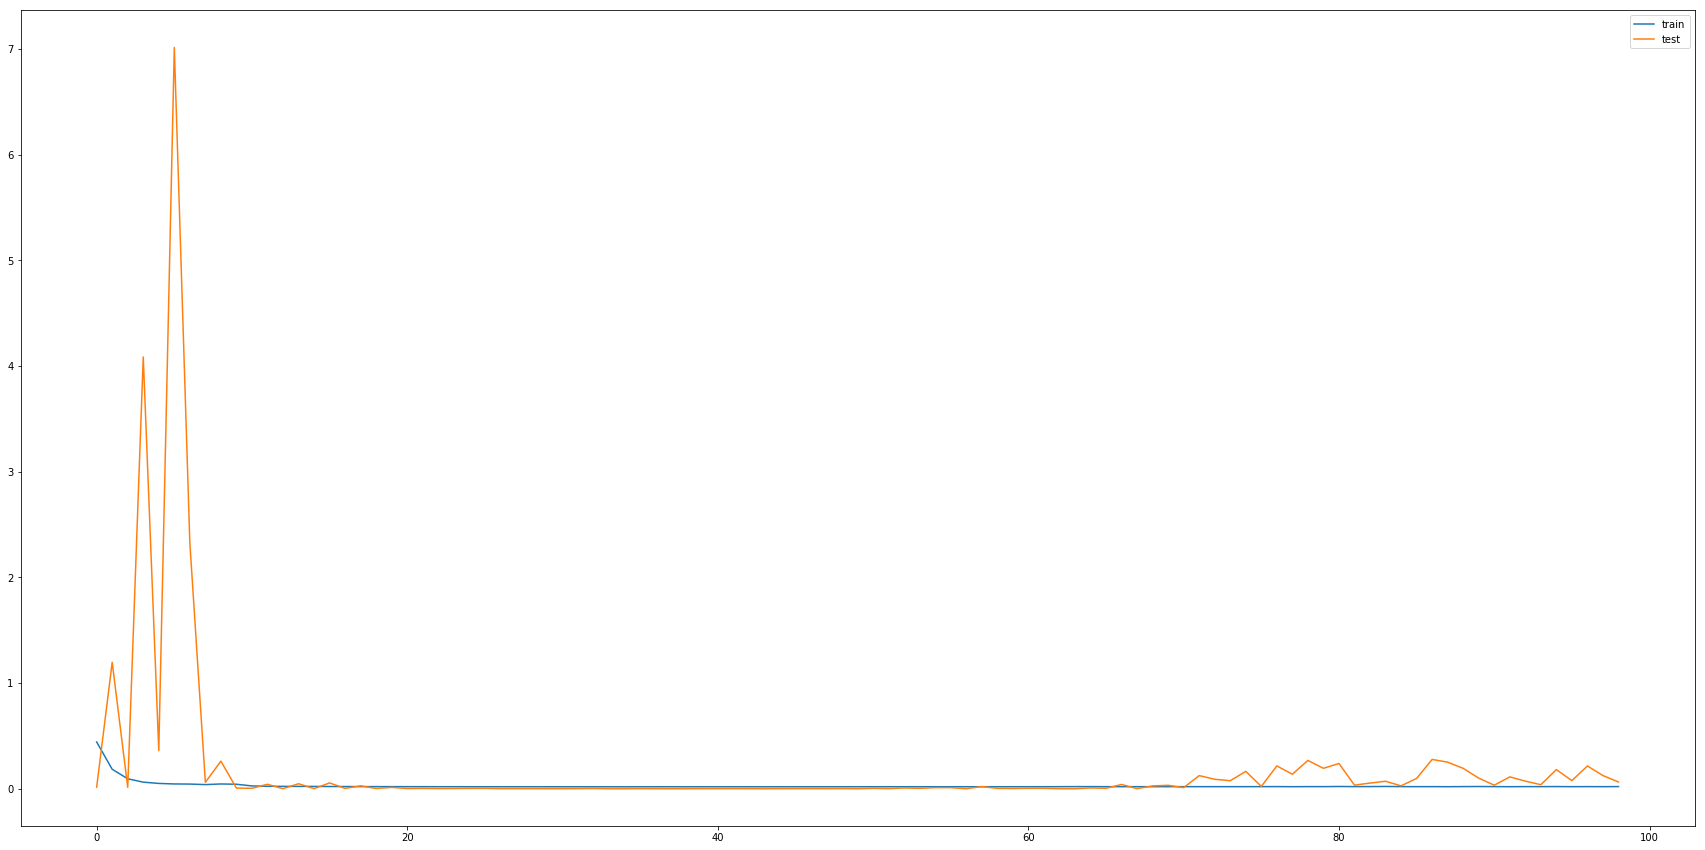

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_26 (GRU)                 (None, 384)               495360    
_________________________________________________________________
batch_normalization_47 (Batc (None, 384)               1536      
_________________________________________________________________
dropout_56 (Dropout)         (None, 384)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 385       
Total params: 497,281
Trainable params: 496,513
Non-trainable params: 768
_________________________________________________________________
None
Test RMSE: 351.146
99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 0, 1, 1, 1, 1, 1, 0, 1, 1]
             precision    recall  f1-score   support

          0       0.31      0.40      0.35        40
          1       0.50      0.41      0.45        59

avg / total  

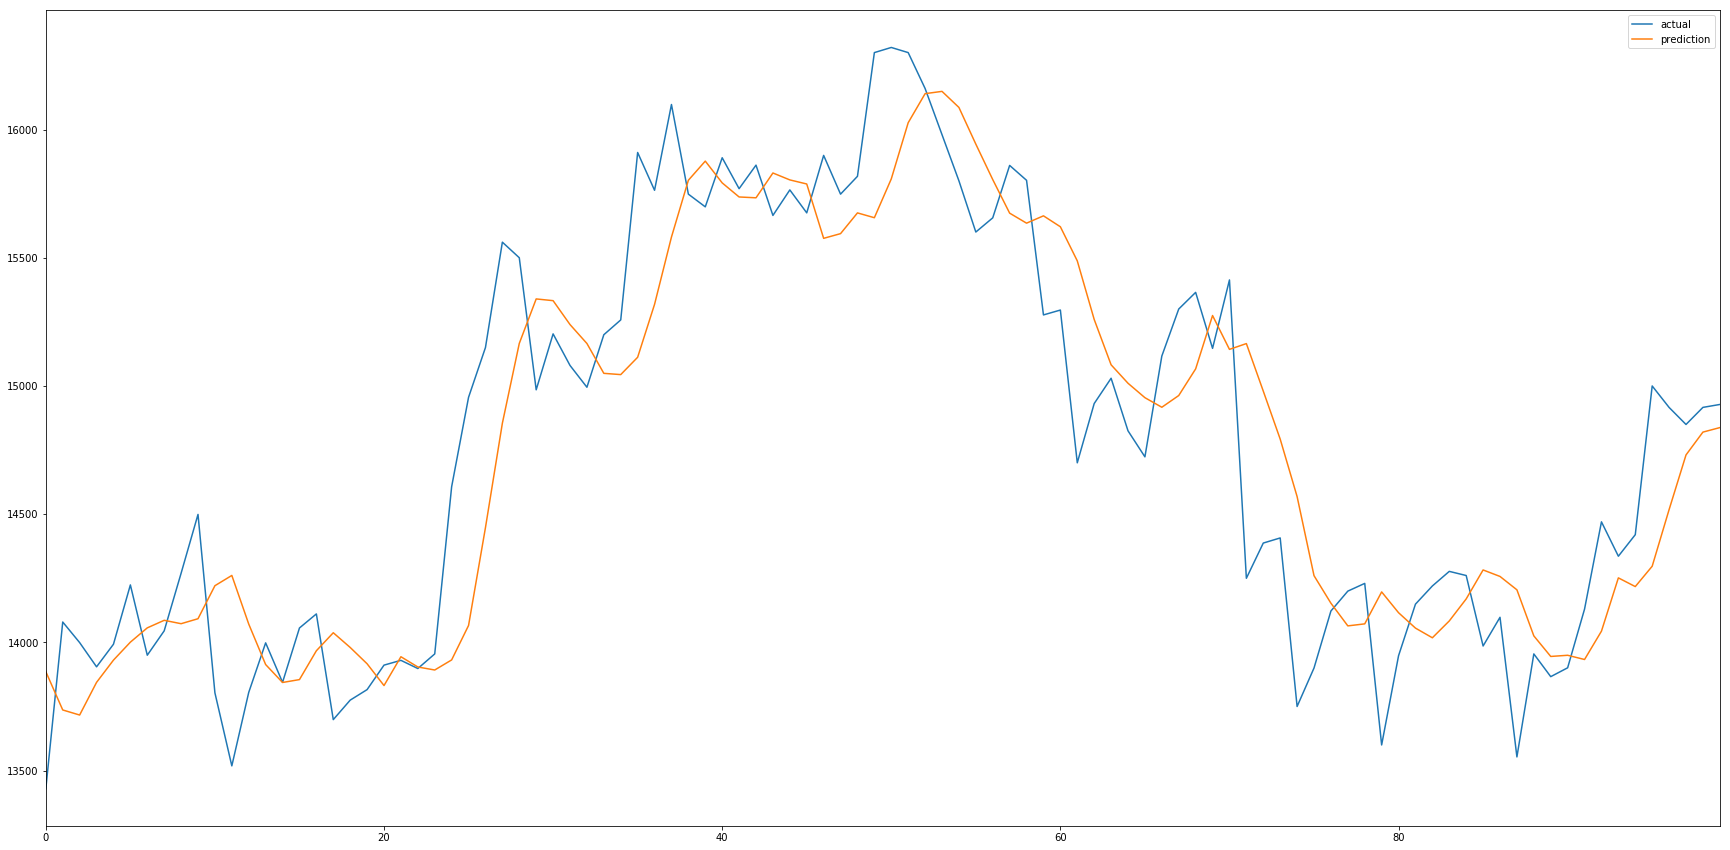

In [60]:
run_rnn('gru1', False)

<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_28 (Bidirectio (None, 768)               990720    
_________________________________________________________________
batch_normalization_48 (Batc (None, 768)               3072      
_________________________________________________________________
dropout_57 (Dropout)         (None, 768)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 769       
Total params: 994,561
Trainable params: 993,025
Non-trainable params: 1,536
_________________________________________________________________
None
Train on 27350 samples, validate on 100 samples
Epoch 1/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.6201
Epoch 00001: val_loss improved from inf 

27264/27350 [============================>.] - ETA: 0s - loss: 0.0191
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 1s 28us/step - loss: 0.0204 - val_loss: 0.0189
Epoch 33/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0189
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 1s 28us/step - loss: 0.0202 - val_loss: 0.0141
Epoch 34/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0188
Epoch 00034: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0200 - val_loss: 0.0195
Epoch 35/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0187
Epoch 00035: val_loss did not improve
27350/27350 [==============================] - 1s 28us/step - loss: 0.0200 - val_loss: 0.0138
Epoch 36/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0186
Epoch 00036: val_loss did not improve
27350/27350 [===================

Epoch 69/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0186
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 1s 28us/step - loss: 0.0198 - val_loss: 0.0031
Epoch 70/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0188
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0200 - val_loss: 7.1340e-04
Epoch 71/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0188
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 1s 28us/step - loss: 0.0200 - val_loss: 0.0112
Epoch 72/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0191
Epoch 00072: val_loss did not improve
27350/27350 [==============================] - 1s 28us/step - loss: 0.0203 - val_loss: 0.0035
Epoch 73/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0196
Epoch 00073: val_loss did not improve
27350/27350 [==

27264/27350 [============================>.] - ETA: 0s - loss: 0.0200
Epoch 00107: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0212 - val_loss: 0.0457
Epoch 108/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0200
Epoch 00108: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0213 - val_loss: 0.0360
Epoch 109/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0195
Epoch 00109: val_loss did not improve
27350/27350 [==============================] - 1s 28us/step - loss: 0.0207 - val_loss: 0.0226
Epoch 110/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0188
Epoch 00110: val_loss did not improve
27350/27350 [==============================] - 1s 28us/step - loss: 0.0201 - val_loss: 0.0132
Epoch 111/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0183
Epoch 00111: val_loss did not improve
27350/27350 [===============

Epoch 145/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0187
Epoch 00145: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0198 - val_loss: 0.0046
Epoch 146/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0185
Epoch 00146: val_loss did not improve
27350/27350 [==============================] - 1s 28us/step - loss: 0.0196 - val_loss: 5.8916e-04
Epoch 147/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0189
Epoch 00147: val_loss did not improve
27350/27350 [==============================] - 1s 28us/step - loss: 0.0200 - val_loss: 0.0814
Epoch 148/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0183
Epoch 00148: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0194 - val_loss: 0.0028
Epoch 149/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0189
Epoch 00149: val_loss did not improve
27350/2735

Epoch 183/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0184
Epoch 00183: val_loss did not improve
27350/27350 [==============================] - 1s 28us/step - loss: 0.0194 - val_loss: 0.0118
Epoch 00183: early stopping


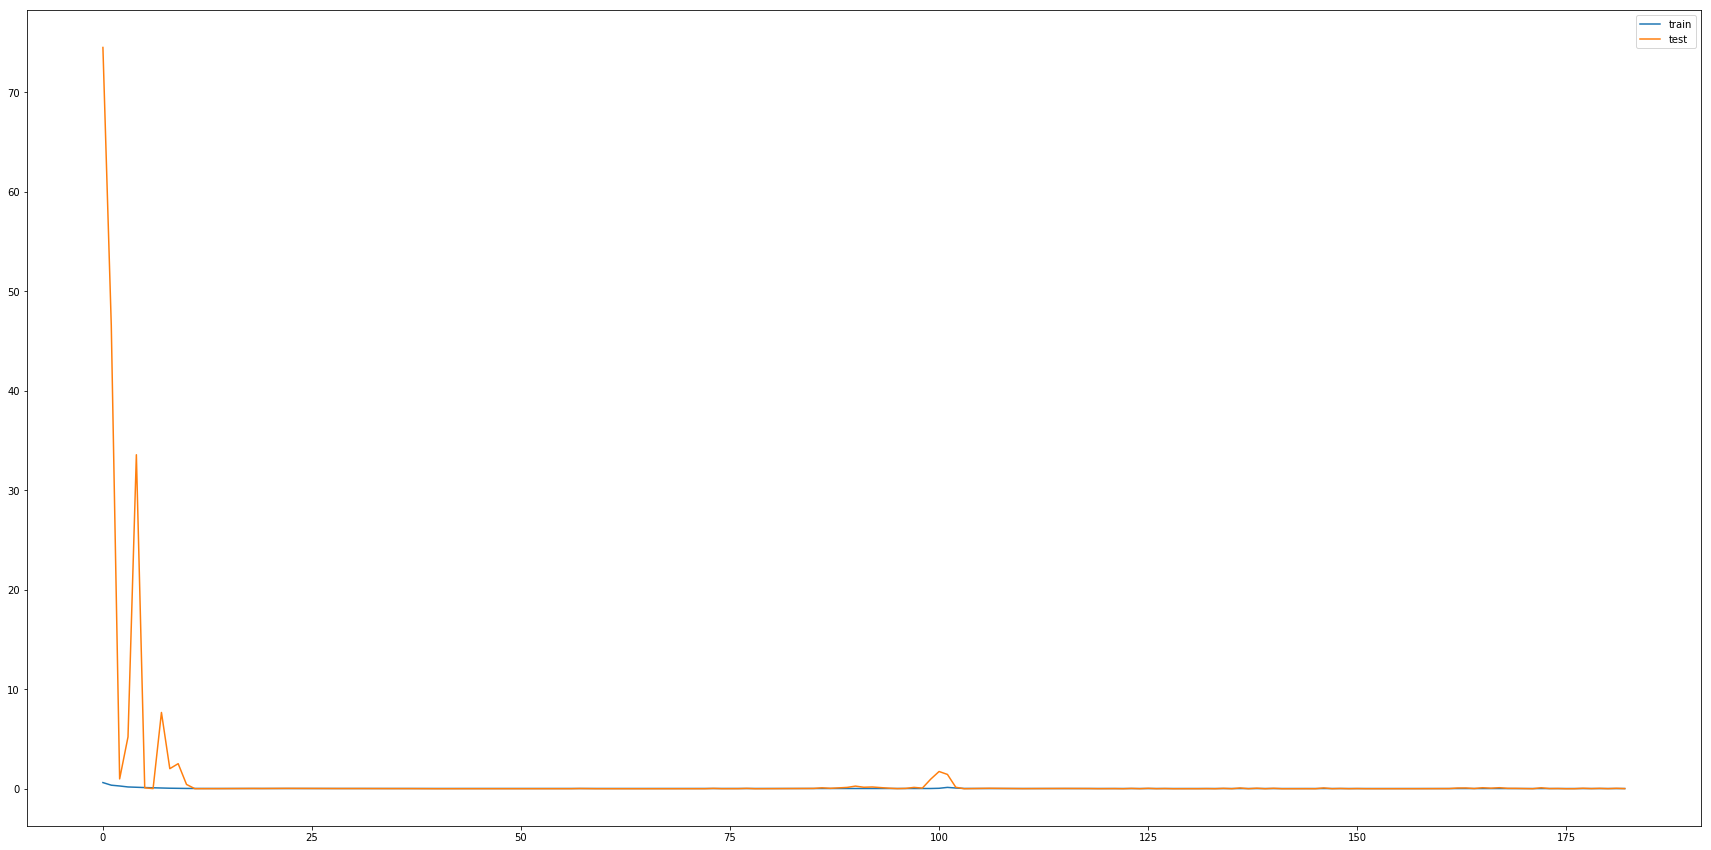

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_29 (Bidirectio (None, 768)               990720    
_________________________________________________________________
batch_normalization_49 (Batc (None, 768)               3072      
_________________________________________________________________
dropout_58 (Dropout)         (None, 768)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 769       
Total params: 994,561
Trainable params: 993,025
Non-trainable params: 1,536
_________________________________________________________________
None
Test RMSE: 384.484
99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
             precision    recall  f1-score   support

          0       0.37      0.45      0.40        40
          1       0.56      0.47      0.51        59

avg / total

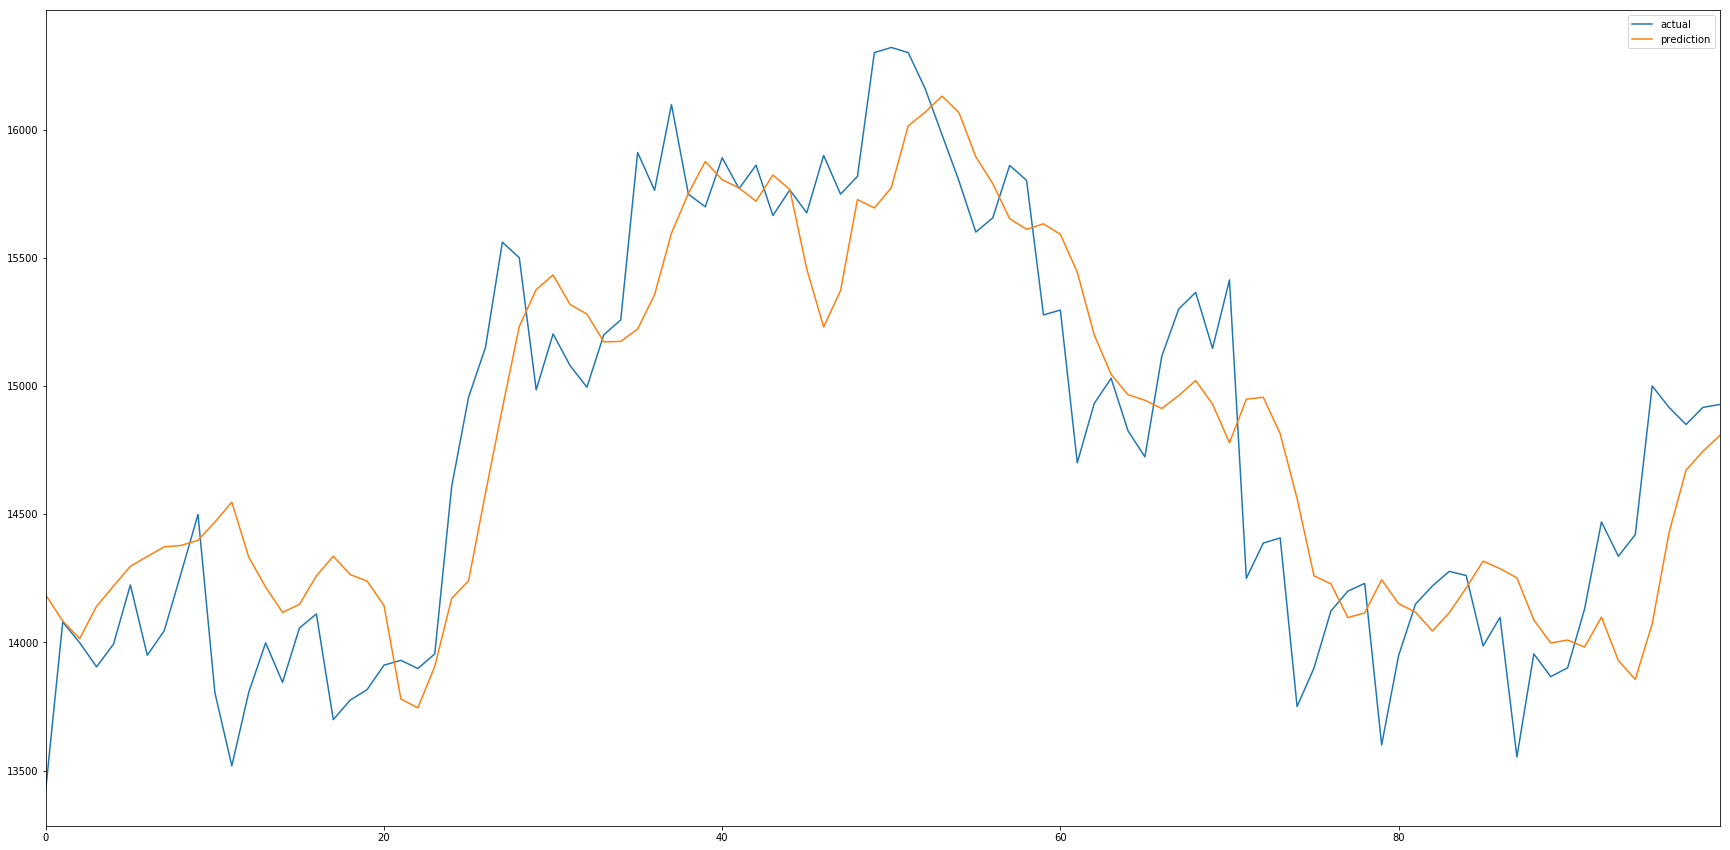

In [61]:
run_rnn('gru1', True)

<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 1, 384)            660480    
_________________________________________________________________
batch_normalization_50 (Batc (None, 1, 384)            1536      
_________________________________________________________________
dropout_59 (Dropout)         (None, 1, 384)            0         
_________________________________________________________________
lstm_34 (LSTM)               (None, 384)               1181184   
_________________________________________________________________
batch_normalization_51 (Batc (None, 384)               1536      
_________________________________________________________________
dropout_60 (Dropout)         (None, 384)               0         
_____________________________________________________

26496/27350 [============================>.] - ETA: 0s - loss: 0.0069
Epoch 00031: val_loss did not improve
27350/27350 [==============================] - 1s 40us/step - loss: 0.0185 - val_loss: 0.0991
Epoch 32/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0069
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 1s 40us/step - loss: 0.0185 - val_loss: 0.0942
Epoch 33/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0069
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 1s 40us/step - loss: 0.0185 - val_loss: 0.0835
Epoch 34/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0070
Epoch 00034: val_loss did not improve
27350/27350 [==============================] - 1s 40us/step - loss: 0.0185 - val_loss: 0.0878
Epoch 35/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0069
Epoch 00035: val_loss did not improve
27350/27350 [===================

Epoch 69/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0091
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 1s 40us/step - loss: 0.0204 - val_loss: 0.0092
Epoch 70/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0089
Epoch 00070: val_loss improved from 0.00077 to 0.00071, saving model to ../output/tmp/model_lstm.hdf5
27350/27350 [==============================] - 1s 43us/step - loss: 0.0202 - val_loss: 7.0824e-04
Epoch 71/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0087
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 1s 40us/step - loss: 0.0200 - val_loss: 0.0110
Epoch 72/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0087
Epoch 00072: val_loss did not improve
27350/27350 [==============================] - 1s 40us/step - loss: 0.0201 - val_loss: 0.0266
Epoch 73/500
26496/27350 [============================>.] - ETA: 0s - lo

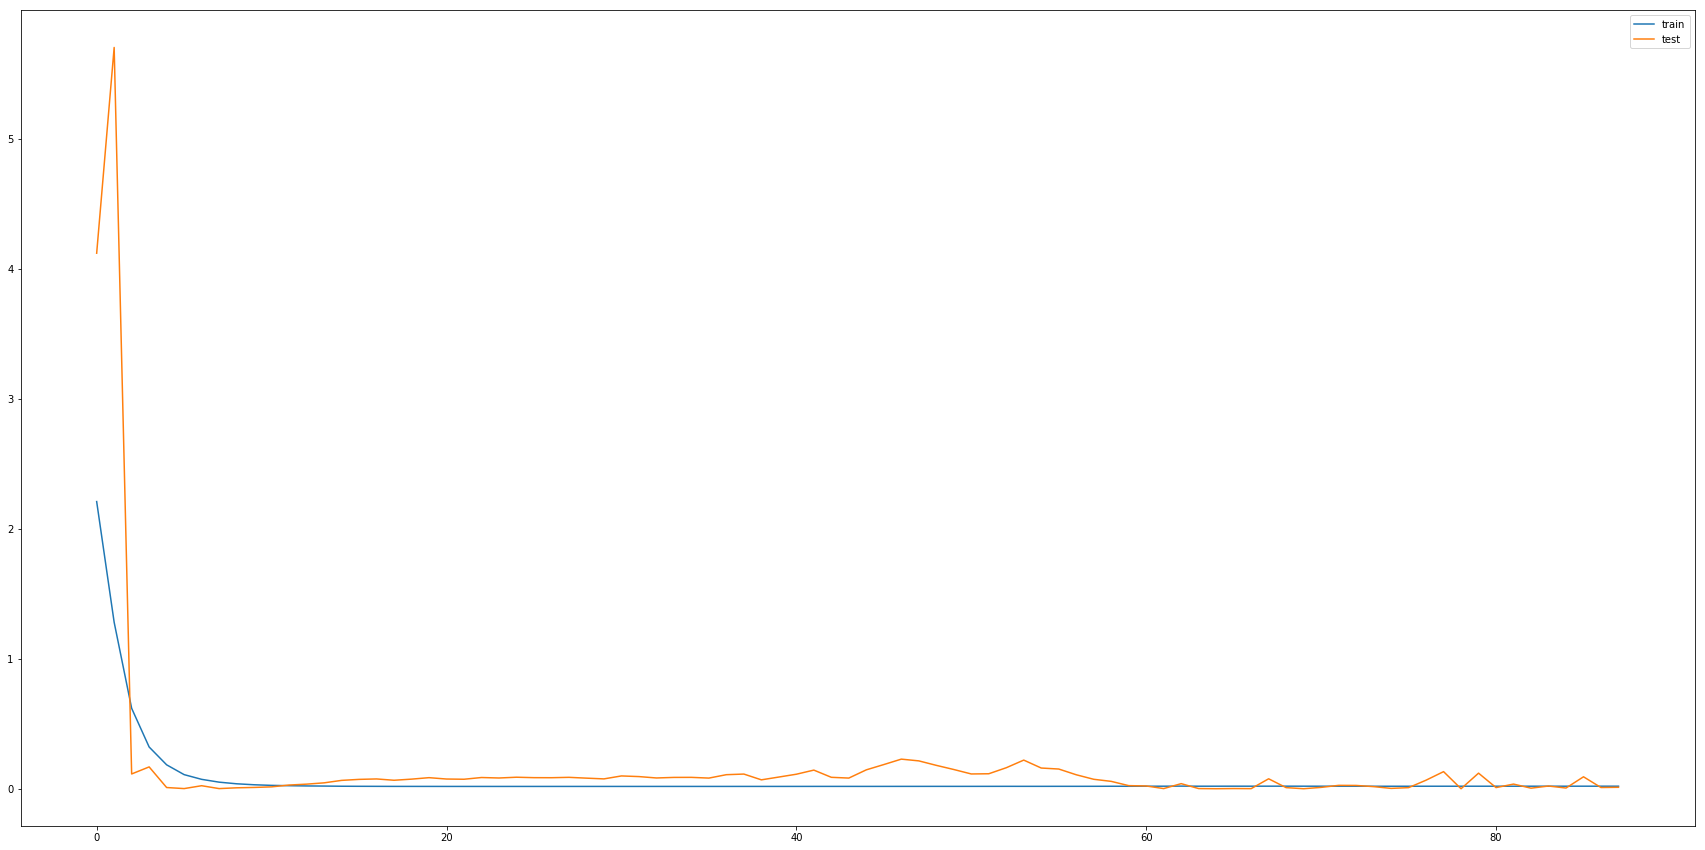

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_35 (LSTM)               (None, 1, 384)            660480    
_________________________________________________________________
batch_normalization_52 (Batc (None, 1, 384)            1536      
_________________________________________________________________
dropout_61 (Dropout)         (None, 1, 384)            0         
_________________________________________________________________
lstm_36 (LSTM)               (None, 384)               1181184   
_________________________________________________________________
batch_normalization_53 (Batc (None, 384)               1536      
_________________________________________________________________
dropout_62 (Dropout)         (None, 384)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 385       
Total para

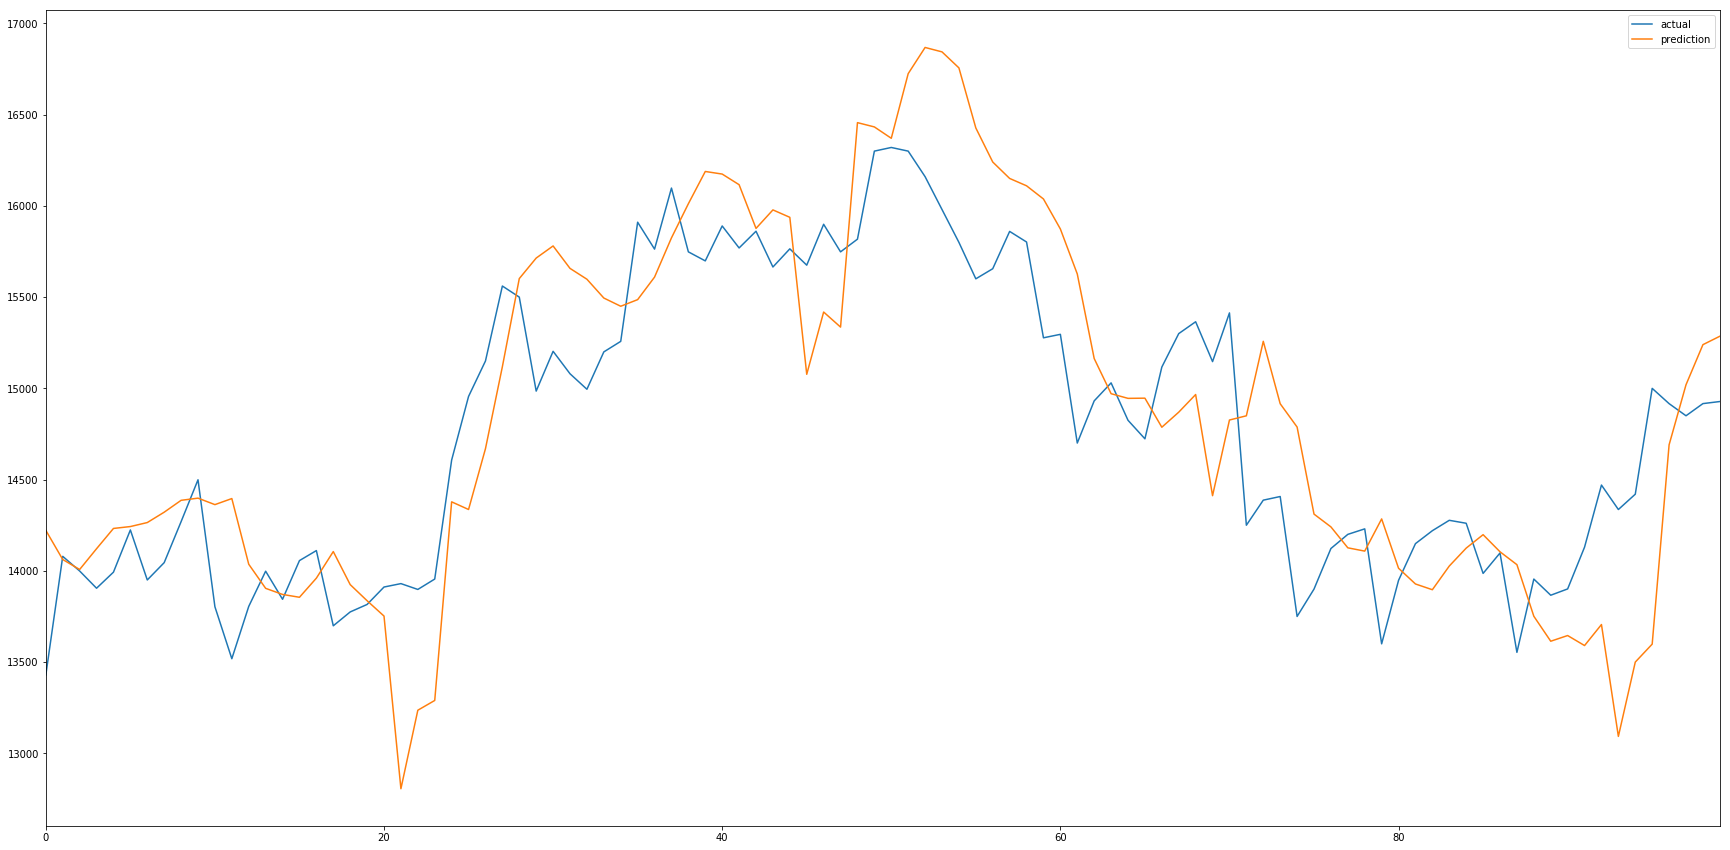

In [62]:
run_rnn('lstm2', False)

<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_30 (Bidirectio (None, 1, 768)            1320960   
_________________________________________________________________
batch_normalization_54 (Batc (None, 1, 768)            3072      
_________________________________________________________________
dropout_63 (Dropout)         (None, 1, 768)            0         
_________________________________________________________________
bidirectional_31 (Bidirectio (None, 768)               3542016   
_________________________________________________________________
batch_normalization_55 (Batc (None, 768)               3072      
_________________________________________________________________
dropout_64 (Dropout)         (None, 768)               0         
_____________________________________________________

Epoch 32/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0177
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 2s 77us/step - loss: 0.0190 - val_loss: 0.2482
Epoch 33/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0177
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 2s 77us/step - loss: 0.0190 - val_loss: 0.2428
Epoch 34/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0177
Epoch 00034: val_loss did not improve
27350/27350 [==============================] - 2s 77us/step - loss: 0.0190 - val_loss: 0.2613
Epoch 35/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0178
Epoch 00035: val_loss did not improve
27350/27350 [==============================] - 2s 77us/step - loss: 0.0191 - val_loss: 0.2606
Epoch 36/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0178
Epoch 00036: val_loss did not improve
27350/27350 [======

27264/27350 [============================>.] - ETA: 0s - loss: 0.0215
Epoch 00070: val_loss improved from 0.13451 to 0.10274, saving model to ../output/tmp/model_lstm.hdf5
27350/27350 [==============================] - 2s 90us/step - loss: 0.0226 - val_loss: 0.1027
Epoch 71/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0214
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 2s 78us/step - loss: 0.0226 - val_loss: 0.1689
Epoch 72/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0215
Epoch 00072: val_loss improved from 0.10274 to 0.09984, saving model to ../output/tmp/model_lstm.hdf5
27350/27350 [==============================] - 2s 87us/step - loss: 0.0227 - val_loss: 0.0998
Epoch 73/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0214
Epoch 00073: val_loss did not improve
27350/27350 [==============================] - 2s 78us/step - loss: 0.0226 - val_loss: 0.1019
Epoch 74/500
27264/27350 

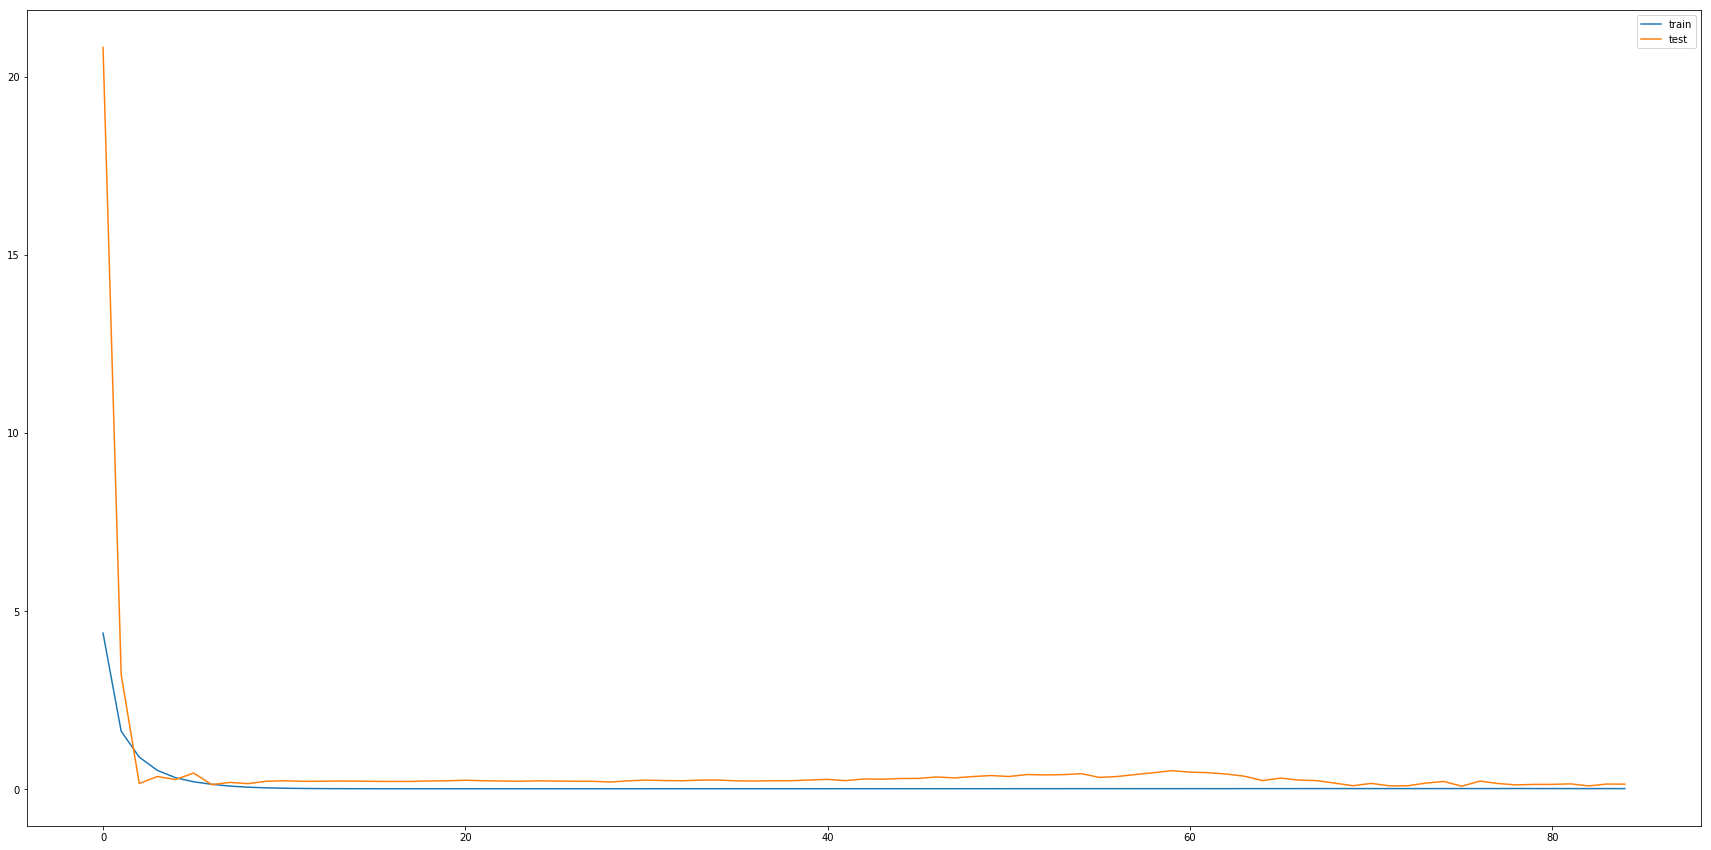

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_32 (Bidirectio (None, 1, 768)            1320960   
_________________________________________________________________
batch_normalization_56 (Batc (None, 1, 768)            3072      
_________________________________________________________________
dropout_65 (Dropout)         (None, 1, 768)            0         
_________________________________________________________________
bidirectional_33 (Bidirectio (None, 768)               3542016   
_________________________________________________________________
batch_normalization_57 (Batc (None, 768)               3072      
_________________________________________________________________
dropout_66 (Dropout)         (None, 768)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 769       
Total para

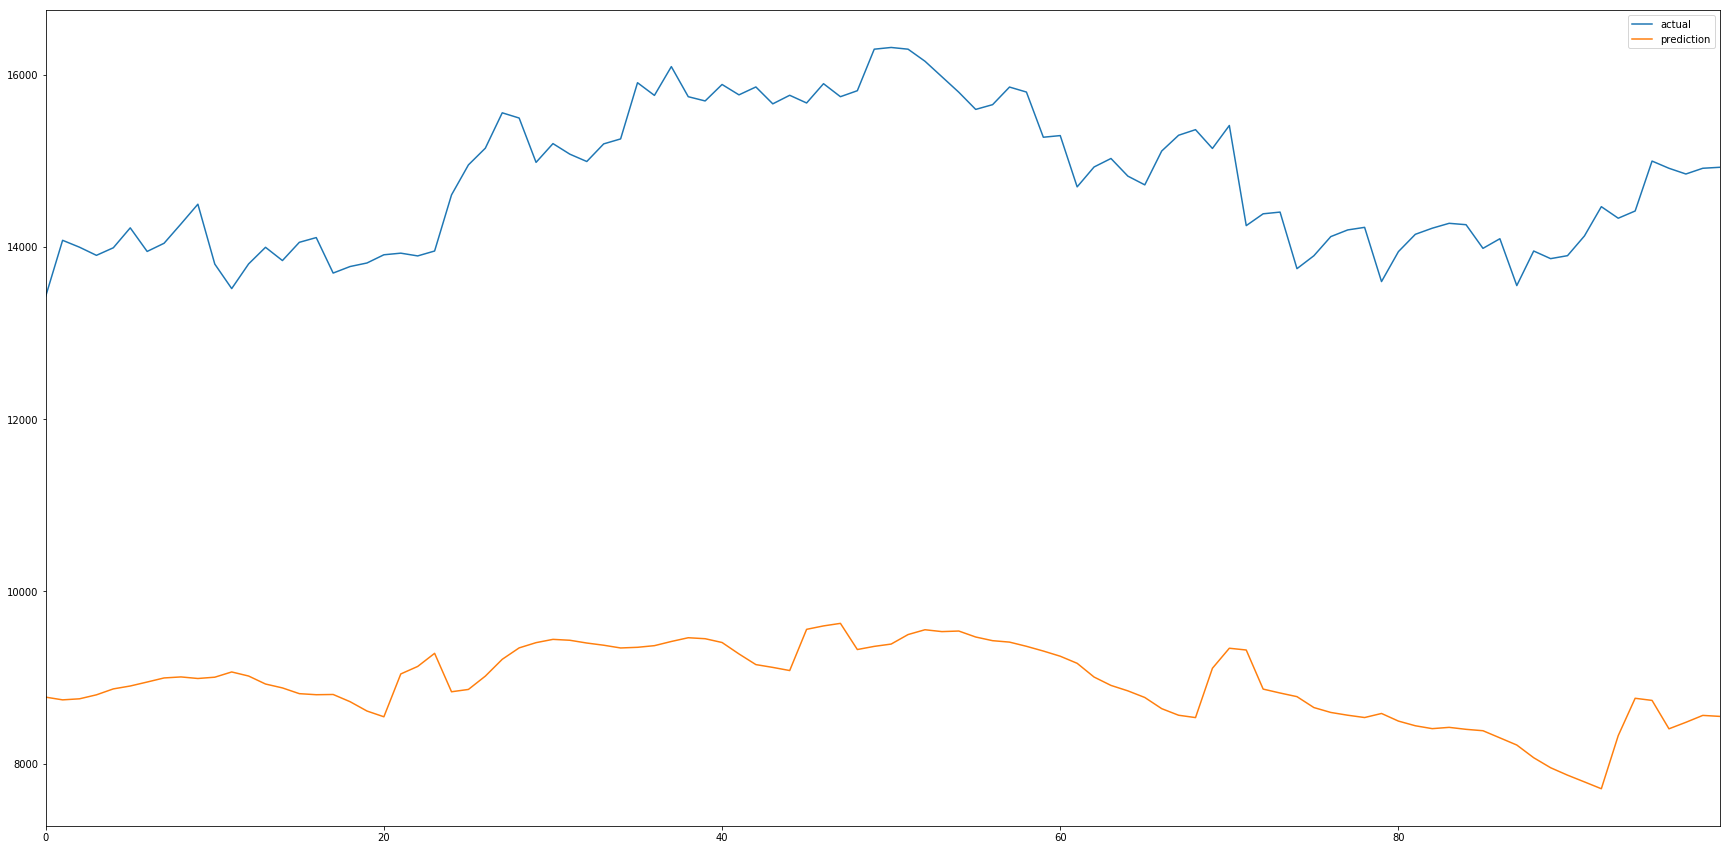

In [63]:
run_rnn('lstm2', True)

<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_29 (GRU)                 (None, 1, 384)            495360    
_________________________________________________________________
batch_normalization_58 (Batc (None, 1, 384)            1536      
_________________________________________________________________
dropout_67 (Dropout)         (None, 1, 384)            0         
_________________________________________________________________
gru_30 (GRU)                 (None, 384)               885888    
_________________________________________________________________
batch_normalization_59 (Batc (None, 384)               1536      
_________________________________________________________________
dropout_68 (Dropout)         (None, 384)               0         
_____________________________________________________

Epoch 32/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0074
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 1s 35us/step - loss: 0.0189 - val_loss: 0.3006
Epoch 33/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0075
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 1s 35us/step - loss: 0.0190 - val_loss: 0.2968
Epoch 34/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0077
Epoch 00034: val_loss did not improve
27350/27350 [==============================] - 1s 35us/step - loss: 0.0192 - val_loss: 0.3298
Epoch 35/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0075
Epoch 00035: val_loss did not improve
27350/27350 [==============================] - 1s 35us/step - loss: 0.0190 - val_loss: 0.3365
Epoch 36/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0078
Epoch 00036: val_loss did not improve
27350/27350 [======

26496/27350 [============================>.] - ETA: 0s - loss: 0.0104
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 1s 35us/step - loss: 0.0213 - val_loss: 0.2074
Epoch 71/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0108
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 1s 35us/step - loss: 0.0218 - val_loss: 0.2325
Epoch 72/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0101
Epoch 00072: val_loss did not improve
27350/27350 [==============================] - 1s 35us/step - loss: 0.0211 - val_loss: 0.1836
Epoch 73/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0100
Epoch 00073: val_loss did not improve
27350/27350 [==============================] - 1s 35us/step - loss: 0.0209 - val_loss: 0.1439
Epoch 74/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0107
Epoch 00074: val_loss did not improve
27350/27350 [===================

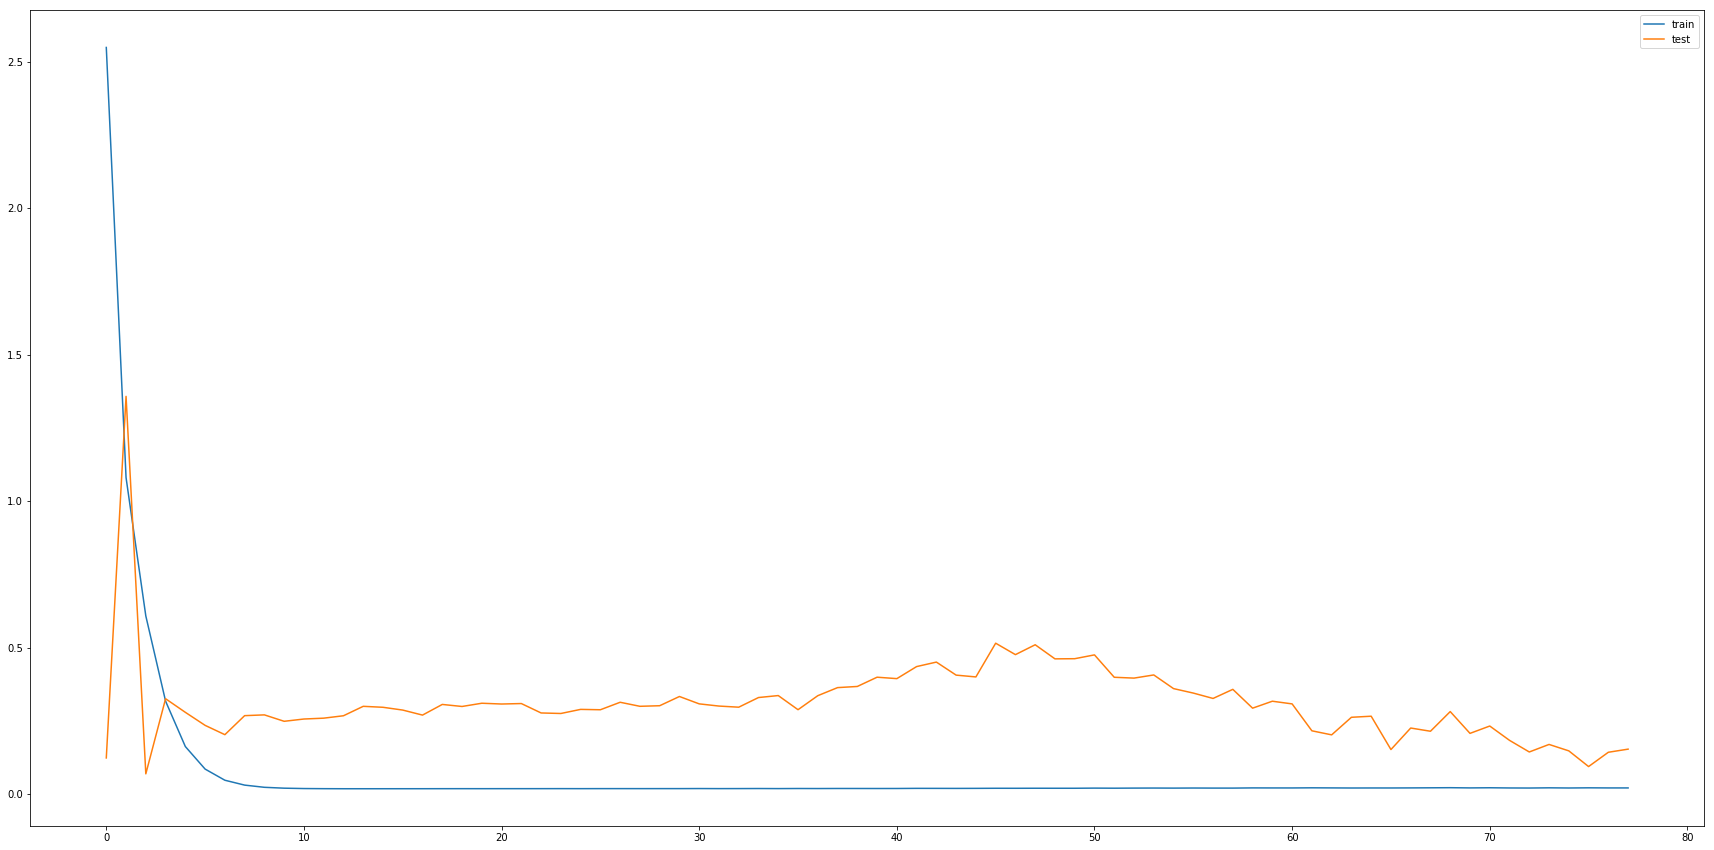

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_31 (GRU)                 (None, 1, 384)            495360    
_________________________________________________________________
batch_normalization_60 (Batc (None, 1, 384)            1536      
_________________________________________________________________
dropout_69 (Dropout)         (None, 1, 384)            0         
_________________________________________________________________
gru_32 (GRU)                 (None, 384)               885888    
_________________________________________________________________
batch_normalization_61 (Batc (None, 384)               1536      
_________________________________________________________________
dropout_70 (Dropout)         (None, 384)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 385       
Total para

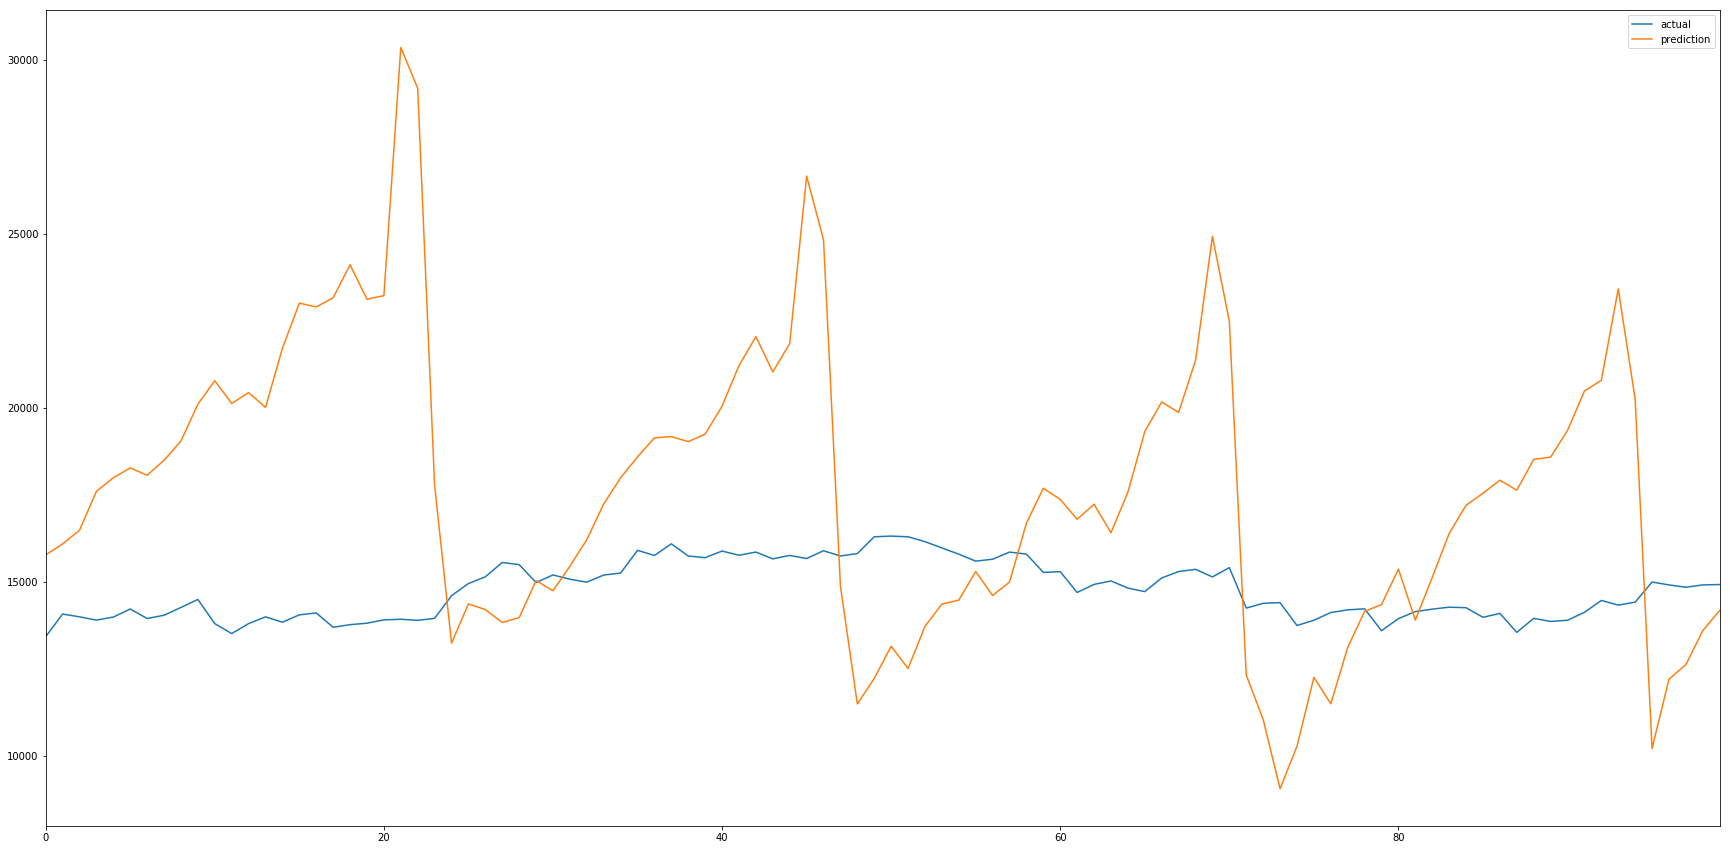

In [64]:
run_rnn('gru2', False)

<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_34 (Bidirectio (None, 1, 768)            990720    
_________________________________________________________________
batch_normalization_62 (Batc (None, 1, 768)            3072      
_________________________________________________________________
dropout_71 (Dropout)         (None, 1, 768)            0         
_________________________________________________________________
bidirectional_35 (Bidirectio (None, 768)               2656512   
_________________________________________________________________
batch_normalization_63 (Batc (None, 768)               3072      
_________________________________________________________________
dropout_72 (Dropout)         (None, 768)               0         
_____________________________________________________

Epoch 32/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0076
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 2s 63us/step - loss: 0.0192 - val_loss: 0.3197
Epoch 33/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0179
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 2s 63us/step - loss: 0.0192 - val_loss: 0.3264
Epoch 34/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0101
Epoch 00034: val_loss did not improve
27350/27350 [==============================] - 2s 63us/step - loss: 0.0193 - val_loss: 0.2957
Epoch 35/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0100
Epoch 00035: val_loss did not improve
27350/27350 [==============================] - 2s 63us/step - loss: 0.0193 - val_loss: 0.3408
Epoch 36/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0180
Epoch 00036: val_loss did not improve
27350/27350 [======

26496/27350 [============================>.] - ETA: 0s - loss: 0.0123
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 2s 63us/step - loss: 0.0230 - val_loss: 0.2744
Epoch 71/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0145
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 2s 62us/step - loss: 0.0232 - val_loss: 0.2537
Epoch 72/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0146
Epoch 00072: val_loss did not improve
27350/27350 [==============================] - 2s 62us/step - loss: 0.0232 - val_loss: 0.3388
Epoch 73/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0145
Epoch 00073: val_loss did not improve
27350/27350 [==============================] - 2s 62us/step - loss: 0.0230 - val_loss: 0.2440
Epoch 74/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0148
Epoch 00074: val_loss did not improve
27350/27350 [===================

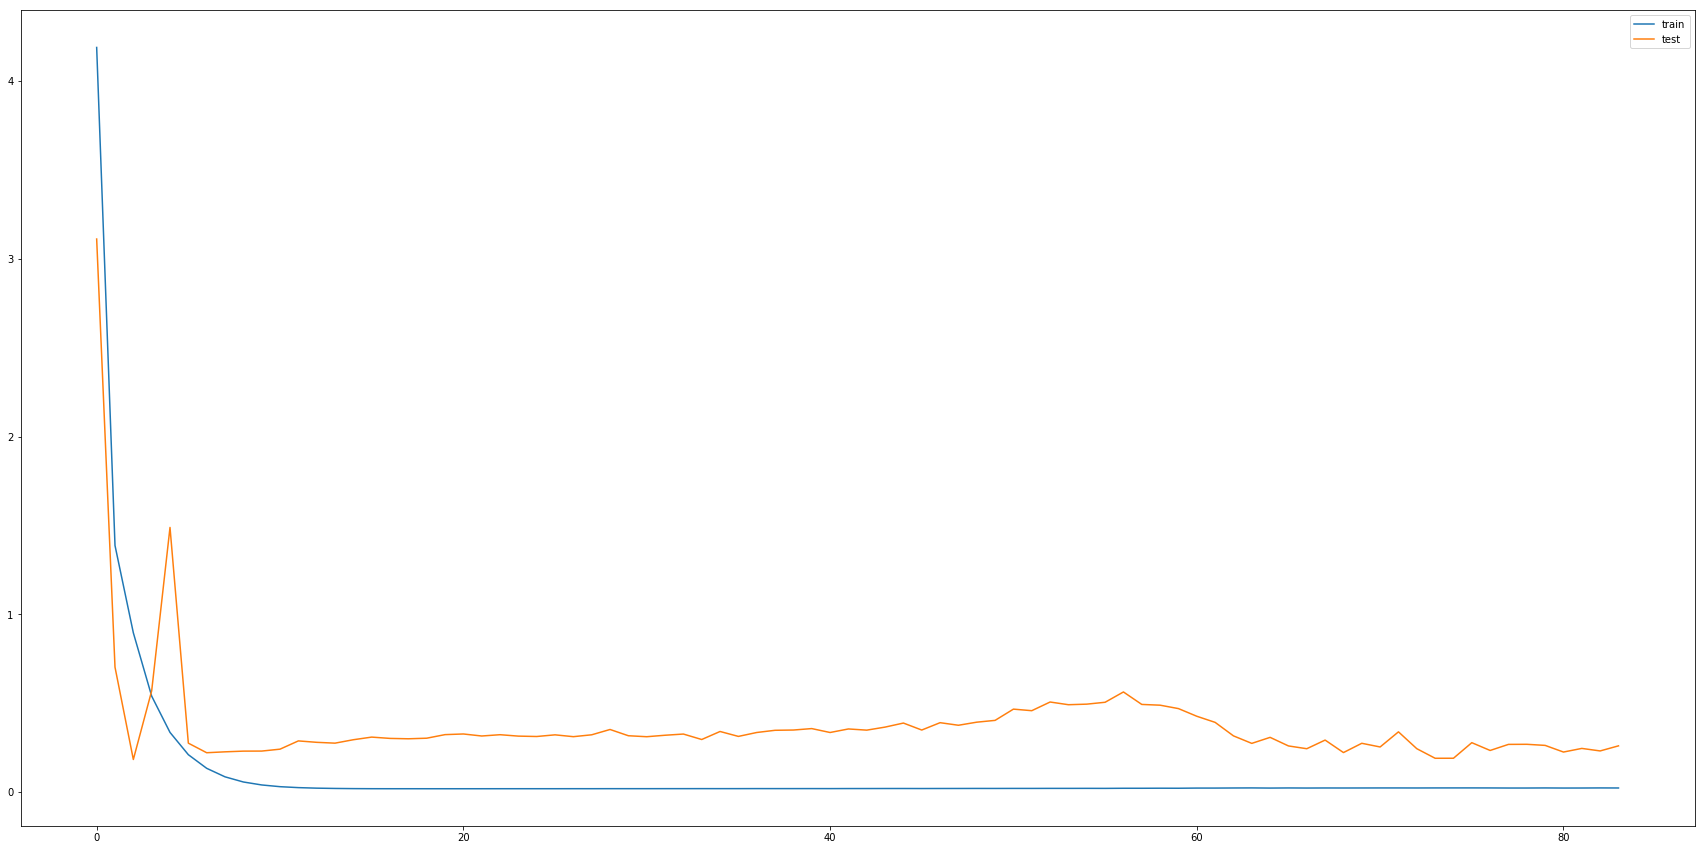

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_36 (Bidirectio (None, 1, 768)            990720    
_________________________________________________________________
batch_normalization_64 (Batc (None, 1, 768)            3072      
_________________________________________________________________
dropout_73 (Dropout)         (None, 1, 768)            0         
_________________________________________________________________
bidirectional_37 (Bidirectio (None, 768)               2656512   
_________________________________________________________________
batch_normalization_65 (Batc (None, 768)               3072      
_________________________________________________________________
dropout_74 (Dropout)         (None, 768)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 769       
Total para

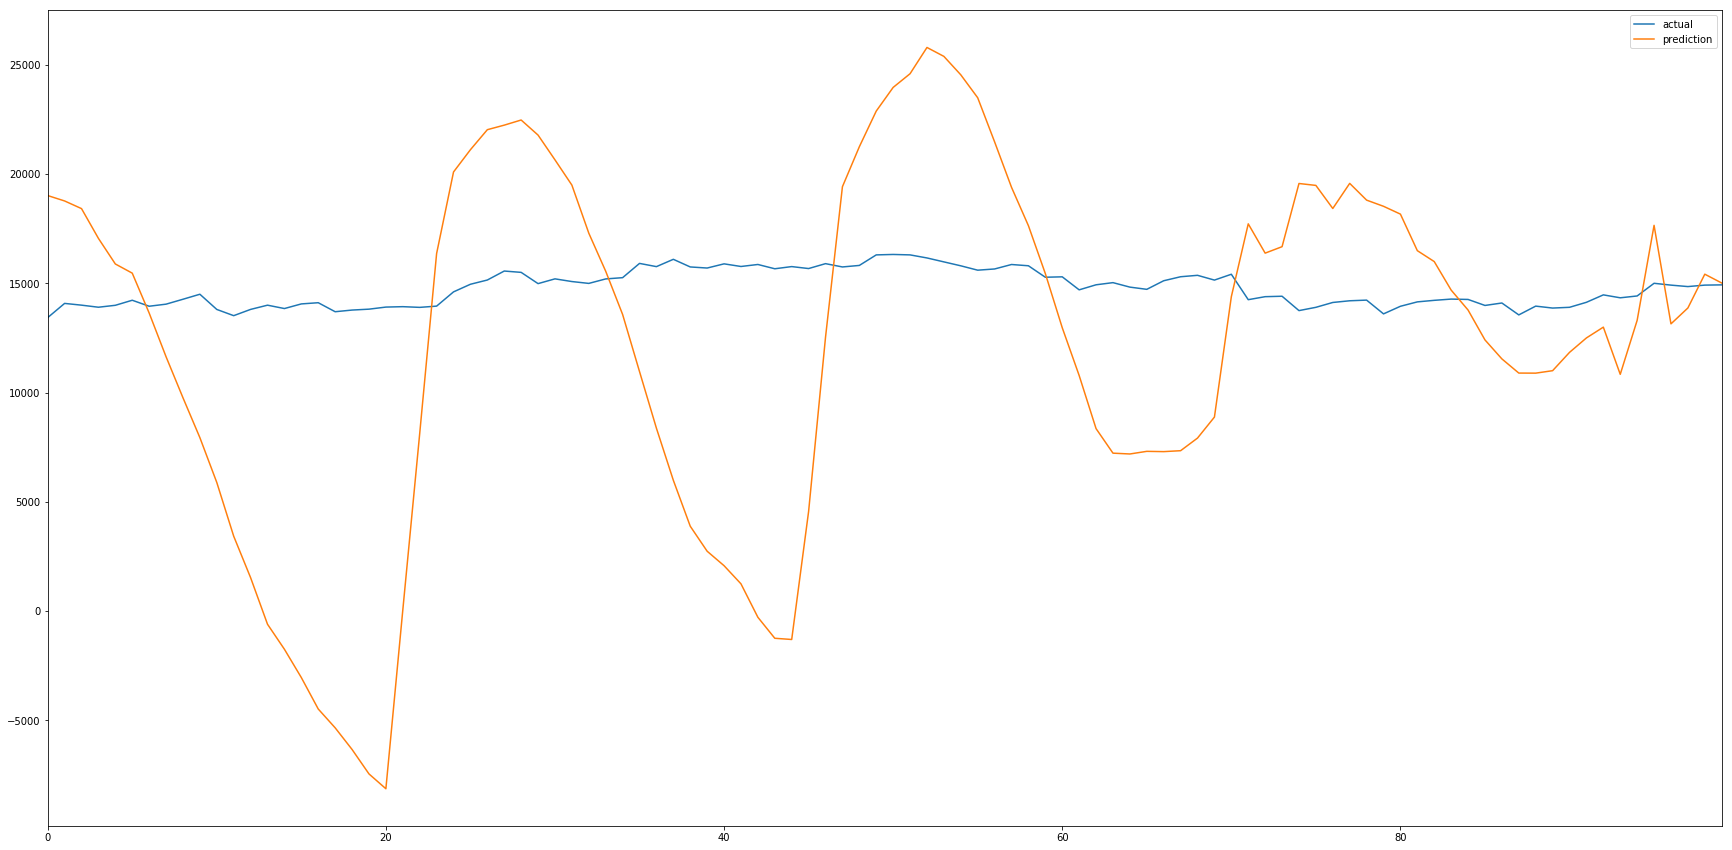

In [65]:
run_rnn('gru2', True)

<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_41 (LSTM)               (None, 1, 384)            660480    
_________________________________________________________________
batch_normalization_66 (Batc (None, 1, 384)            1536      
_________________________________________________________________
dropout_75 (Dropout)         (None, 1, 384)            0         
_________________________________________________________________
lstm_42 (LSTM)               (None, 1, 384)            1181184   
_________________________________________________________________
dropout_76 (Dropout)         (None, 1, 384)            0         
_________________________________________________________________
lstm_43 (LSTM)               (None, 384)               1181184   
_____________________________________________________

26880/27350 [============================>.] - ETA: 0s - loss: 0.0096
Epoch 00030: val_loss did not improve
27350/27350 [==============================] - 2s 56us/step - loss: 0.0189 - val_loss: 0.0334
Epoch 31/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0096
Epoch 00031: val_loss did not improve
27350/27350 [==============================] - 2s 56us/step - loss: 0.0189 - val_loss: 0.0345
Epoch 32/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0097
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 2s 56us/step - loss: 0.0190 - val_loss: 0.0322
Epoch 33/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0097
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 2s 56us/step - loss: 0.0190 - val_loss: 0.0470
Epoch 34/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0097
Epoch 00034: val_loss did not improve
27350/27350 [===================

Epoch 68/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0118
Epoch 00068: val_loss did not improve
27350/27350 [==============================] - 2s 55us/step - loss: 0.0203 - val_loss: 0.0145
Epoch 69/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0116
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 2s 55us/step - loss: 0.0201 - val_loss: 0.0350
Epoch 70/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0115
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 2s 55us/step - loss: 0.0200 - val_loss: 0.0267
Epoch 71/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0119
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 2s 55us/step - loss: 0.0203 - val_loss: 0.0104
Epoch 72/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0118
Epoch 00072: val_loss did not improve
27350/27350 [======

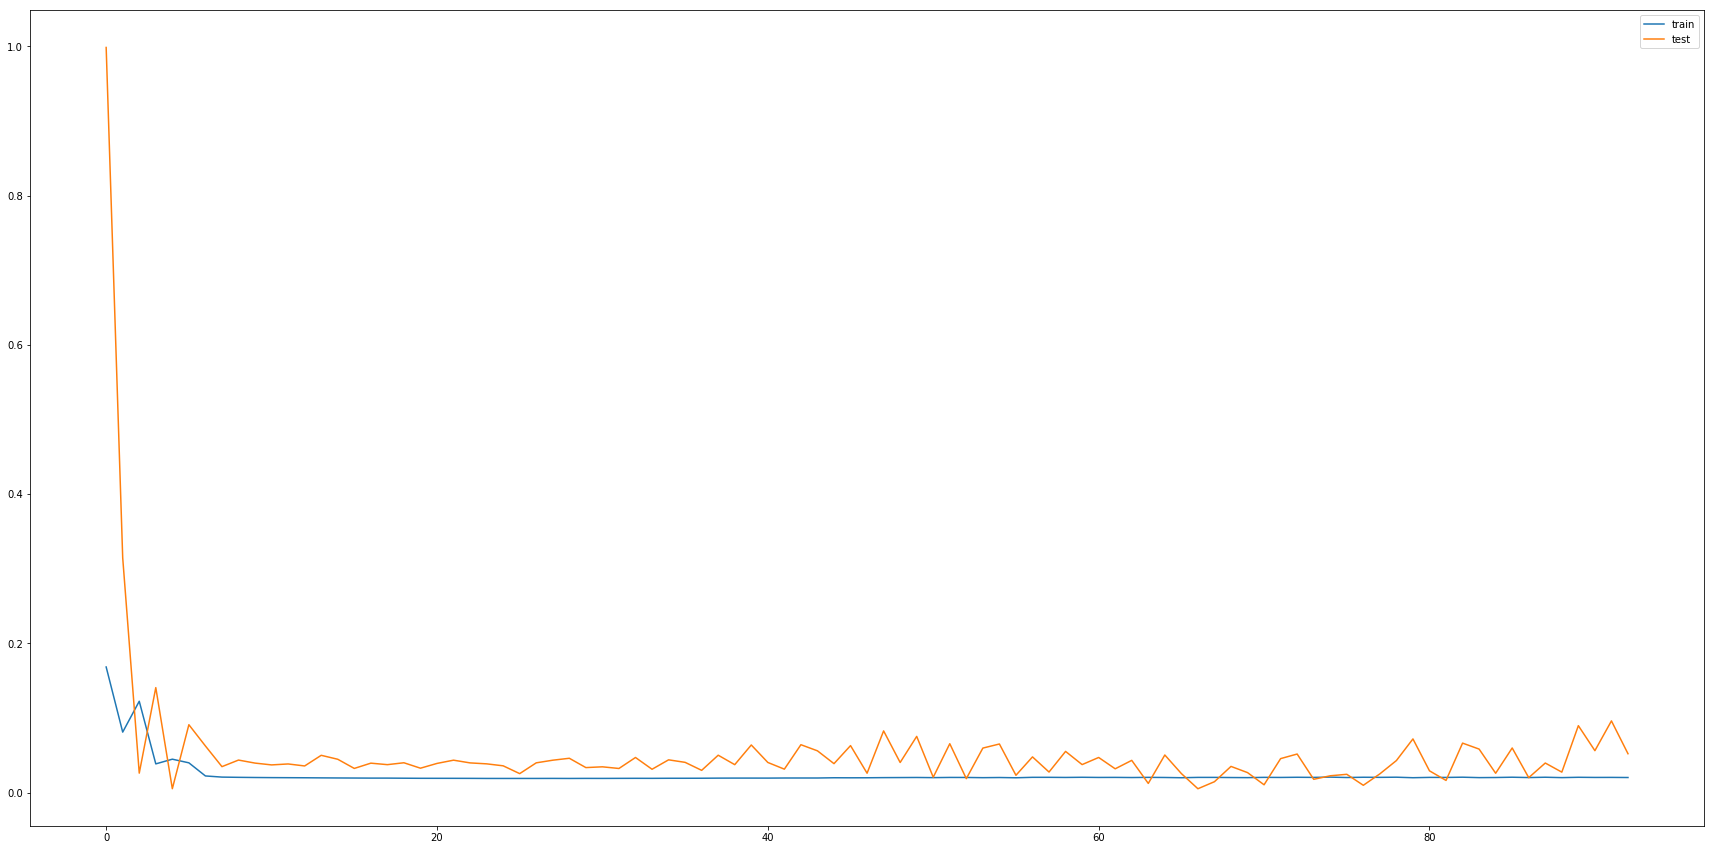

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_44 (LSTM)               (None, 1, 384)            660480    
_________________________________________________________________
batch_normalization_68 (Batc (None, 1, 384)            1536      
_________________________________________________________________
dropout_78 (Dropout)         (None, 1, 384)            0         
_________________________________________________________________
lstm_45 (LSTM)               (None, 1, 384)            1181184   
_________________________________________________________________
dropout_79 (Dropout)         (None, 1, 384)            0         
_________________________________________________________________
lstm_46 (LSTM)               (None, 384)               1181184   
_________________________________________________________________
batch_normalization_69 (Batc (None, 384)               1536      
__________

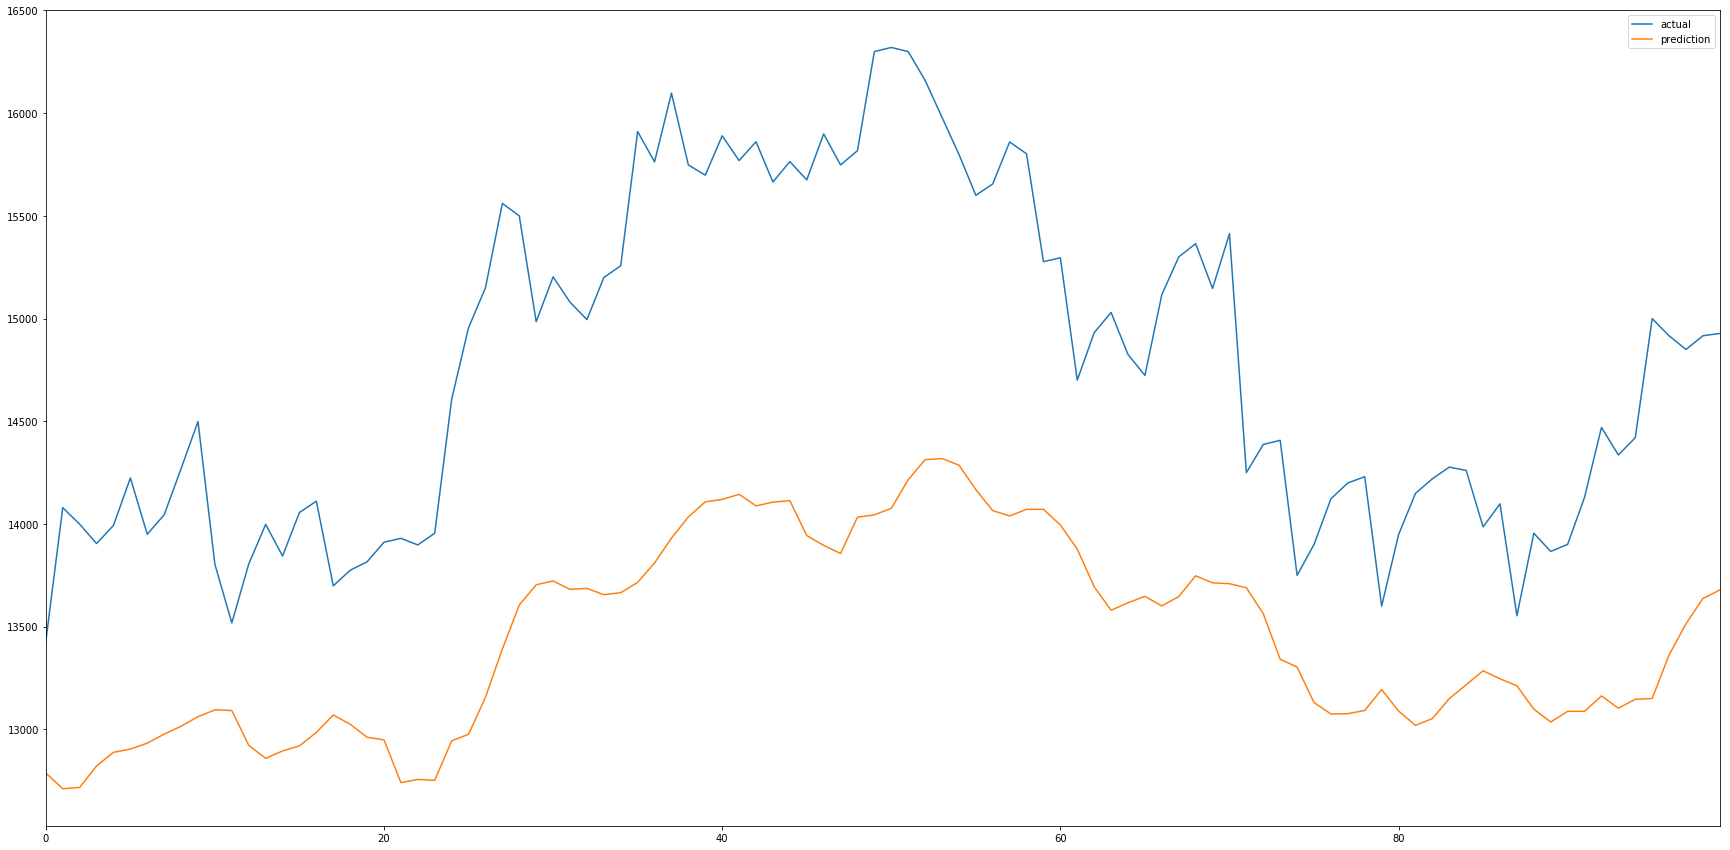

In [66]:
run_rnn('lstm3', False)

<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_38 (Bidirectio (None, 1, 768)            1320960   
_________________________________________________________________
batch_normalization_70 (Batc (None, 1, 768)            3072      
_________________________________________________________________
dropout_81 (Dropout)         (None, 1, 768)            0         
_________________________________________________________________
bidirectional_39 (Bidirectio (None, 1, 768)            3542016   
_________________________________________________________________
dropout_82 (Dropout)         (None, 1, 768)            0         
_________________________________________________________________
bidirectional_40 (Bidirectio (None, 768)               3542016   
_____________________________________________________

27264/27350 [============================>.] - ETA: 0s - loss: 0.0174
Epoch 00030: val_loss did not improve
27350/27350 [==============================] - 3s 118us/step - loss: 0.0187 - val_loss: 0.0375
Epoch 31/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0174
Epoch 00031: val_loss did not improve
27350/27350 [==============================] - 3s 118us/step - loss: 0.0187 - val_loss: 0.0358
Epoch 32/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0174
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 3s 117us/step - loss: 0.0187 - val_loss: 0.0458
Epoch 33/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0173
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 3s 116us/step - loss: 0.0187 - val_loss: 0.0396
Epoch 34/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0173
Epoch 00034: val_loss did not improve
27350/27350 [===============

Epoch 67/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0191
Epoch 00067: val_loss did not improve
27350/27350 [==============================] - 3s 116us/step - loss: 0.0202 - val_loss: 0.0030
Epoch 68/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0194
Epoch 00068: val_loss did not improve
27350/27350 [==============================] - 3s 119us/step - loss: 0.0205 - val_loss: 0.0125
Epoch 69/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0190
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 3s 119us/step - loss: 0.0201 - val_loss: 0.0041
Epoch 70/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0189
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 3s 117us/step - loss: 0.0200 - val_loss: 0.0179
Epoch 71/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0191
Epoch 00071: val_loss did not improve
27350/27350 [==

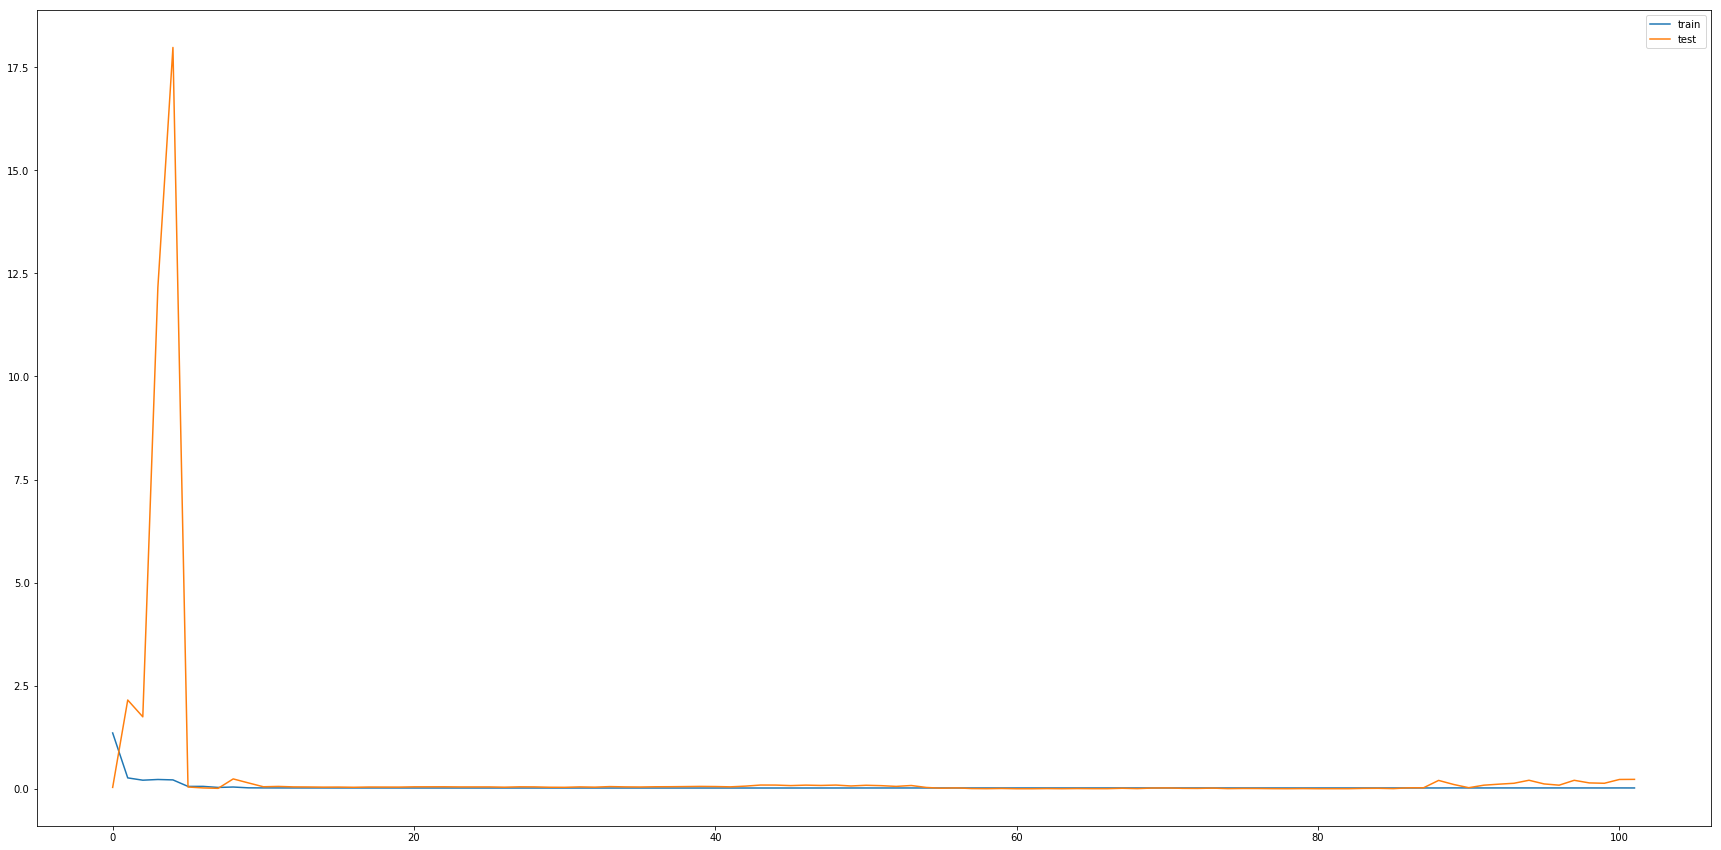

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_41 (Bidirectio (None, 1, 768)            1320960   
_________________________________________________________________
batch_normalization_72 (Batc (None, 1, 768)            3072      
_________________________________________________________________
dropout_84 (Dropout)         (None, 1, 768)            0         
_________________________________________________________________
bidirectional_42 (Bidirectio (None, 1, 768)            3542016   
_________________________________________________________________
dropout_85 (Dropout)         (None, 1, 768)            0         
_________________________________________________________________
bidirectional_43 (Bidirectio (None, 768)               3542016   
_________________________________________________________________
batch_normalization_73 (Batc (None, 768)               3072      
__________

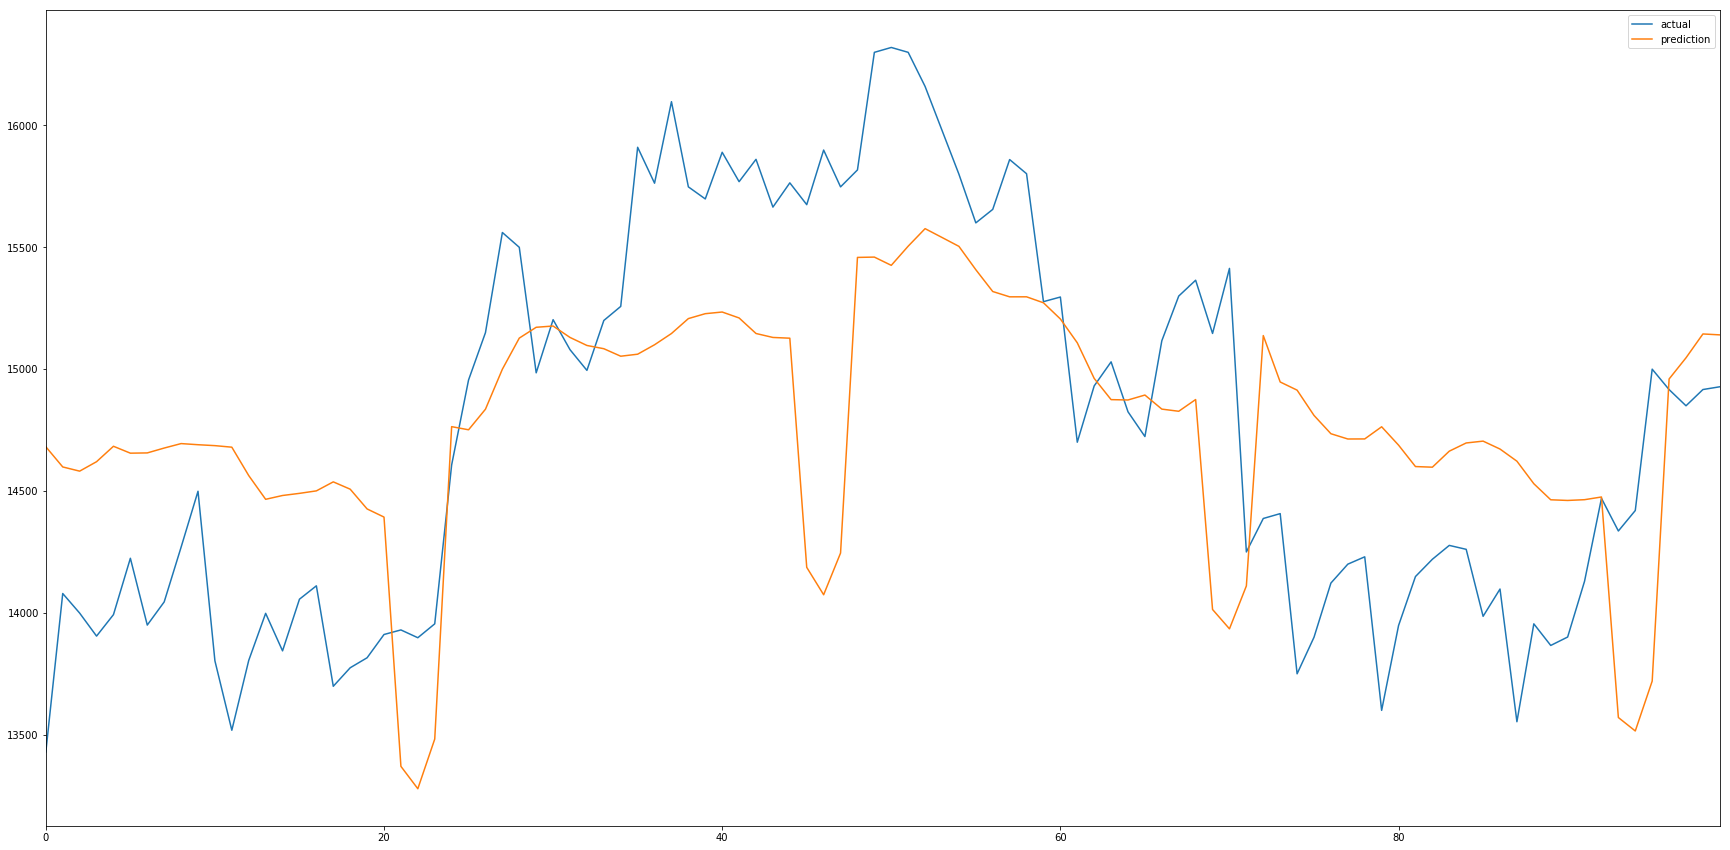

In [67]:
run_rnn('lstm3', True)

<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_37 (GRU)                 (None, 1, 384)            495360    
_________________________________________________________________
batch_normalization_74 (Batc (None, 1, 384)            1536      
_________________________________________________________________
dropout_87 (Dropout)         (None, 1, 384)            0         
_________________________________________________________________
gru_38 (GRU)                 (None, 1, 384)            885888    
_________________________________________________________________
dropout_88 (Dropout)         (None, 1, 384)            0         
_________________________________________________________________
gru_39 (GRU)                 (None, 384)               885888    
_____________________________________________________

Epoch 31/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0104
Epoch 00031: val_loss did not improve
27350/27350 [==============================] - 1s 46us/step - loss: 0.0196 - val_loss: 0.3631
Epoch 32/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0106
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 1s 46us/step - loss: 0.0197 - val_loss: 0.3200
Epoch 33/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0107
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 1s 46us/step - loss: 0.0199 - val_loss: 0.3593
Epoch 34/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0109
Epoch 00034: val_loss did not improve
27350/27350 [==============================] - 1s 46us/step - loss: 0.0201 - val_loss: 0.3451
Epoch 35/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0106
Epoch 00035: val_loss did not improve
27350/27350 [======

26880/27350 [============================>.] - ETA: 0s - loss: 0.0127
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 1s 46us/step - loss: 0.0214 - val_loss: 0.2956
Epoch 70/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0131
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 1s 46us/step - loss: 0.0219 - val_loss: 0.2897
Epoch 71/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0126
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 1s 46us/step - loss: 0.0214 - val_loss: 0.2594
Epoch 72/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0128
Epoch 00072: val_loss did not improve
27350/27350 [==============================] - 1s 47us/step - loss: 0.0216 - val_loss: 0.2192
Epoch 73/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0132
Epoch 00073: val_loss did not improve
27350/27350 [===================

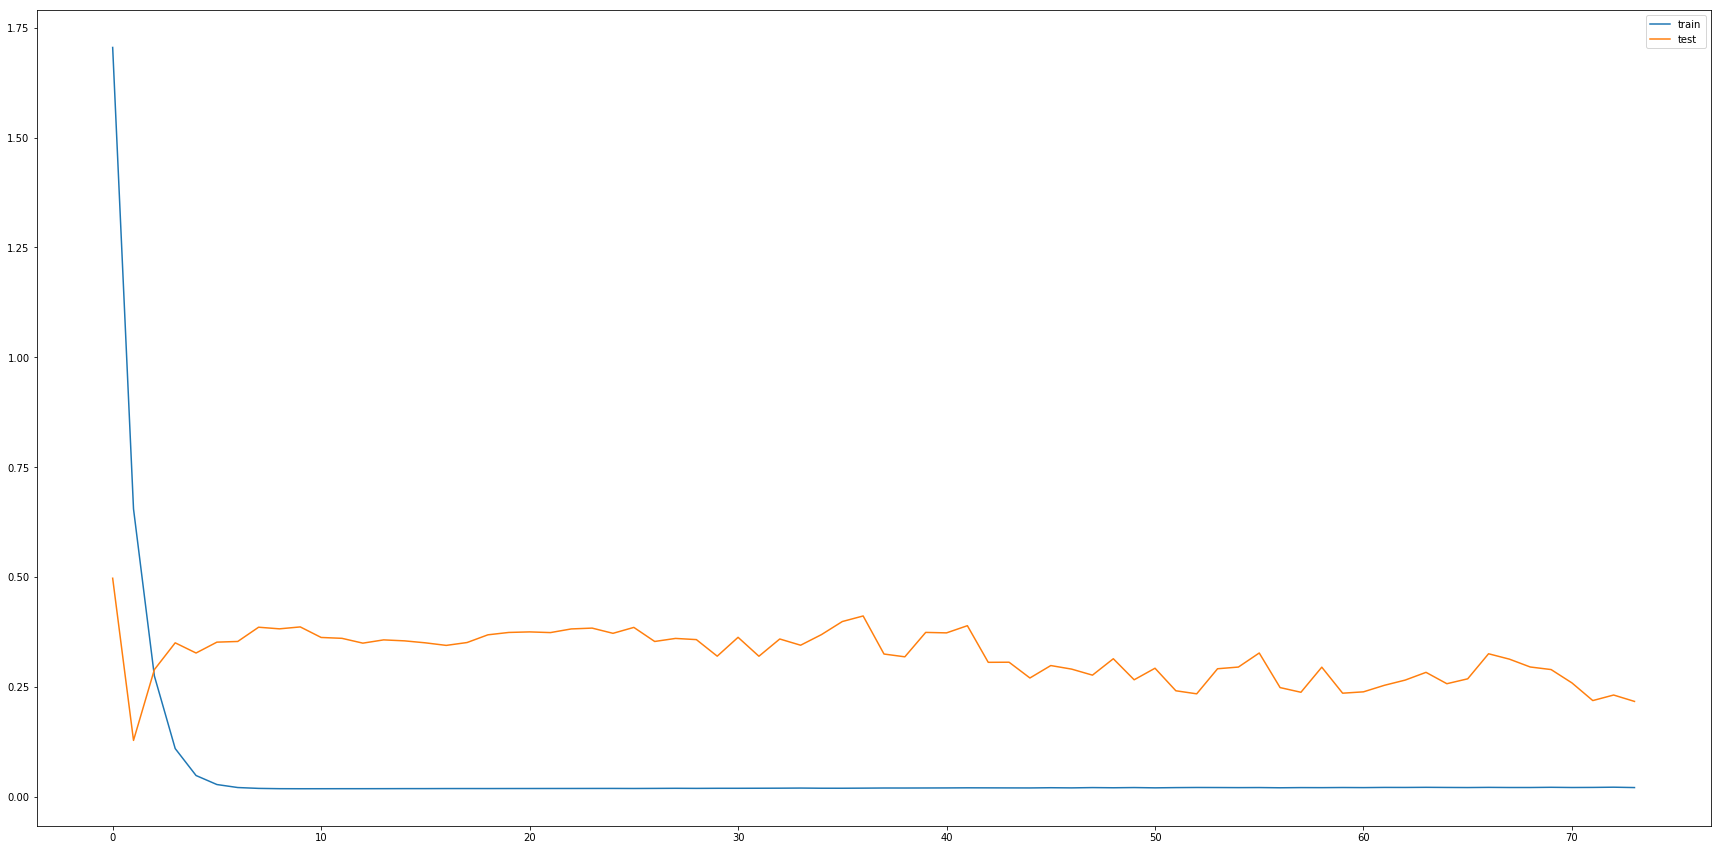

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_40 (GRU)                 (None, 1, 384)            495360    
_________________________________________________________________
batch_normalization_76 (Batc (None, 1, 384)            1536      
_________________________________________________________________
dropout_90 (Dropout)         (None, 1, 384)            0         
_________________________________________________________________
gru_41 (GRU)                 (None, 1, 384)            885888    
_________________________________________________________________
dropout_91 (Dropout)         (None, 1, 384)            0         
_________________________________________________________________
gru_42 (GRU)                 (None, 384)               885888    
_________________________________________________________________
batch_normalization_77 (Batc (None, 384)               1536      
__________

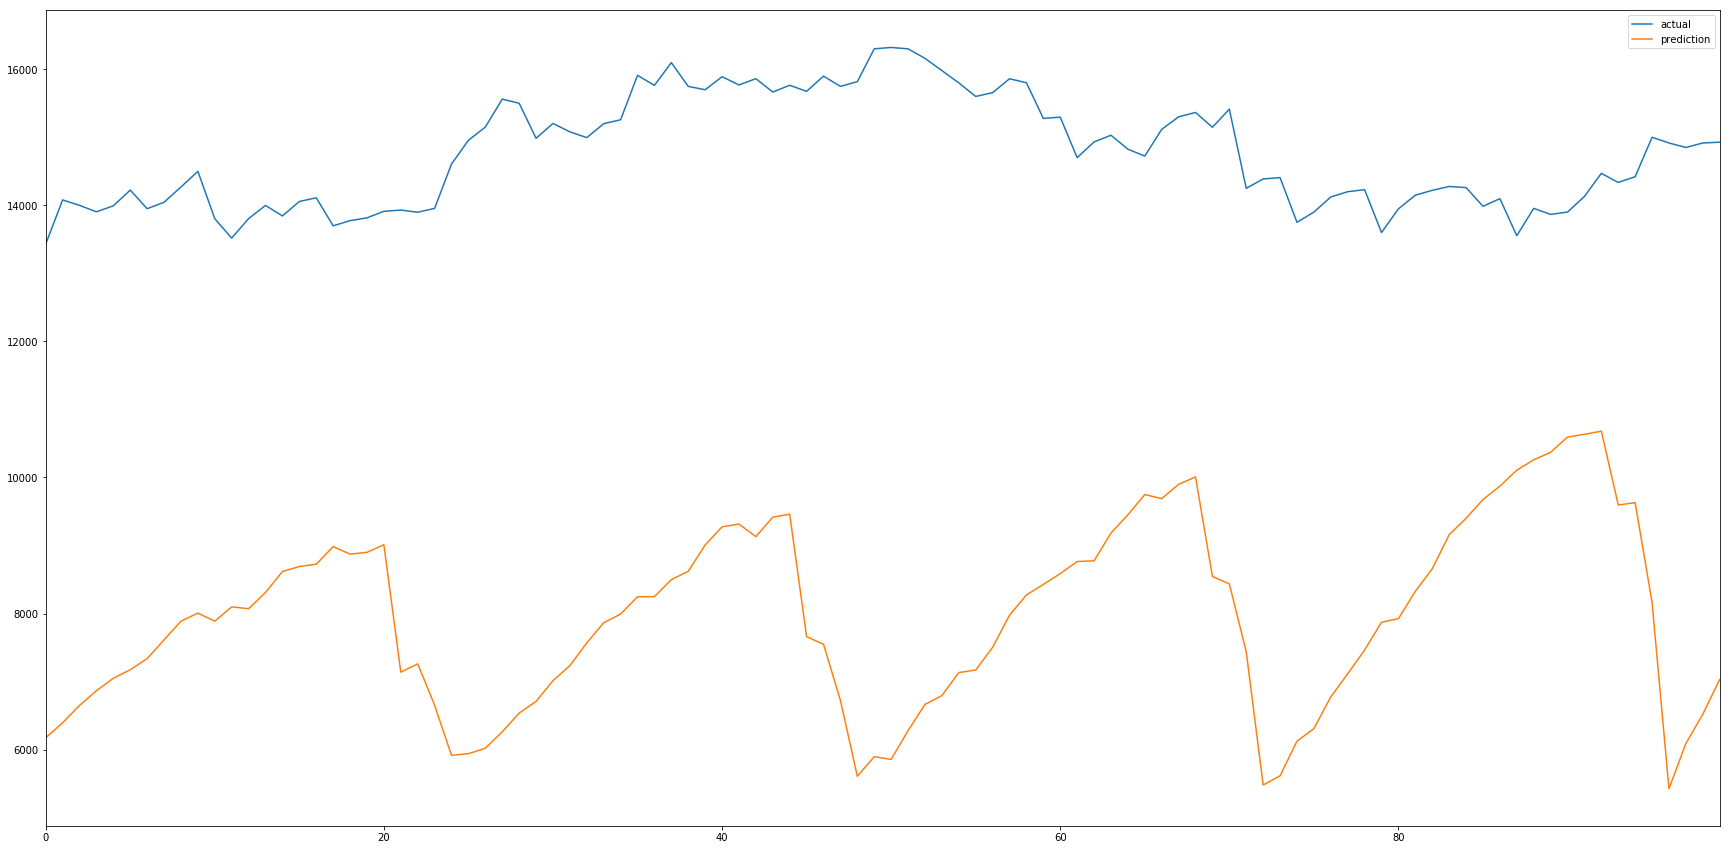

In [68]:
run_rnn('gru3', False)

<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_44 (Bidirectio (None, 1, 768)            990720    
_________________________________________________________________
batch_normalization_78 (Batc (None, 1, 768)            3072      
_________________________________________________________________
dropout_93 (Dropout)         (None, 1, 768)            0         
_________________________________________________________________
bidirectional_45 (Bidirectio (None, 1, 768)            2656512   
_________________________________________________________________
dropout_94 (Dropout)         (None, 1, 768)            0         
_________________________________________________________________
bidirectional_46 (Bidirectio (None, 768)               2656512   
_____________________________________________________

Epoch 31/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0184
Epoch 00031: val_loss did not improve
27350/27350 [==============================] - 3s 95us/step - loss: 0.0197 - val_loss: 0.3785
Epoch 32/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0185
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 3s 95us/step - loss: 0.0198 - val_loss: 0.3879
Epoch 33/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0187
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 3s 94us/step - loss: 0.0200 - val_loss: 0.3947
Epoch 34/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0188
Epoch 00034: val_loss did not improve
27350/27350 [==============================] - 3s 94us/step - loss: 0.0200 - val_loss: 0.3774
Epoch 35/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0188
Epoch 00035: val_loss did not improve
27350/27350 [======

27264/27350 [============================>.] - ETA: 0s - loss: 0.0214
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 3s 93us/step - loss: 0.0226 - val_loss: 0.3088
Epoch 70/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0216
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 3s 93us/step - loss: 0.0228 - val_loss: 0.3646
Epoch 71/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0212
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 3s 93us/step - loss: 0.0224 - val_loss: 0.4174
Epoch 72/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0208
Epoch 00072: val_loss did not improve
27350/27350 [==============================] - 3s 95us/step - loss: 0.0220 - val_loss: 0.3699
Epoch 73/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0211
Epoch 00073: val_loss did not improve
27350/27350 [===================

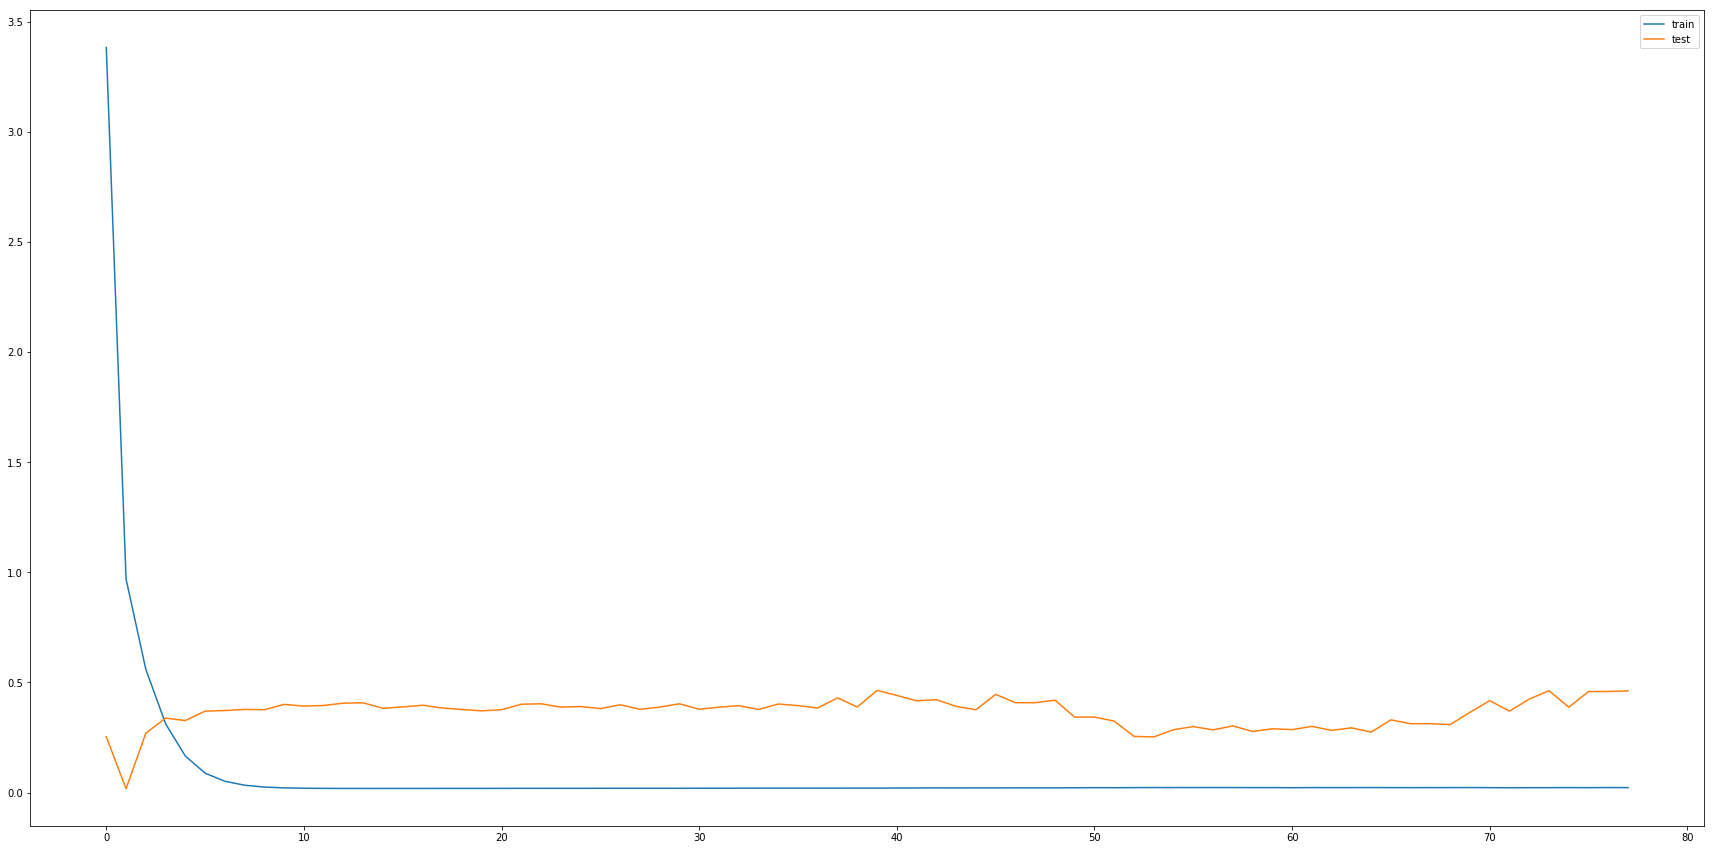

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_47 (Bidirectio (None, 1, 768)            990720    
_________________________________________________________________
batch_normalization_80 (Batc (None, 1, 768)            3072      
_________________________________________________________________
dropout_96 (Dropout)         (None, 1, 768)            0         
_________________________________________________________________
bidirectional_48 (Bidirectio (None, 1, 768)            2656512   
_________________________________________________________________
dropout_97 (Dropout)         (None, 1, 768)            0         
_________________________________________________________________
bidirectional_49 (Bidirectio (None, 768)               2656512   
_________________________________________________________________
batch_normalization_81 (Batc (None, 768)               3072      
__________

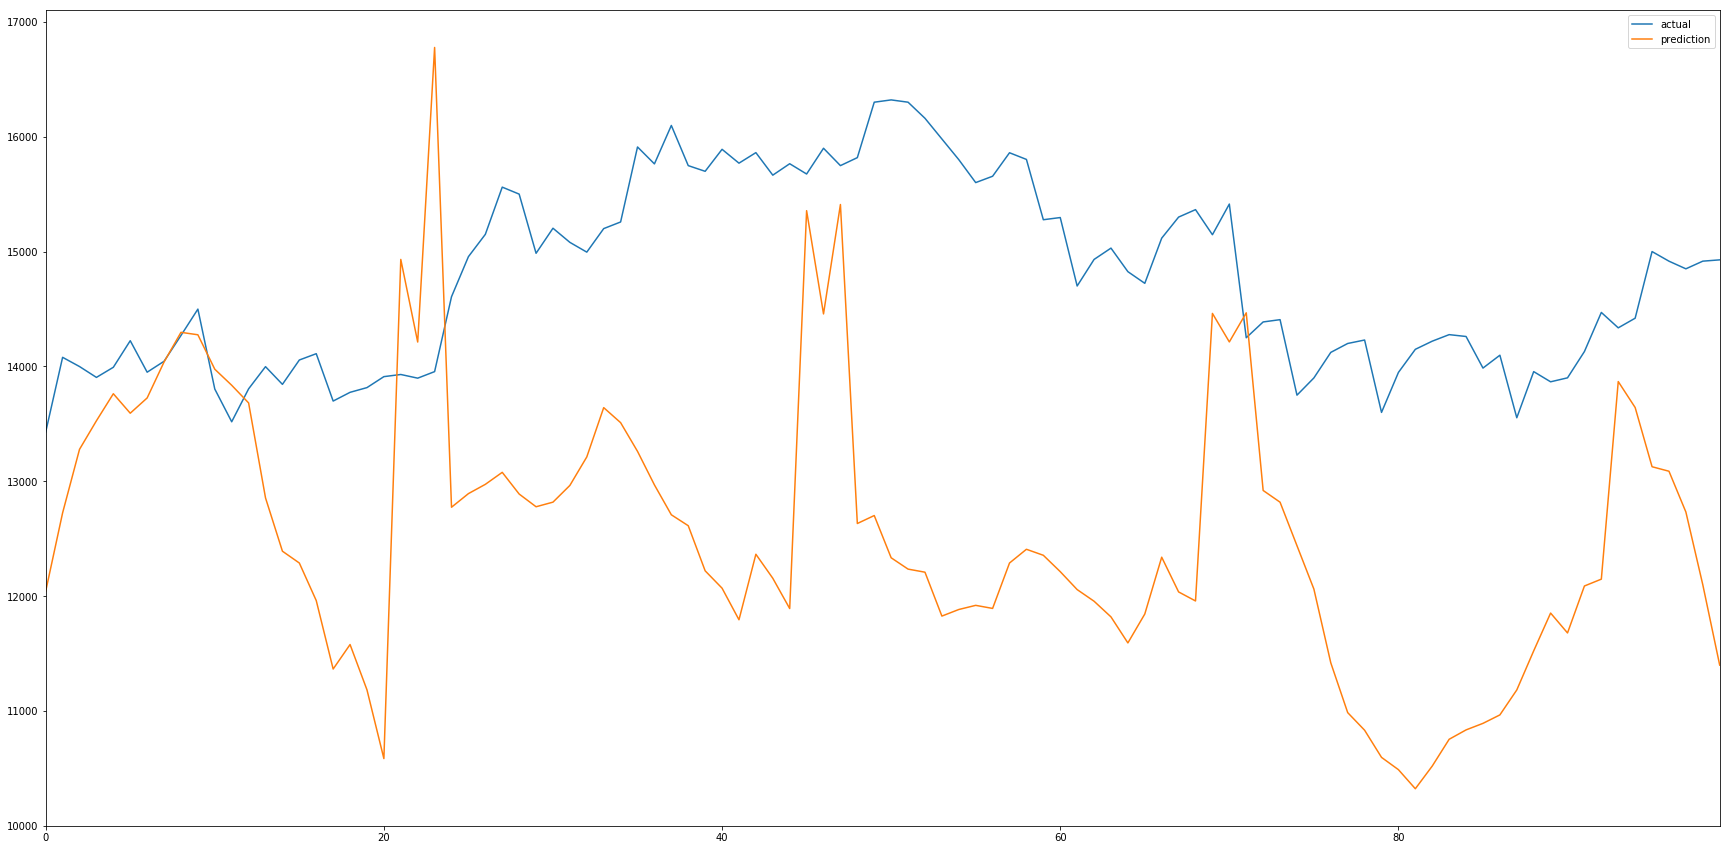

In [69]:
run_rnn('gru3', True)

In [88]:
# design network
def get_lstm1_model(with_bidirectional, n):
    global train, test, valid, train_X, train_y, test_X, test_y, valid_X, valid_y
    model = Sequential()

    if with_bidirectional:
        model.add(Bidirectional(LSTM(n), input_shape=(train_X.shape[1], train_X.shape[2])))
    else:
        model.add(LSTM(n, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(1))
    return model

<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_87 (LSTM)               (None, 64)                28160     
_________________________________________________________________
batch_normalization_120 (Bat (None, 64)                256       
_________________________________________________________________
dropout_137 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 65        
Total params: 28,481
Trainable params: 28,353
Non-trainable params: 128
_________________________________________________________________
None
Train on 27350 samples, validate on 100 samples
Epoch 1/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.2175
Epoch 00001: val_loss improved from inf to 0

Epoch 34/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0180
Epoch 00034: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0193 - val_loss: 0.0346
Epoch 35/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0098
Epoch 00035: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0192 - val_loss: 0.0360
Epoch 36/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0098
Epoch 00036: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0192 - val_loss: 0.0199
Epoch 37/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0178
Epoch 00037: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0191 - val_loss: 0.0024
Epoch 38/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0073
Epoch 00038: val_loss did not improve
27350/27350 [======

Epoch 72/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0092
Epoch 00072: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0184 - val_loss: 0.0225
Epoch 73/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0172
Epoch 00073: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0184 - val_loss: 0.0063
Epoch 74/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0069
Epoch 00074: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0185 - val_loss: 0.0280
Epoch 75/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0172
Epoch 00075: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0185 - val_loss: 0.0264
Epoch 76/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0173
Epoch 00076: val_loss did not improve
27350/27350 [======

26880/27350 [============================>.] - ETA: 0s - loss: 0.0093
Epoch 00110: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0185 - val_loss: 0.0285
Epoch 111/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0173
Epoch 00111: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0186 - val_loss: 0.0232
Epoch 112/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0094
Epoch 00112: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0187 - val_loss: 0.0833
Epoch 113/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0175
Epoch 00113: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0188 - val_loss: 0.0170
Epoch 114/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0176
Epoch 00114: val_loss did not improve
27350/27350 [===============

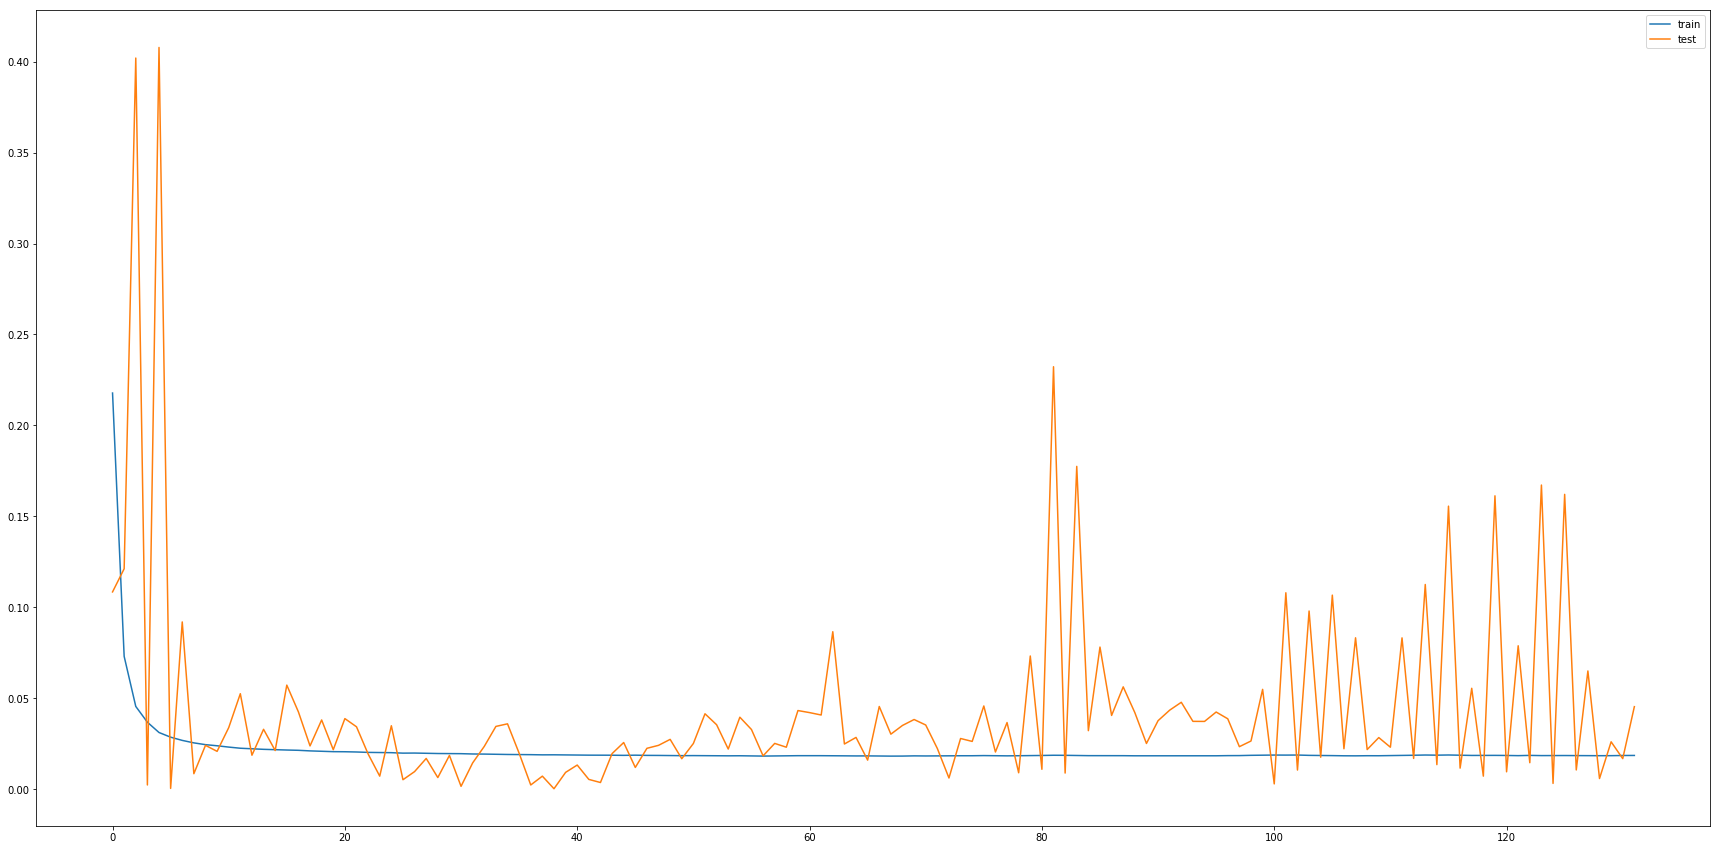

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_88 (LSTM)               (None, 64)                28160     
_________________________________________________________________
batch_normalization_121 (Bat (None, 64)                256       
_________________________________________________________________
dropout_138 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_88 (Dense)             (None, 1)                 65        
Total params: 28,481
Trainable params: 28,353
Non-trainable params: 128
_________________________________________________________________
None
Test RMSE: 370.934


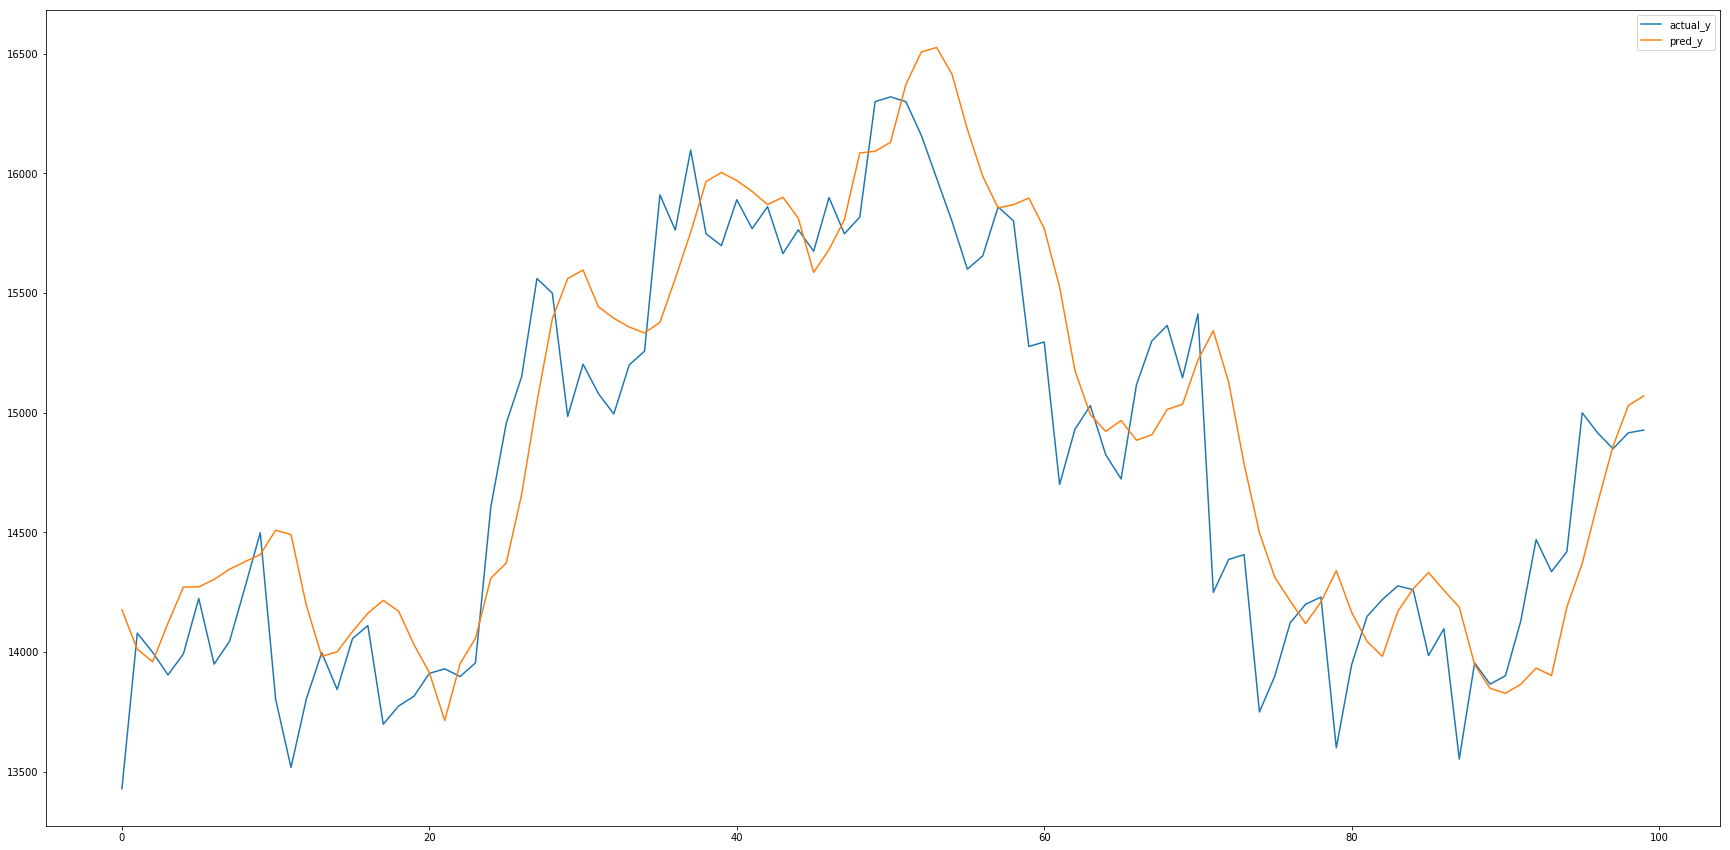

99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
             precision    recall  f1-score   support

          0       0.33      0.35      0.34        40
          1       0.54      0.51      0.52        59

avg / total       0.45      0.44      0.45        99

======= 64 =======





<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_56 (Bidirectio (None, 128)               56320     
_________________________________________________________________
batch_normalization_122 (Bat (None, 128)               512       
_________________________________________________________________
dropout_139 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 129       
Total para

Epoch 32/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0176
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0189 - val_loss: 0.0235
Epoch 33/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0175
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0188 - val_loss: 0.0243
Epoch 34/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0174
Epoch 00034: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0187 - val_loss: 0.0149
Epoch 35/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0174
Epoch 00035: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0187 - val_loss: 0.0066
Epoch 36/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0174
Epoch 00036: val_loss did not improve
27350/27350 [======

27264/27350 [============================>.] - ETA: 0s - loss: 0.0176
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0189 - val_loss: 0.0144
Epoch 71/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0176
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0189 - val_loss: 0.0335
Epoch 72/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0177
Epoch 00072: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0190 - val_loss: 0.0310
Epoch 73/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0178
Epoch 00073: val_loss did not improve
27350/27350 [==============================] - 1s 28us/step - loss: 0.0190 - val_loss: 0.0446
Epoch 74/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0179
Epoch 00074: val_loss did not improve
27350/27350 [===================

27264/27350 [============================>.] - ETA: 0s - loss: 0.0185
Epoch 00108: val_loss did not improve
27350/27350 [==============================] - 1s 28us/step - loss: 0.0197 - val_loss: 0.0351
Epoch 109/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0184
Epoch 00109: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0196 - val_loss: 0.0344
Epoch 00109: early stopping


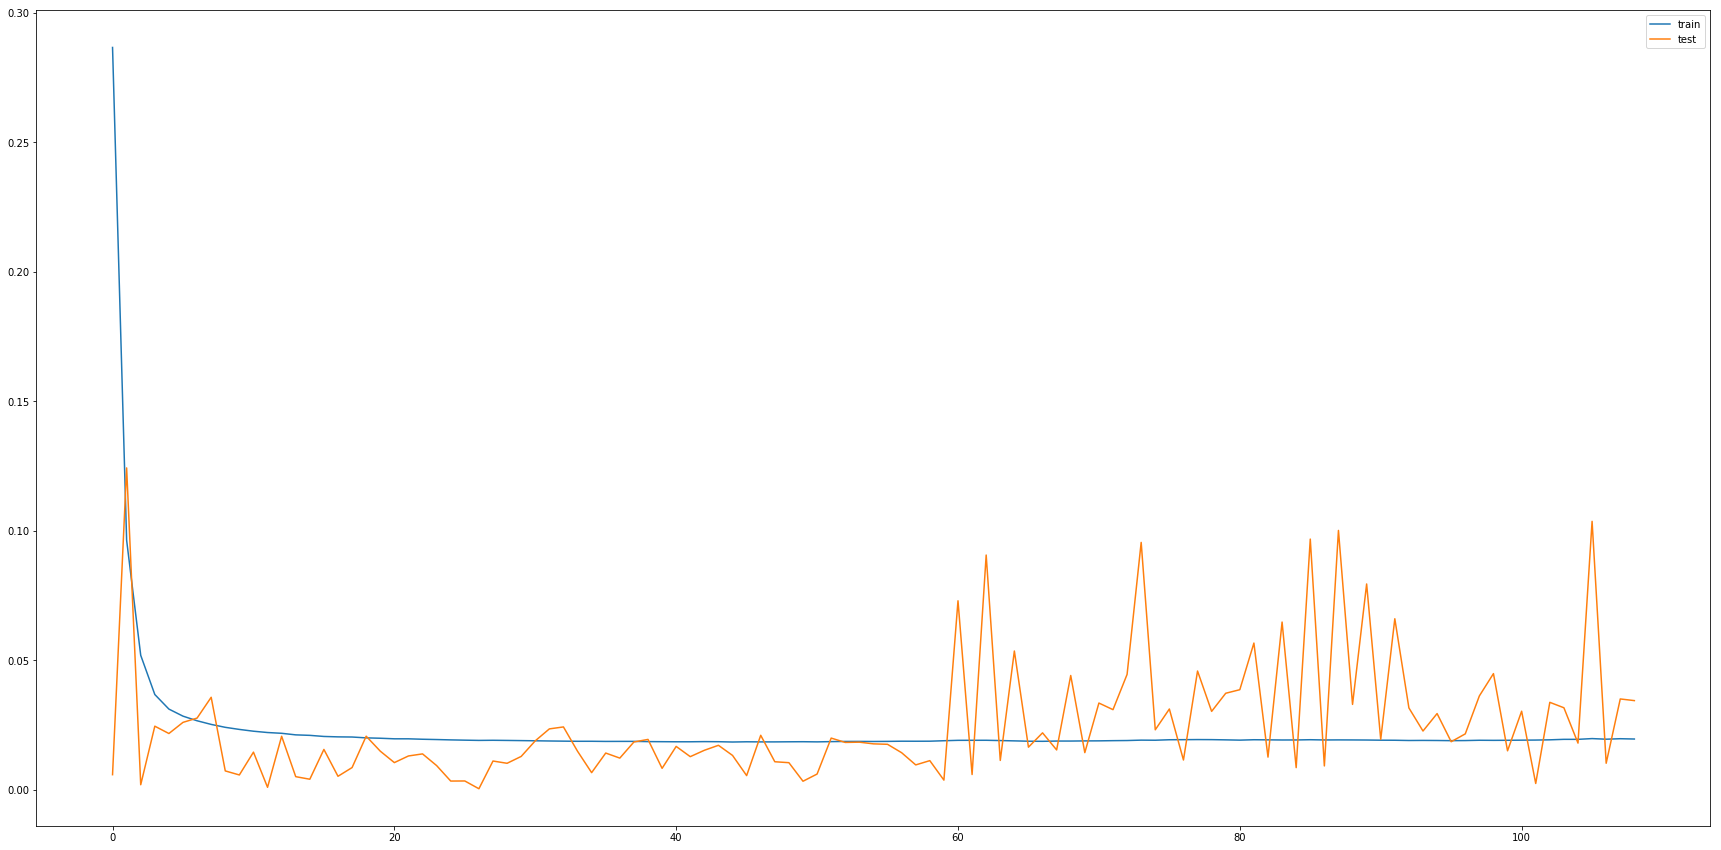

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_57 (Bidirectio (None, 128)               56320     
_________________________________________________________________
batch_normalization_123 (Bat (None, 128)               512       
_________________________________________________________________
dropout_140 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 1)                 129       
Total params: 56,961
Trainable params: 56,705
Non-trainable params: 256
_________________________________________________________________
None
Test RMSE: 396.719


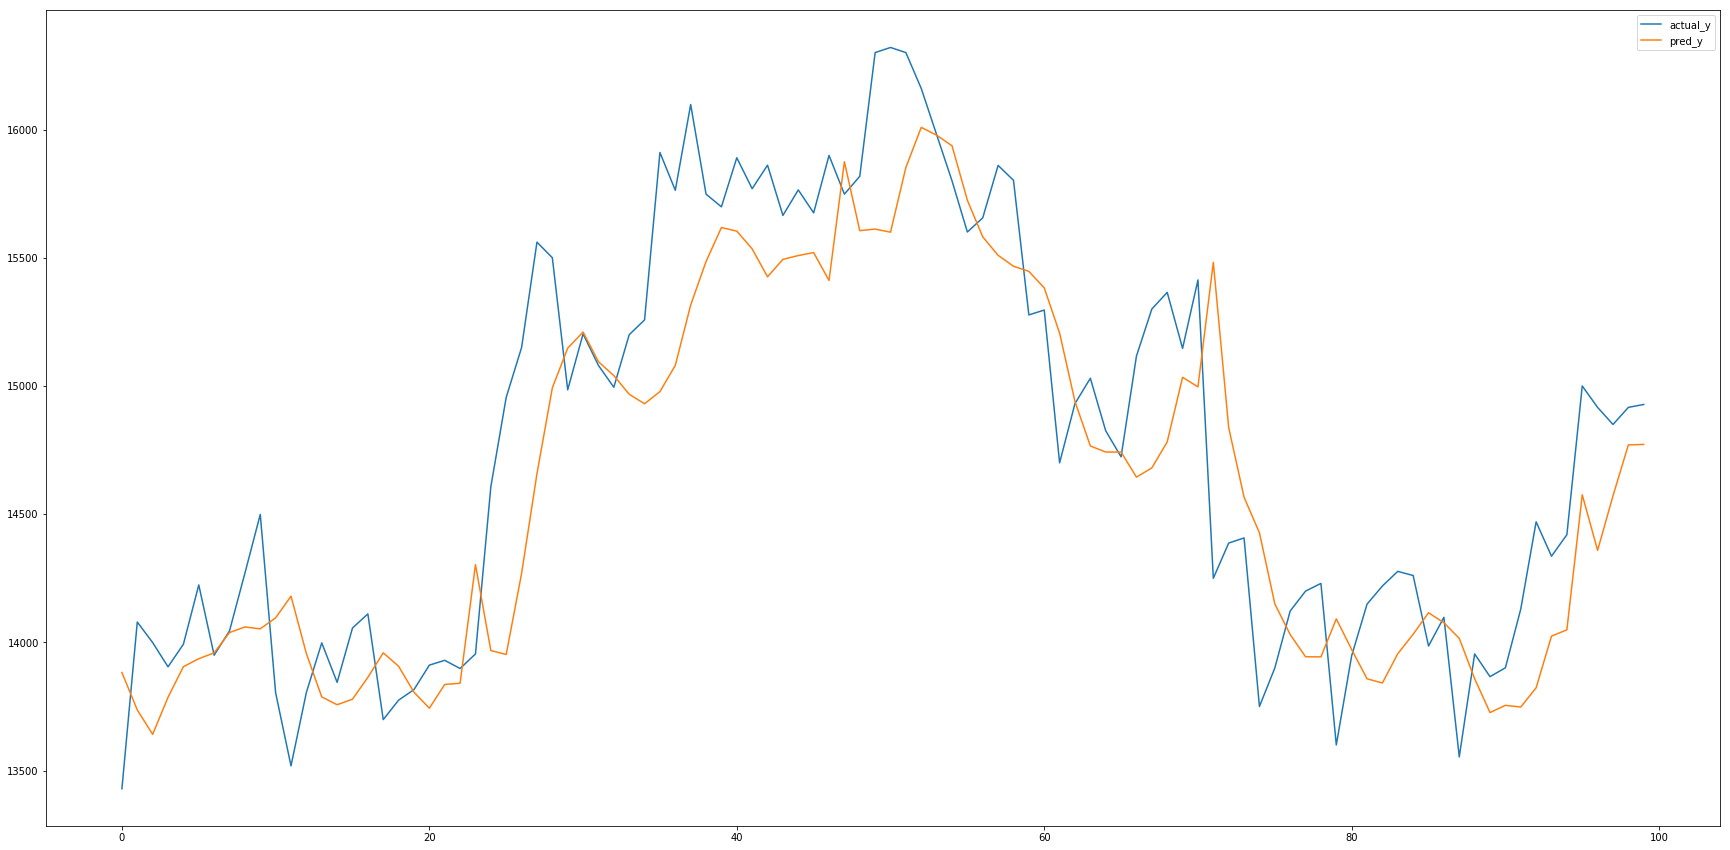

99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 0, 1, 1, 1, 1, 1, 1, 0, 1]
             precision    recall  f1-score   support

          0       0.33      0.42      0.37        40
          1       0.51      0.41      0.45        59

avg / total       0.44      0.41      0.42        99

======= 64 =======





<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_91 (LSTM)               (None, 96)                54528     
_________________________________________________________________
batch_normalization_124 (Bat (None, 96)                384       
_________________________________________________________________
dropout_141 (Dropout)        (None, 96)                0         
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 97        
Total para

Epoch 31/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0080
Epoch 00031: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0199 - val_loss: 0.0171
Epoch 32/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0103
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0197 - val_loss: 0.0010
Epoch 33/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0183
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0196 - val_loss: 0.0069
Epoch 34/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0182
Epoch 00034: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0195 - val_loss: 0.0061
Epoch 35/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0076
Epoch 00035: val_loss did not improve
27350/27350 [======

27264/27350 [============================>.] - ETA: 0s - loss: 0.0173
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0185 - val_loss: 0.0250
Epoch 70/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0070
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0185 - val_loss: 0.0045
Epoch 71/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0172
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0185 - val_loss: 0.0320
Epoch 72/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0172
Epoch 00072: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0184 - val_loss: 0.0069
Epoch 73/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0172
Epoch 00073: val_loss did not improve
27350/27350 [===================

27264/27350 [============================>.] - ETA: 0s - loss: 0.0175
Epoch 00107: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0188 - val_loss: 0.0462
Epoch 108/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0175
Epoch 00108: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0188 - val_loss: 0.0114
Epoch 109/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0096
Epoch 00109: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0189 - val_loss: 0.1270
Epoch 110/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0096
Epoch 00110: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0187 - val_loss: 0.0169
Epoch 111/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0095
Epoch 00111: val_loss did not improve
27350/27350 [===============

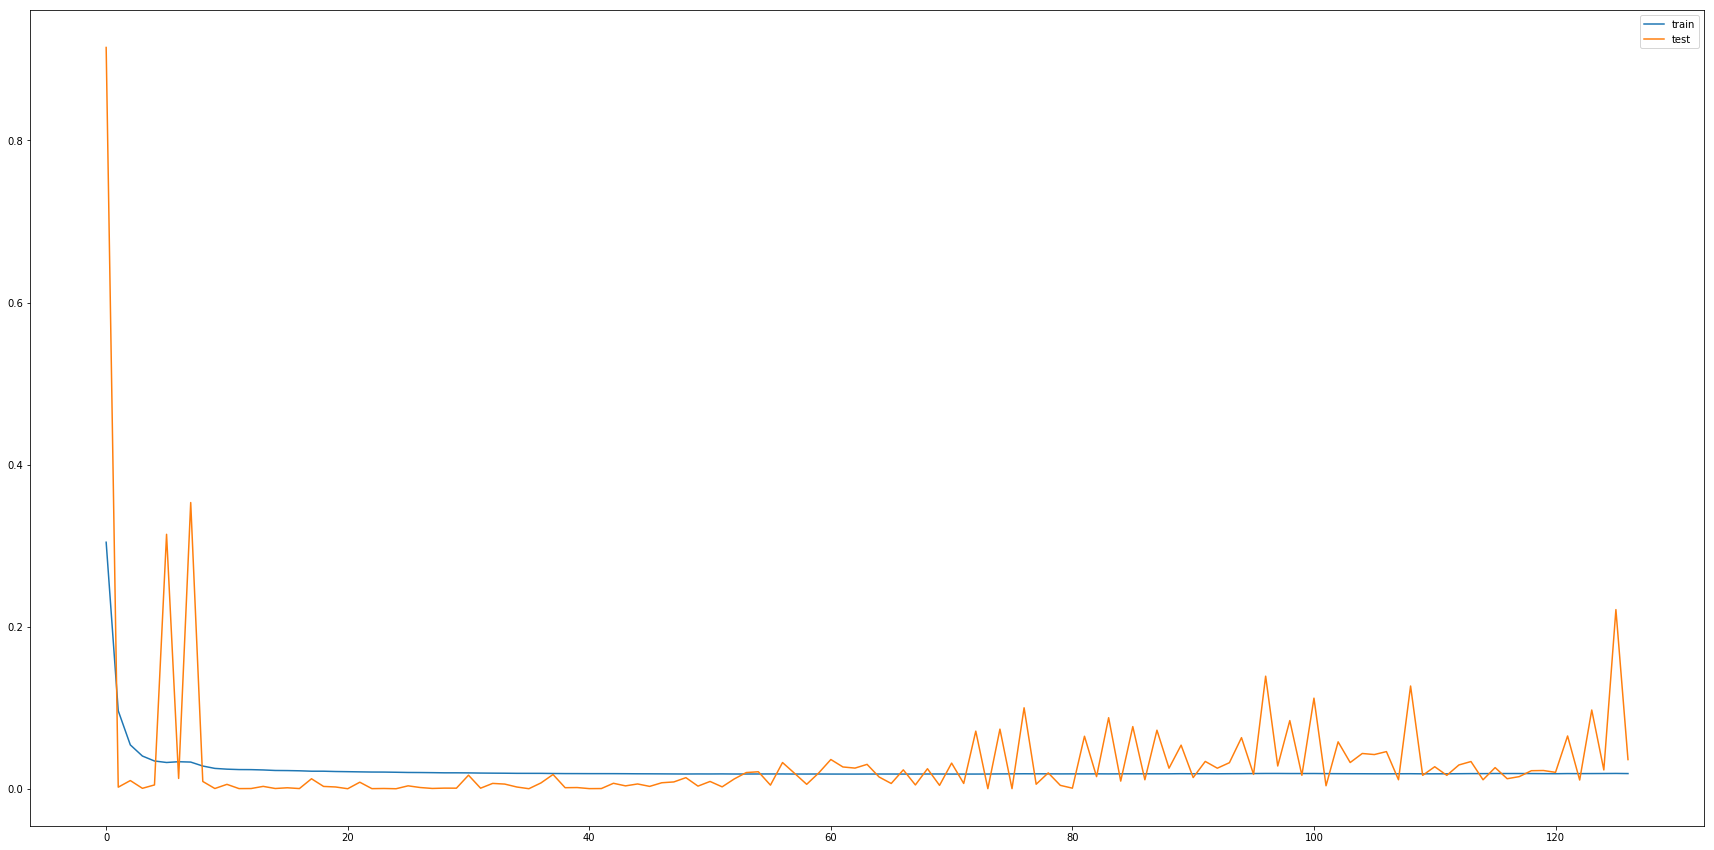

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_92 (LSTM)               (None, 96)                54528     
_________________________________________________________________
batch_normalization_125 (Bat (None, 96)                384       
_________________________________________________________________
dropout_142 (Dropout)        (None, 96)                0         
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 97        
Total params: 55,009
Trainable params: 54,817
Non-trainable params: 192
_________________________________________________________________
None
Test RMSE: 363.048


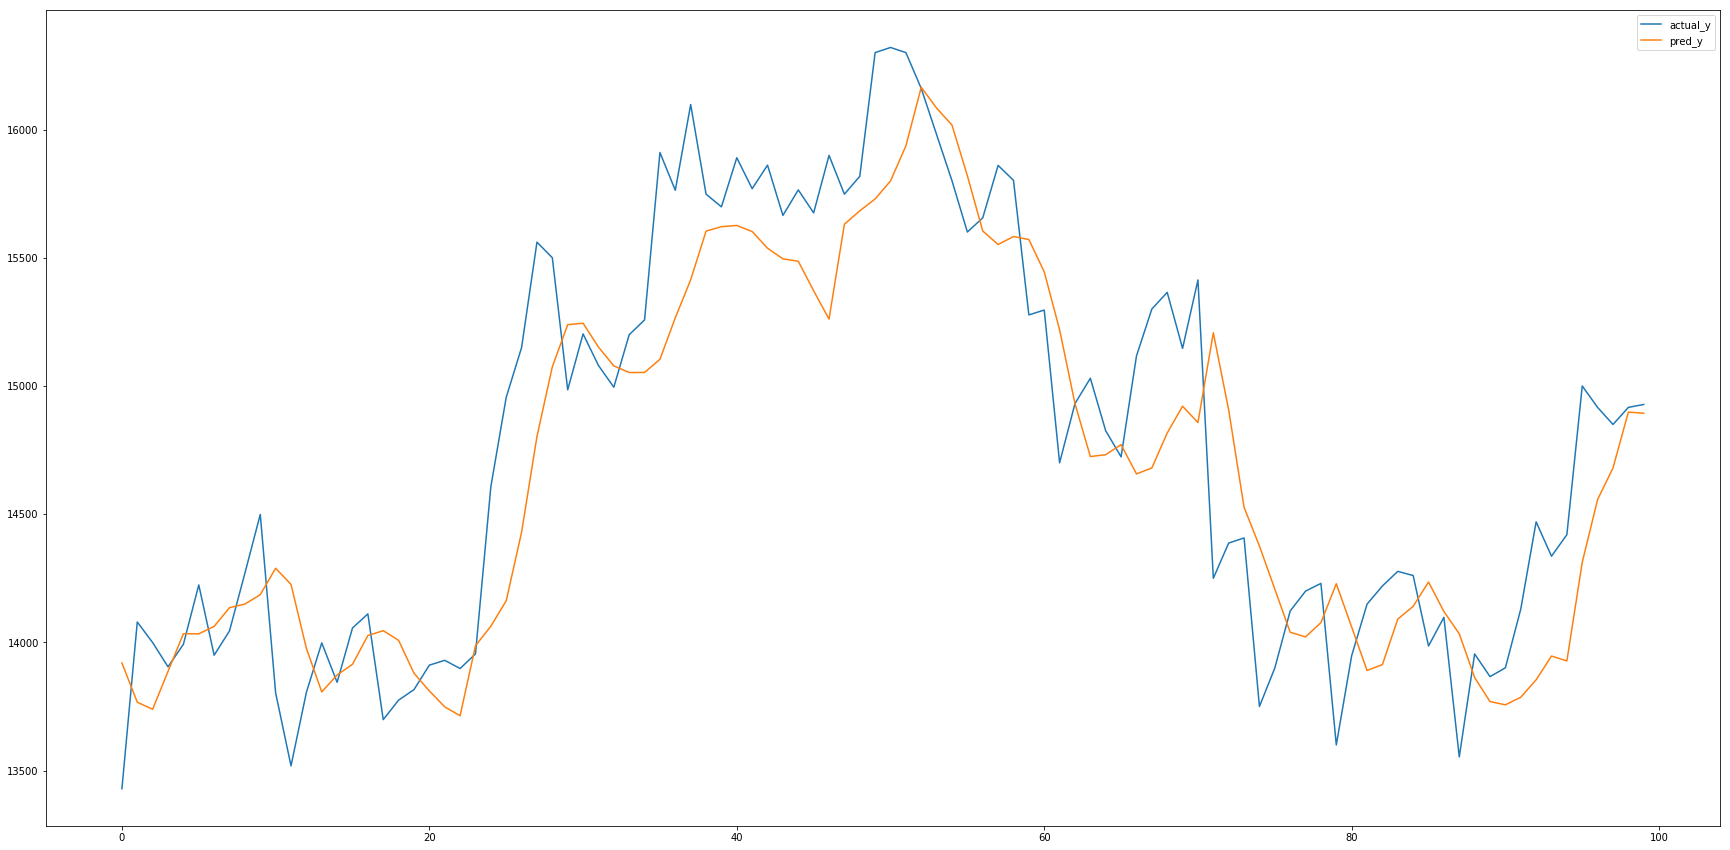

99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 0, 1, 1, 0, 1, 1, 1, 1, 1]
             precision    recall  f1-score   support

          0       0.34      0.40      0.37        40
          1       0.54      0.47      0.50        59

avg / total       0.46      0.44      0.45        99

======= 96 =======





<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_58 (Bidirectio (None, 192)               109056    
_________________________________________________________________
batch_normalization_126 (Bat (None, 192)               768       
_________________________________________________________________
dropout_143 (Dropout)        (None, 192)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 1)                 193       
Total para

Epoch 31/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0182
Epoch 00031: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0195 - val_loss: 0.0020
Epoch 32/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0180
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0193 - val_loss: 0.0010
Epoch 33/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0179
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0192 - val_loss: 0.0017
Epoch 34/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0180
Epoch 00034: val_loss did not improve
27350/27350 [==============================] - 1s 30us/step - loss: 0.0193 - val_loss: 0.0013
Epoch 35/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0178
Epoch 00035: val_loss did not improve
27350/27350 [======

27264/27350 [============================>.] - ETA: 0s - loss: 0.0180
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0193 - val_loss: 0.0076
Epoch 70/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0101
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0193 - val_loss: 0.0156
Epoch 71/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0180
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0192 - val_loss: 0.0062
Epoch 72/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0180
Epoch 00072: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0193 - val_loss: 0.0200
Epoch 73/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0180
Epoch 00073: val_loss did not improve
27350/27350 [===================

27264/27350 [============================>.] - ETA: 0s - loss: 0.0187
Epoch 00107: val_loss did not improve
27350/27350 [==============================] - 1s 30us/step - loss: 0.0199 - val_loss: 0.0035
Epoch 108/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0187
Epoch 00108: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0199 - val_loss: 0.0260
Epoch 109/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0188
Epoch 00109: val_loss did not improve
27350/27350 [==============================] - 1s 30us/step - loss: 0.0200 - val_loss: 0.0017
Epoch 110/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0187
Epoch 00110: val_loss did not improve
27350/27350 [==============================] - 1s 30us/step - loss: 0.0199 - val_loss: 0.0226
Epoch 111/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0188
Epoch 00111: val_loss did not improve
27350/27350 [===============

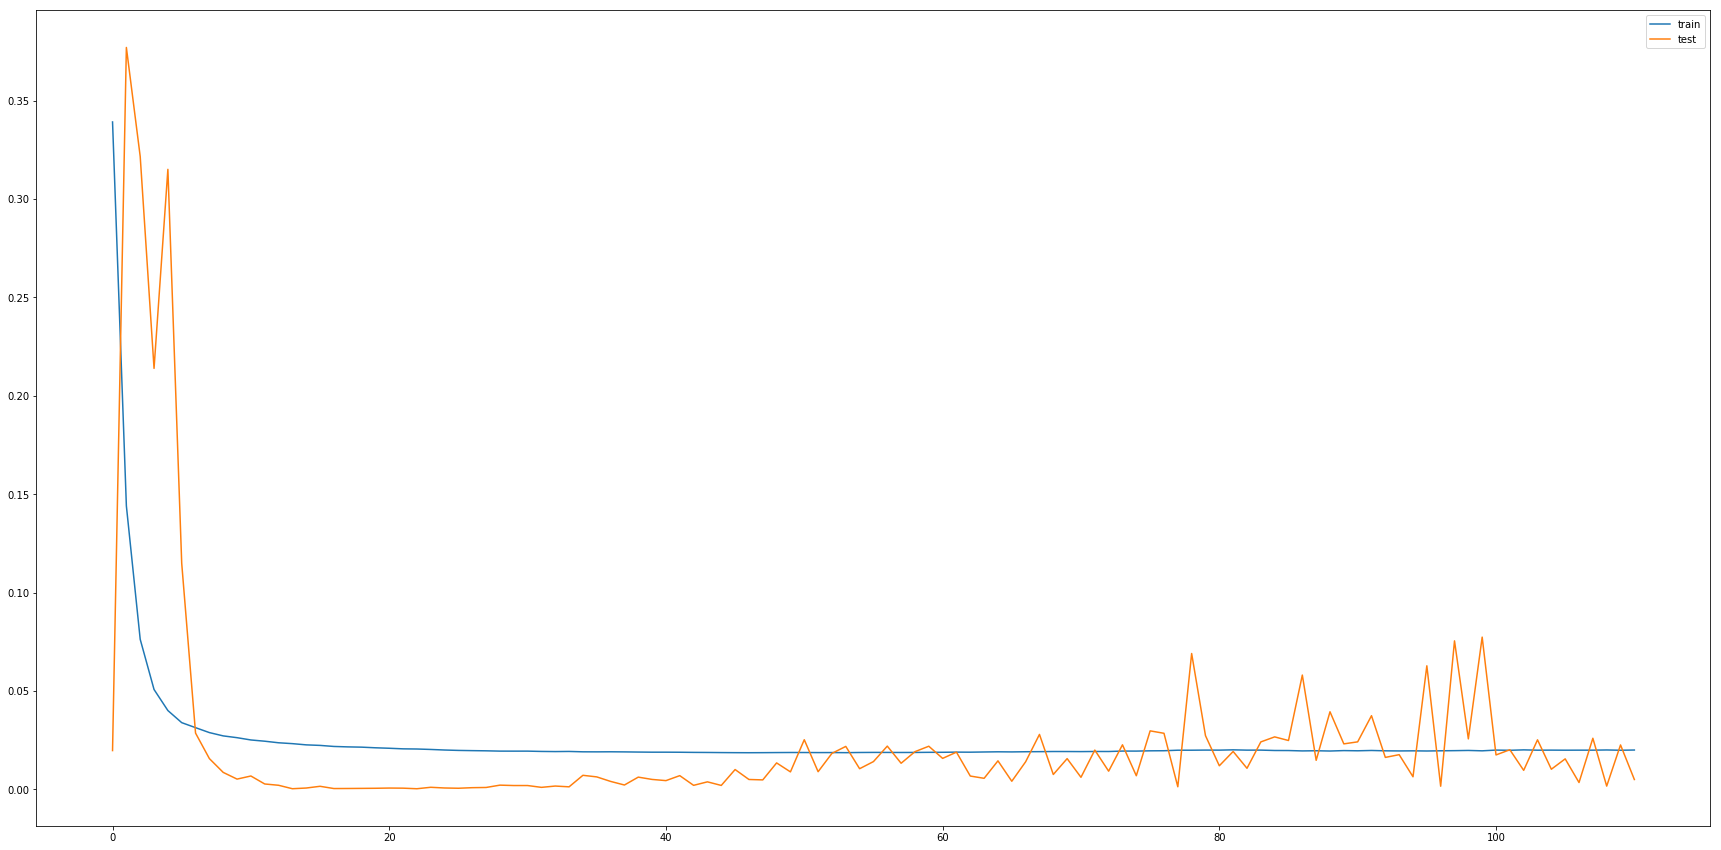

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_59 (Bidirectio (None, 192)               109056    
_________________________________________________________________
batch_normalization_127 (Bat (None, 192)               768       
_________________________________________________________________
dropout_144 (Dropout)        (None, 192)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 1)                 193       
Total params: 110,017
Trainable params: 109,633
Non-trainable params: 384
_________________________________________________________________
None
Test RMSE: 361.969


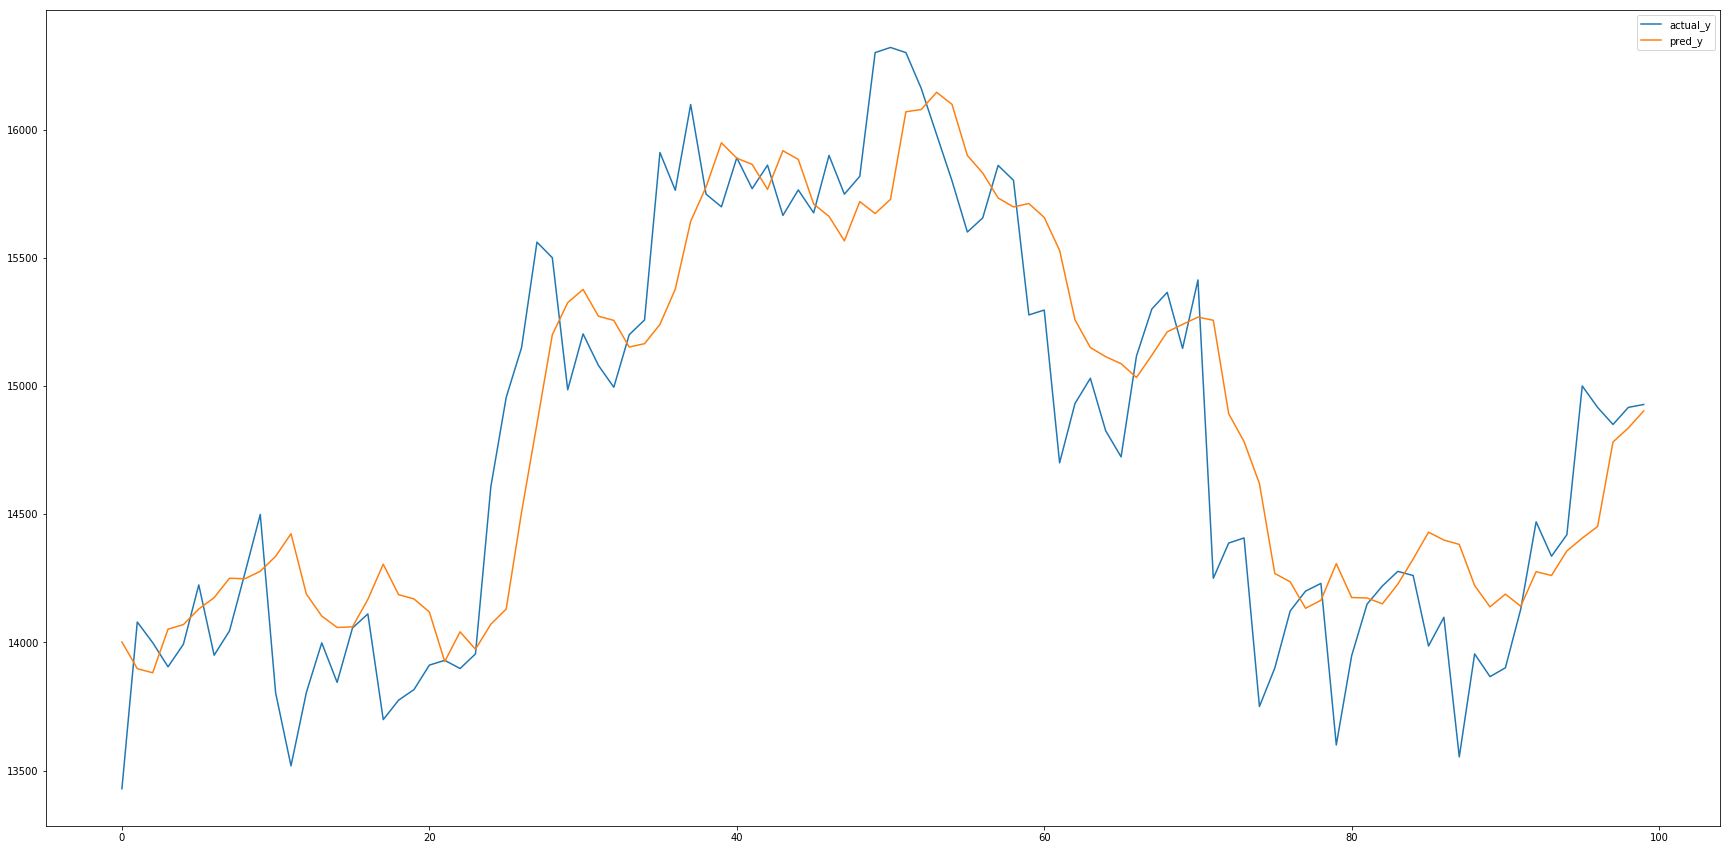

99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 0, 1, 1, 1, 1, 1, 0, 1, 1]
             precision    recall  f1-score   support

          0       0.36      0.45      0.40        40
          1       0.55      0.46      0.50        59

avg / total       0.47      0.45      0.46        99

======= 96 =======





<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_95 (LSTM)               (None, 128)               89088     
_________________________________________________________________
batch_normalization_128 (Bat (None, 128)               512       
_________________________________________________________________
dropout_145 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 129       
Total para

Epoch 32/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0098
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 1s 22us/step - loss: 0.0192 - val_loss: 0.0069
Epoch 33/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0178
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0191 - val_loss: 0.0033
Epoch 34/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0073
Epoch 00034: val_loss did not improve
27350/27350 [==============================] - 1s 22us/step - loss: 0.0190 - val_loss: 0.0073
Epoch 35/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0096
Epoch 00035: val_loss did not improve
27350/27350 [==============================] - 1s 22us/step - loss: 0.0190 - val_loss: 0.0079
Epoch 36/500
25344/27350 [==========================>...] - ETA: 0s - loss: 0.0048
Epoch 00036: val_loss did not improve
27350/27350 [======

Epoch 70/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0178
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0191 - val_loss: 0.1056
Epoch 71/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0099
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0191 - val_loss: 0.0327
Epoch 72/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0065
Epoch 00072: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0192 - val_loss: 0.0260
Epoch 73/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0100
Epoch 00073: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0193 - val_loss: 0.0680
Epoch 74/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0101
Epoch 00074: val_loss did not improve
27350/27350 [======

27264/27350 [============================>.] - ETA: 0s - loss: 0.0179
Epoch 00108: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0192 - val_loss: 0.0632
Epoch 109/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0099
Epoch 00109: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0192 - val_loss: 0.0366
Epoch 110/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0076
Epoch 00110: val_loss did not improve
27350/27350 [==============================] - 1s 22us/step - loss: 0.0192 - val_loss: 0.0867
Epoch 111/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0100
Epoch 00111: val_loss did not improve
27350/27350 [==============================] - 1s 21us/step - loss: 0.0192 - val_loss: 0.0270
Epoch 112/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0181
Epoch 00112: val_loss did not improve
27350/27350 [===============

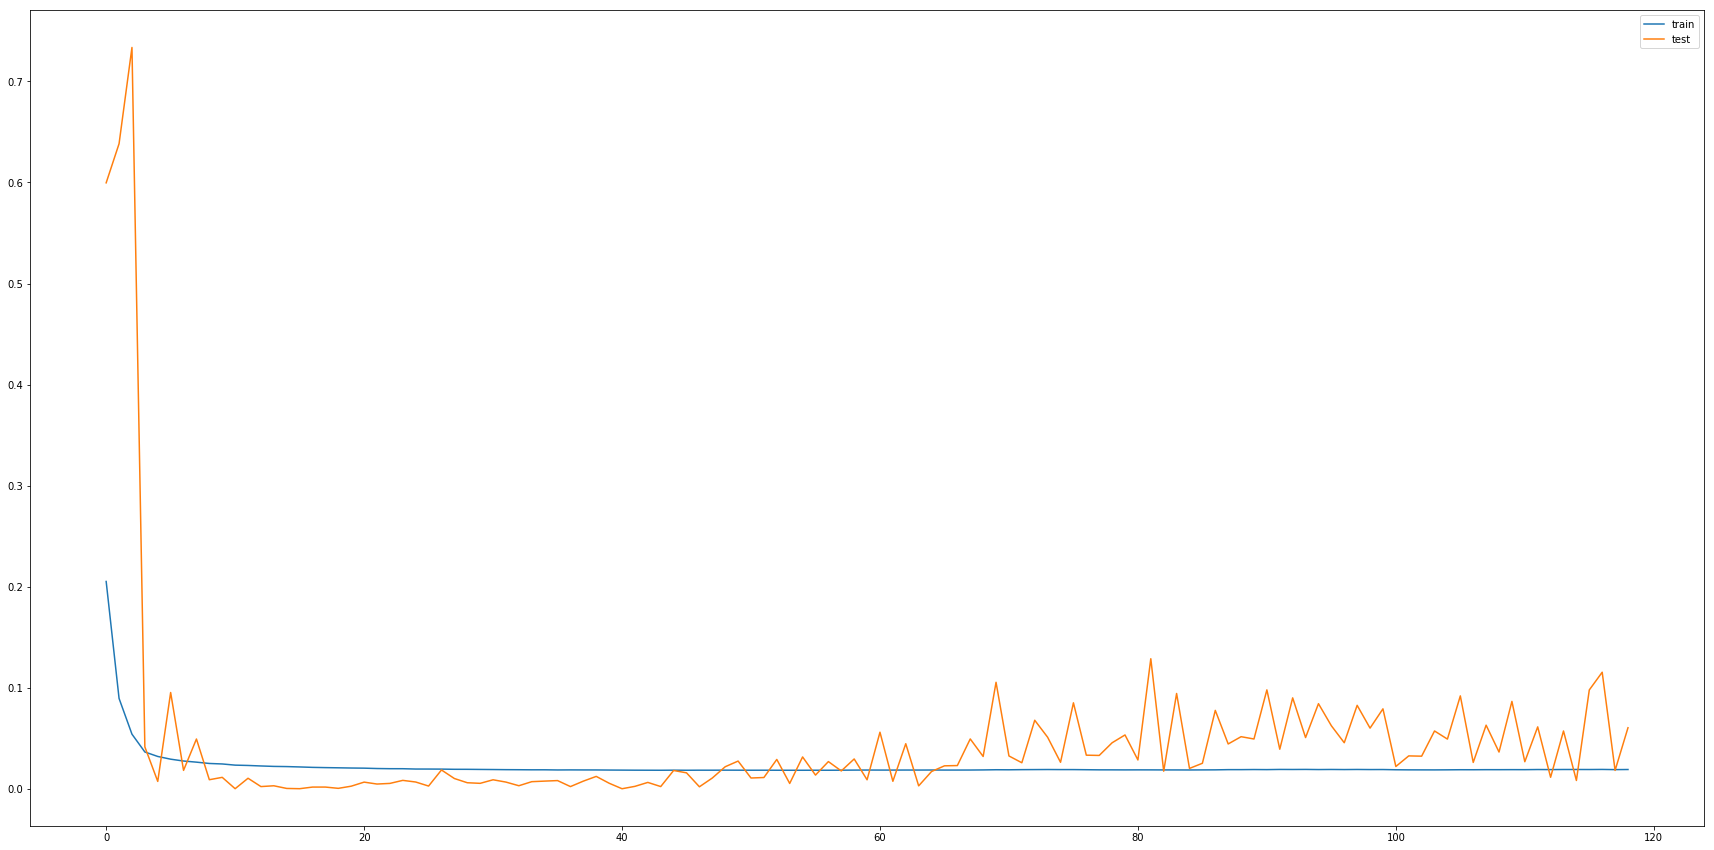

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_96 (LSTM)               (None, 128)               89088     
_________________________________________________________________
batch_normalization_129 (Bat (None, 128)               512       
_________________________________________________________________
dropout_146 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_96 (Dense)             (None, 1)                 129       
Total params: 89,729
Trainable params: 89,473
Non-trainable params: 256
_________________________________________________________________
None
Test RMSE: 346.769


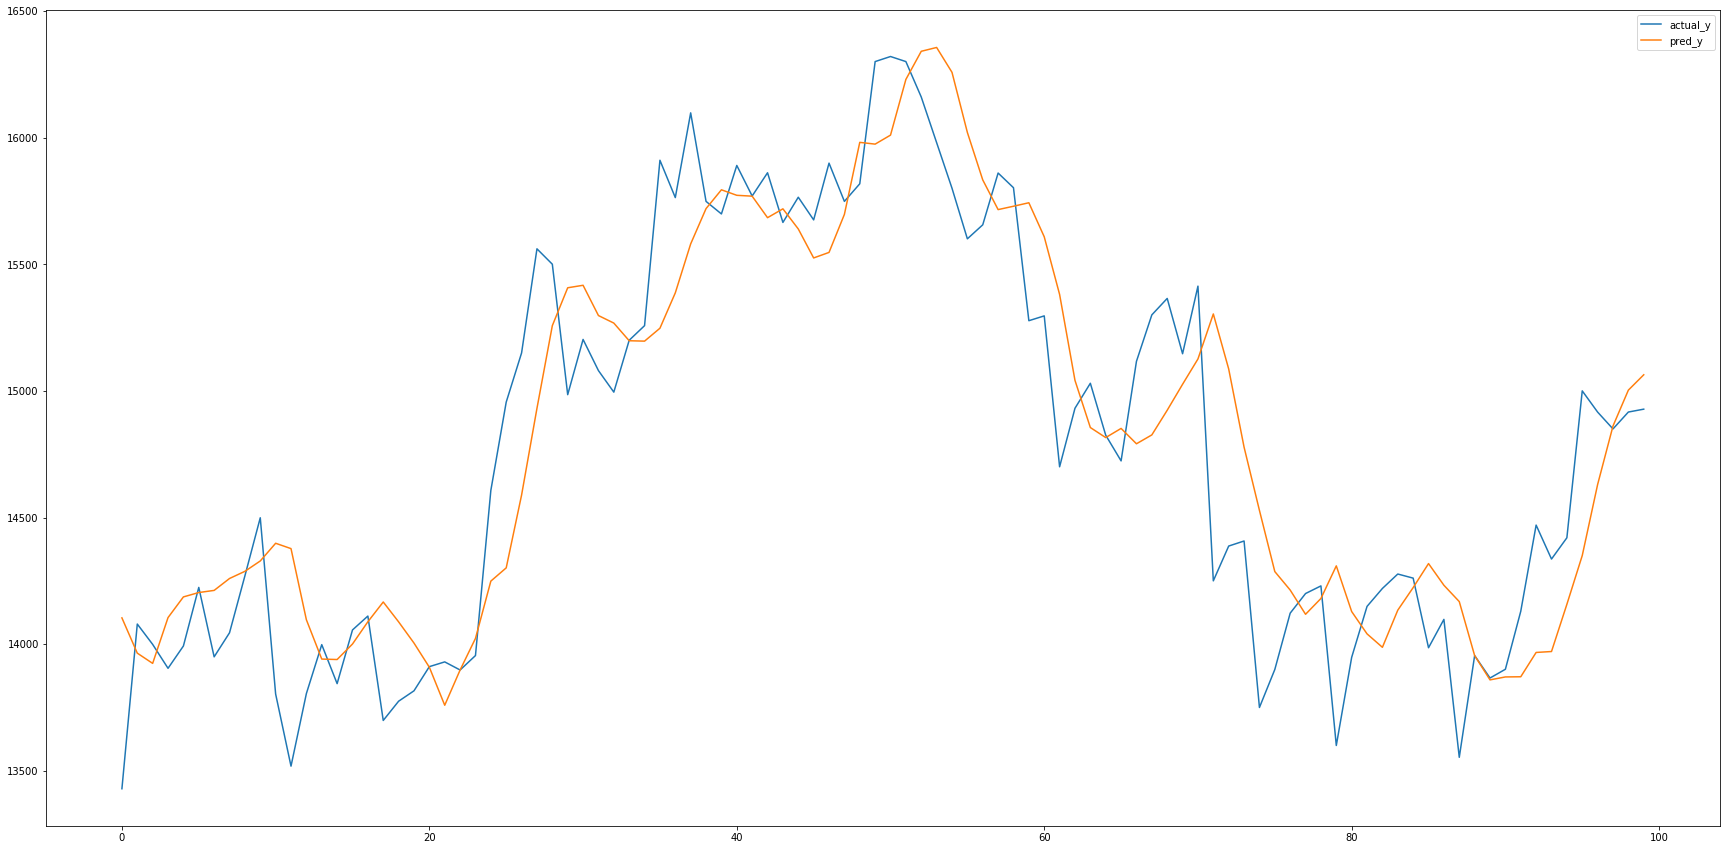

99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
             precision    recall  f1-score   support

          0       0.33      0.35      0.34        40
          1       0.54      0.51      0.52        59

avg / total       0.45      0.44      0.45        99

======= 128 =======





<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_60 (Bidirectio (None, 256)               178176    
_________________________________________________________________
batch_normalization_130 (Bat (None, 256)               1024      
_________________________________________________________________
dropout_147 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 1)                 257       
Total par

27264/27350 [============================>.] - ETA: 0s - loss: 0.0183
Epoch 00031: val_loss did not improve
27350/27350 [==============================] - 1s 30us/step - loss: 0.0196 - val_loss: 0.0053
Epoch 32/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0183
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 1s 30us/step - loss: 0.0196 - val_loss: 3.6445e-04
Epoch 33/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0101
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 1s 31us/step - loss: 0.0194 - val_loss: 0.0030
Epoch 34/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0182
Epoch 00034: val_loss did not improve
27350/27350 [==============================] - 1s 30us/step - loss: 0.0195 - val_loss: 0.0040
Epoch 35/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0099
Epoch 00035: val_loss did not improve
27350/27350 [===============

Epoch 69/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0062
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0194 - val_loss: 0.0111
Epoch 70/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0184
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 1s 30us/step - loss: 0.0196 - val_loss: 0.0038
Epoch 71/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0184
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 1s 30us/step - loss: 0.0196 - val_loss: 0.0115
Epoch 72/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0185
Epoch 00072: val_loss did not improve
27350/27350 [==============================] - 1s 30us/step - loss: 0.0197 - val_loss: 0.0032
Epoch 73/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0185
Epoch 00073: val_loss did not improve
27350/27350 [======

27264/27350 [============================>.] - ETA: 0s - loss: 0.0187
Epoch 00107: val_loss did not improve
27350/27350 [==============================] - 1s 30us/step - loss: 0.0200 - val_loss: 0.0794
Epoch 108/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0192
Epoch 00108: val_loss did not improve
27350/27350 [==============================] - 1s 30us/step - loss: 0.0204 - val_loss: 0.0225
Epoch 109/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0187
Epoch 00109: val_loss did not improve
27350/27350 [==============================] - 1s 30us/step - loss: 0.0199 - val_loss: 0.1266
Epoch 110/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0191
Epoch 00110: val_loss did not improve
27350/27350 [==============================] - 1s 30us/step - loss: 0.0203 - val_loss: 0.0019
Epoch 111/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0190
Epoch 00111: val_loss did not improve
27350/27350 [===============

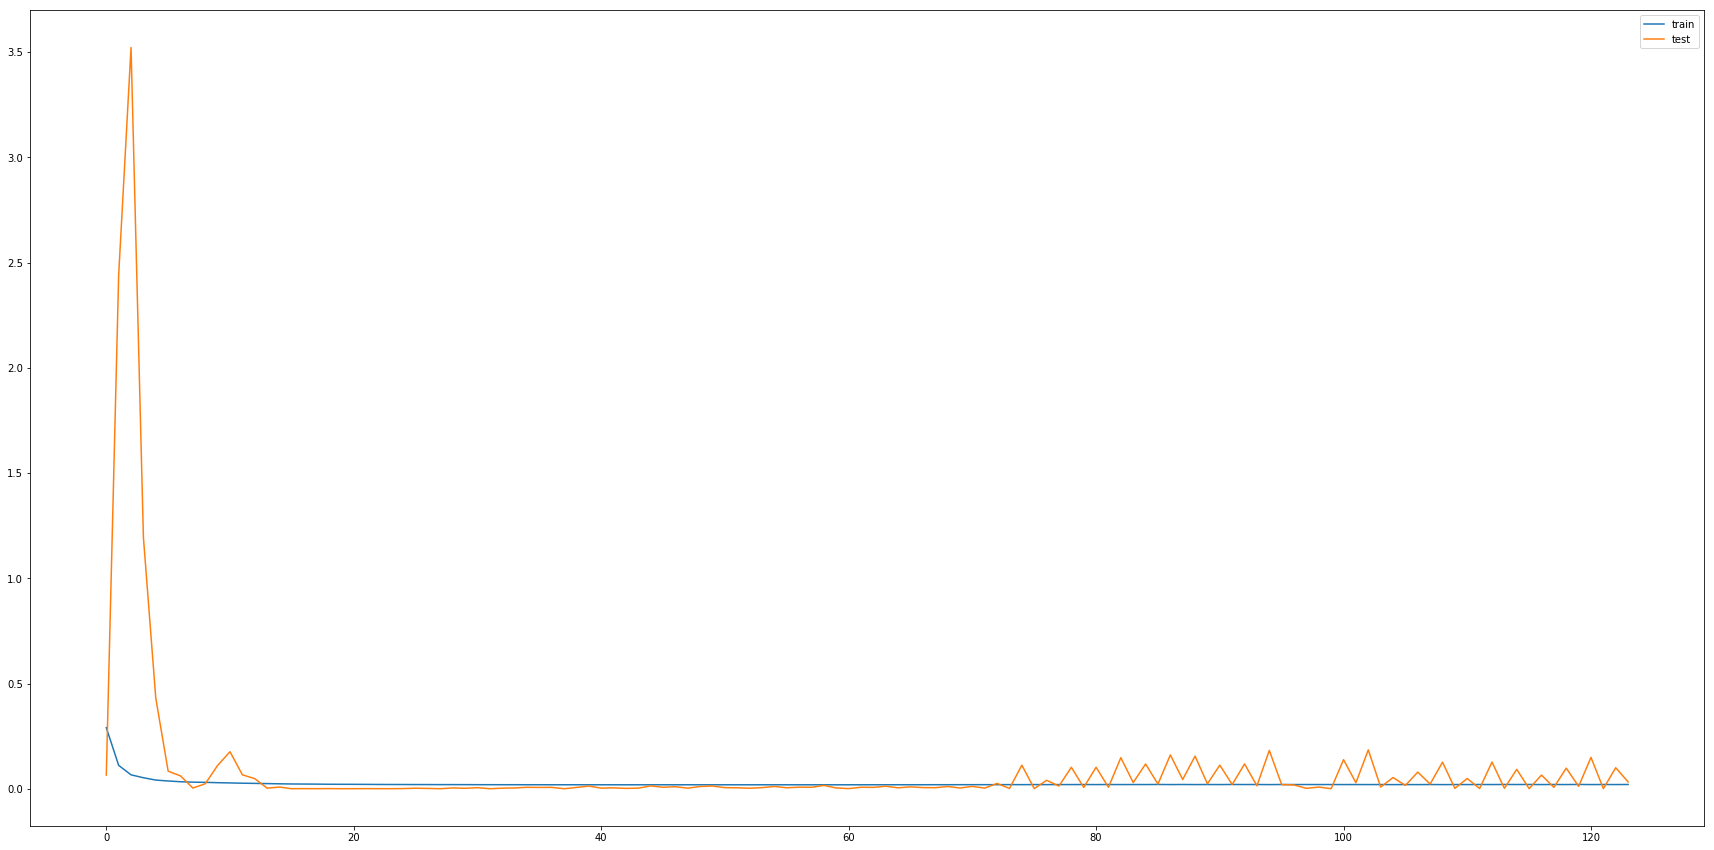

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_61 (Bidirectio (None, 256)               178176    
_________________________________________________________________
batch_normalization_131 (Bat (None, 256)               1024      
_________________________________________________________________
dropout_148 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 257       
Total params: 179,457
Trainable params: 178,945
Non-trainable params: 512
_________________________________________________________________
None
Test RMSE: 365.421


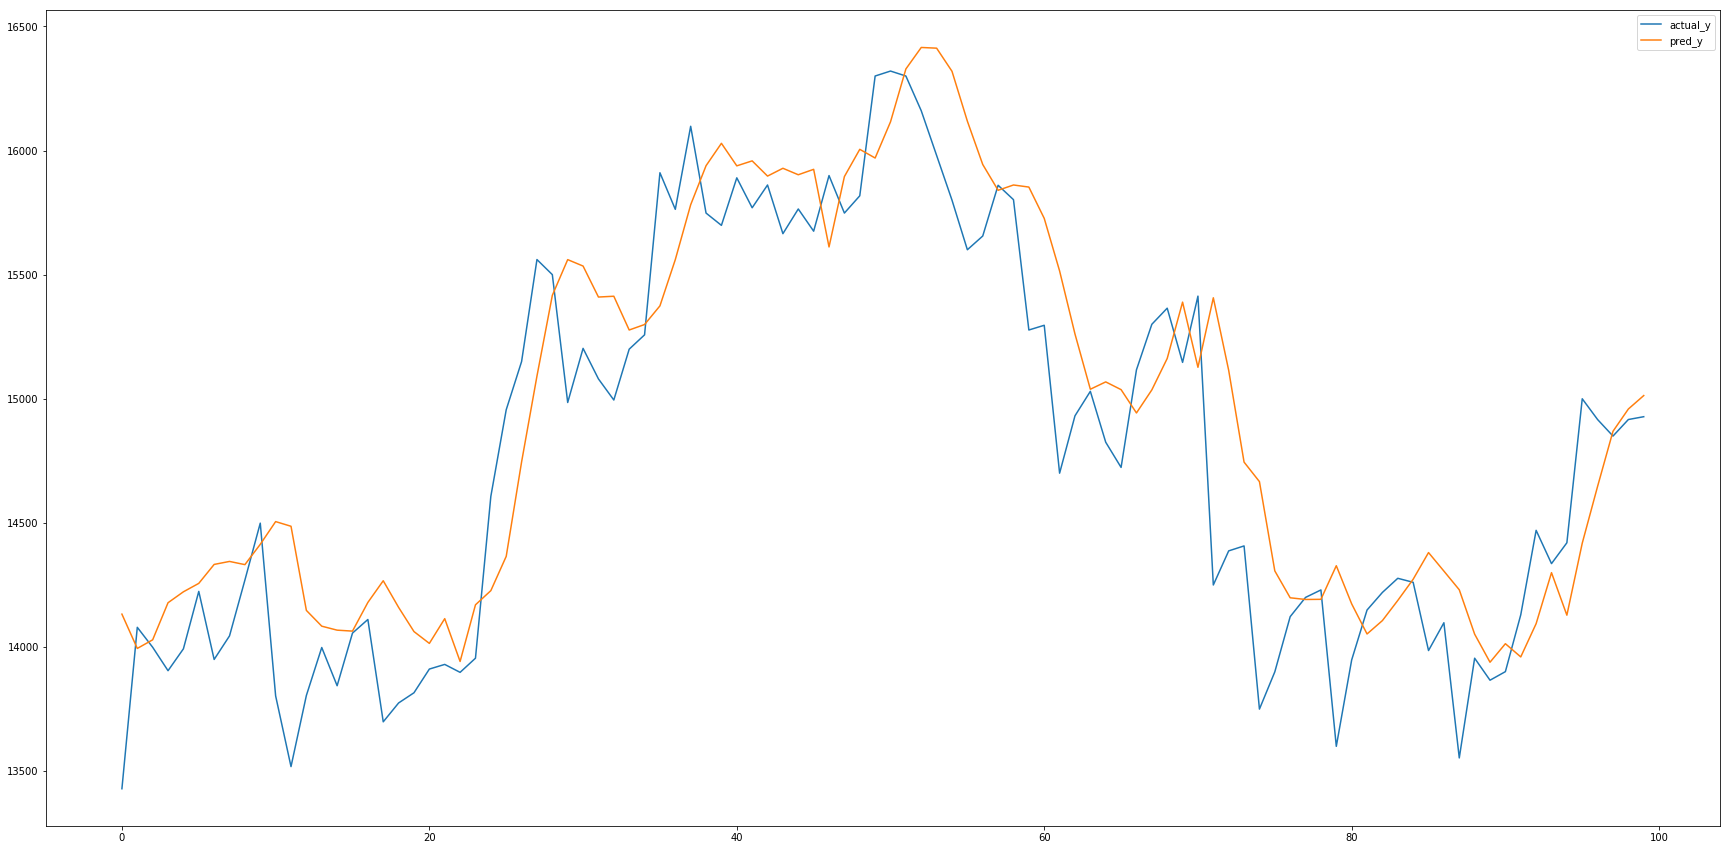

99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 1, 1, 1, 1, 1, 1, 0, 1, 1]
             precision    recall  f1-score   support

          0       0.28      0.33      0.30        40
          1       0.49      0.44      0.46        59

avg / total       0.41      0.39      0.40        99

======= 128 =======





<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_99 (LSTM)               (None, 196)               189728    
_________________________________________________________________
batch_normalization_132 (Bat (None, 196)               784       
_________________________________________________________________
dropout_149 (Dropout)        (None, 196)               0         
_________________________________________________________________
dense_99 (Dense)             (None, 1)                 197       
Total par

Epoch 30/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0054
Epoch 00030: val_loss did not improve
27350/27350 [==============================] - 1s 23us/step - loss: 0.0192 - val_loss: 0.0042
Epoch 31/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0054
Epoch 00031: val_loss did not improve
27350/27350 [==============================] - 1s 23us/step - loss: 0.0192 - val_loss: 0.0055
Epoch 32/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0053
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 1s 23us/step - loss: 0.0190 - val_loss: 0.0078
Epoch 33/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0053
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 1s 22us/step - loss: 0.0190 - val_loss: 8.6582e-04
Epoch 34/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0053
Epoch 00034: val_loss did not improve
27350/27350 [==

Epoch 68/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0060
Epoch 00068: val_loss did not improve
27350/27350 [==============================] - 1s 23us/step - loss: 0.0194 - val_loss: 0.0194
Epoch 69/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0061
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 1s 23us/step - loss: 0.0194 - val_loss: 0.0016
Epoch 70/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0061
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 1s 23us/step - loss: 0.0195 - val_loss: 0.0496
Epoch 71/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0062
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 1s 23us/step - loss: 0.0196 - val_loss: 0.0027
Epoch 72/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0063
Epoch 00072: val_loss did not improve
27350/27350 [======

Epoch 106/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0068
Epoch 00106: val_loss did not improve
27350/27350 [==============================] - 1s 23us/step - loss: 0.0200 - val_loss: 0.0217
Epoch 107/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0067
Epoch 00107: val_loss did not improve
27350/27350 [==============================] - 1s 23us/step - loss: 0.0199 - val_loss: 0.0036
Epoch 00107: early stopping


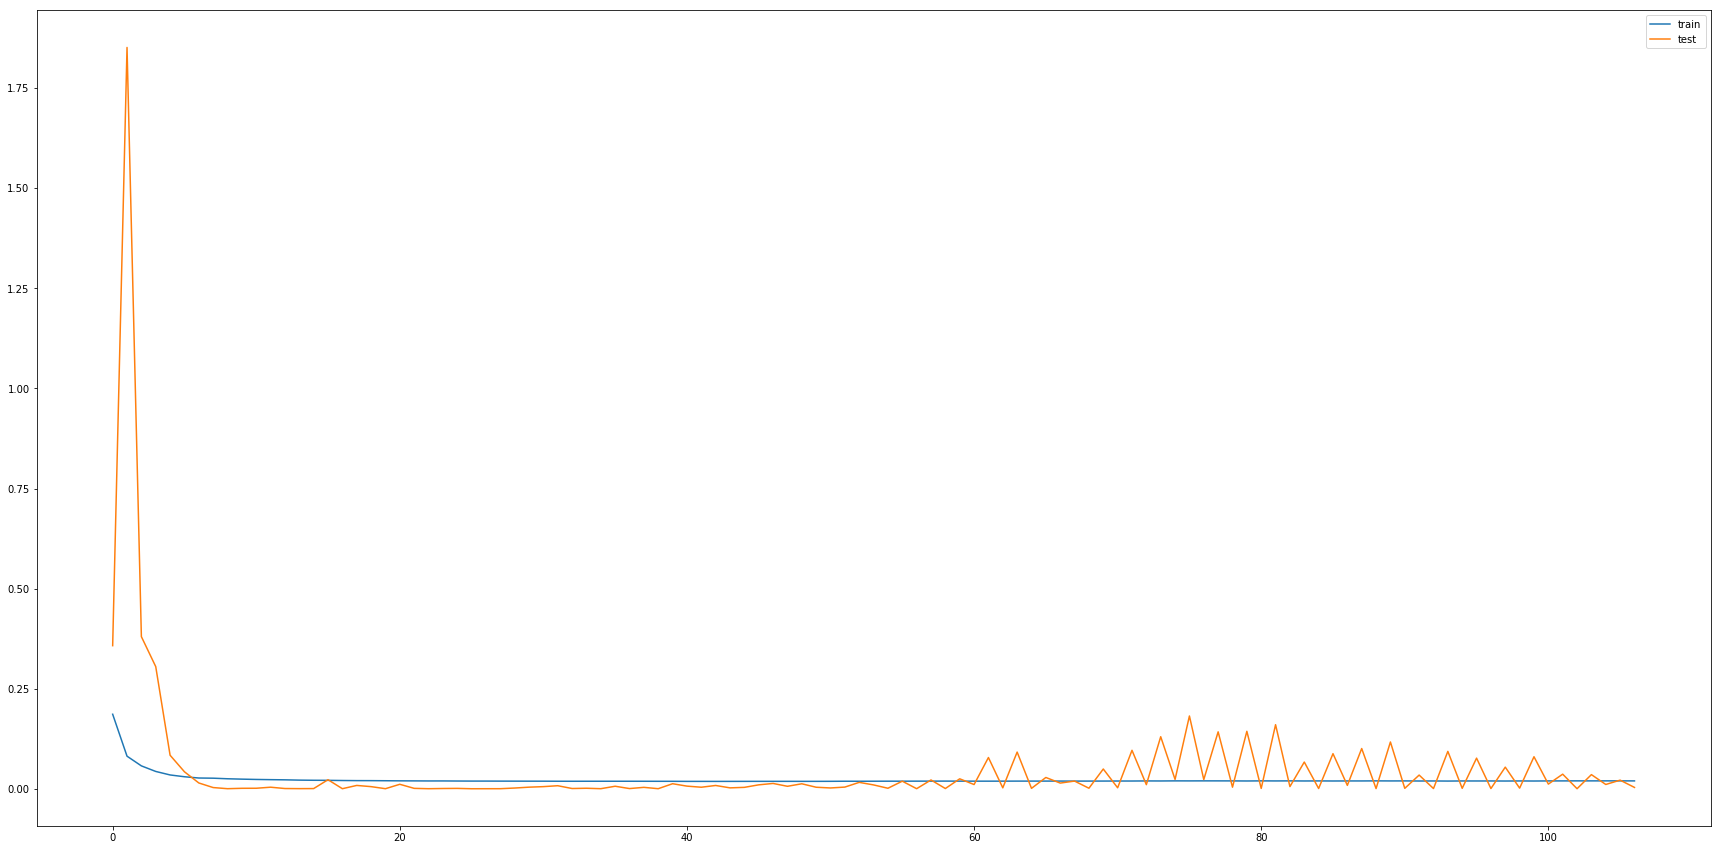

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_100 (LSTM)              (None, 196)               189728    
_________________________________________________________________
batch_normalization_133 (Bat (None, 196)               784       
_________________________________________________________________
dropout_150 (Dropout)        (None, 196)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 1)                 197       
Total params: 190,709
Trainable params: 190,317
Non-trainable params: 392
_________________________________________________________________
None
Test RMSE: 340.554


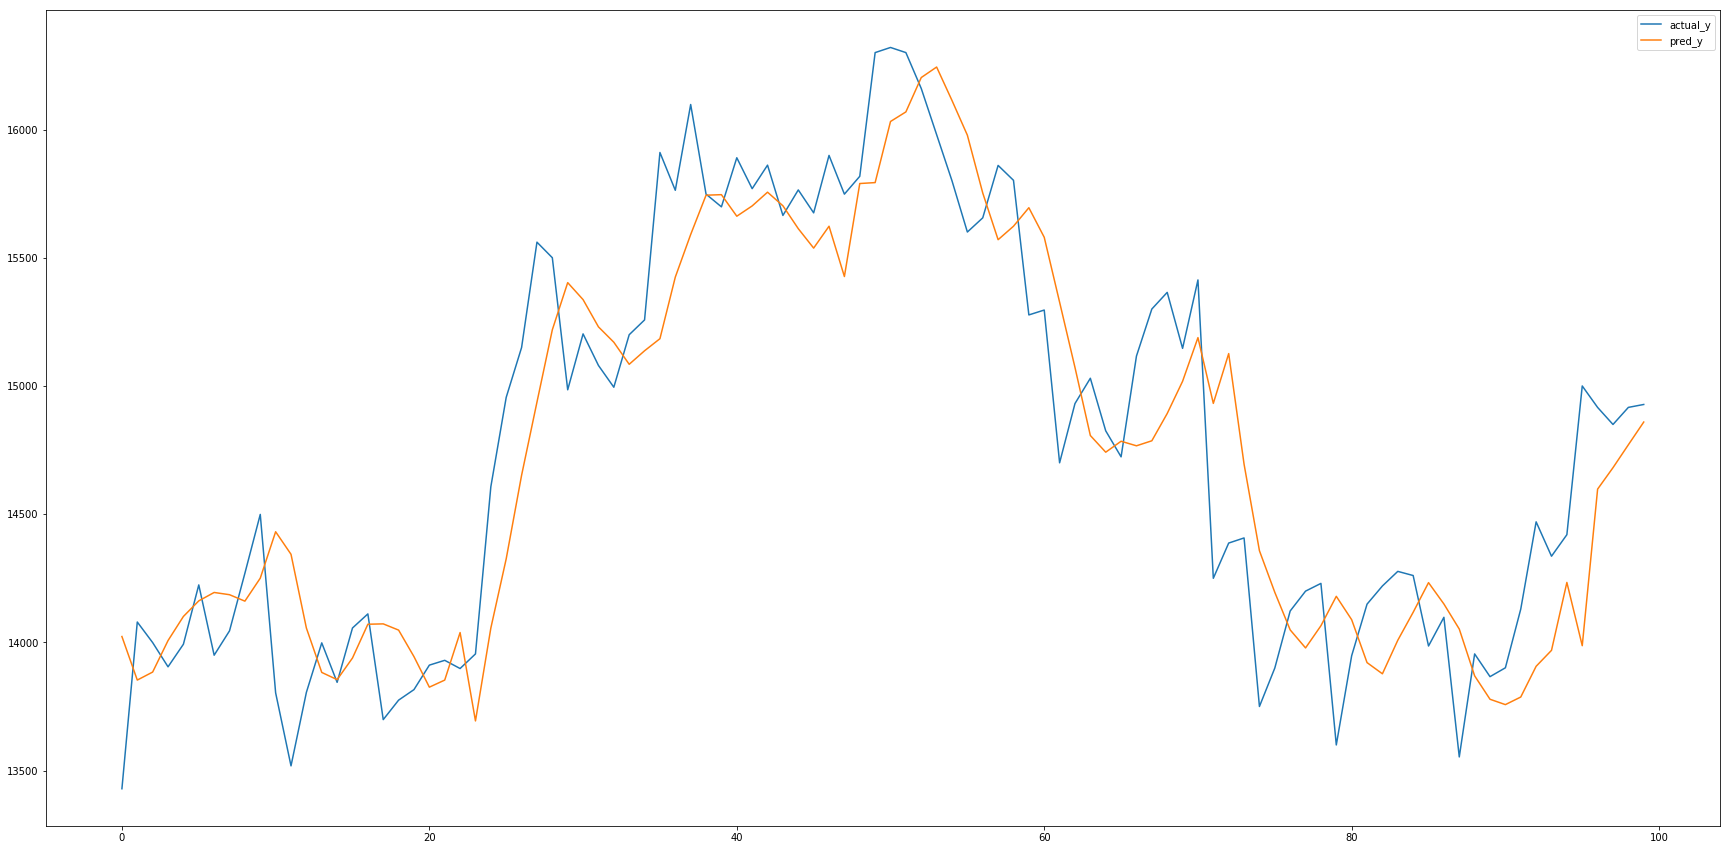

99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 1, 1, 1, 1, 1, 0, 0, 1, 1]
             precision    recall  f1-score   support

          0       0.33      0.38      0.35        40
          1       0.54      0.49      0.51        59

avg / total       0.45      0.44      0.45        99

======= 196 =======





<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_62 (Bidirectio (None, 392)               379456    
_________________________________________________________________
batch_normalization_134 (Bat (None, 392)               1568      
_________________________________________________________________
dropout_151 (Dropout)        (None, 392)               0         
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 393       
Total par

Epoch 31/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0080
Epoch 00031: val_loss did not improve
27350/27350 [==============================] - 1s 32us/step - loss: 0.0197 - val_loss: 6.2632e-04
Epoch 32/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0102
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 1s 32us/step - loss: 0.0196 - val_loss: 0.0020
Epoch 33/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0182
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0194 - val_loss: 0.0010
Epoch 34/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0182
Epoch 00034: val_loss did not improve
27350/27350 [==============================] - 1s 32us/step - loss: 0.0194 - val_loss: 0.0013
Epoch 35/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0066
Epoch 00035: val_loss did not improve
27350/27350 [==

Epoch 69/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0091
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0194 - val_loss: 0.0065
Epoch 70/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0083
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 1s 32us/step - loss: 0.0203 - val_loss: 0.0087
Epoch 71/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0087
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 1s 33us/step - loss: 0.0199 - val_loss: 0.0211
Epoch 72/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0101
Epoch 00072: val_loss did not improve
27350/27350 [==============================] - 1s 32us/step - loss: 0.0204 - val_loss: 0.0125
Epoch 73/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0118
Epoch 00073: val_loss did not improve
27350/27350 [======

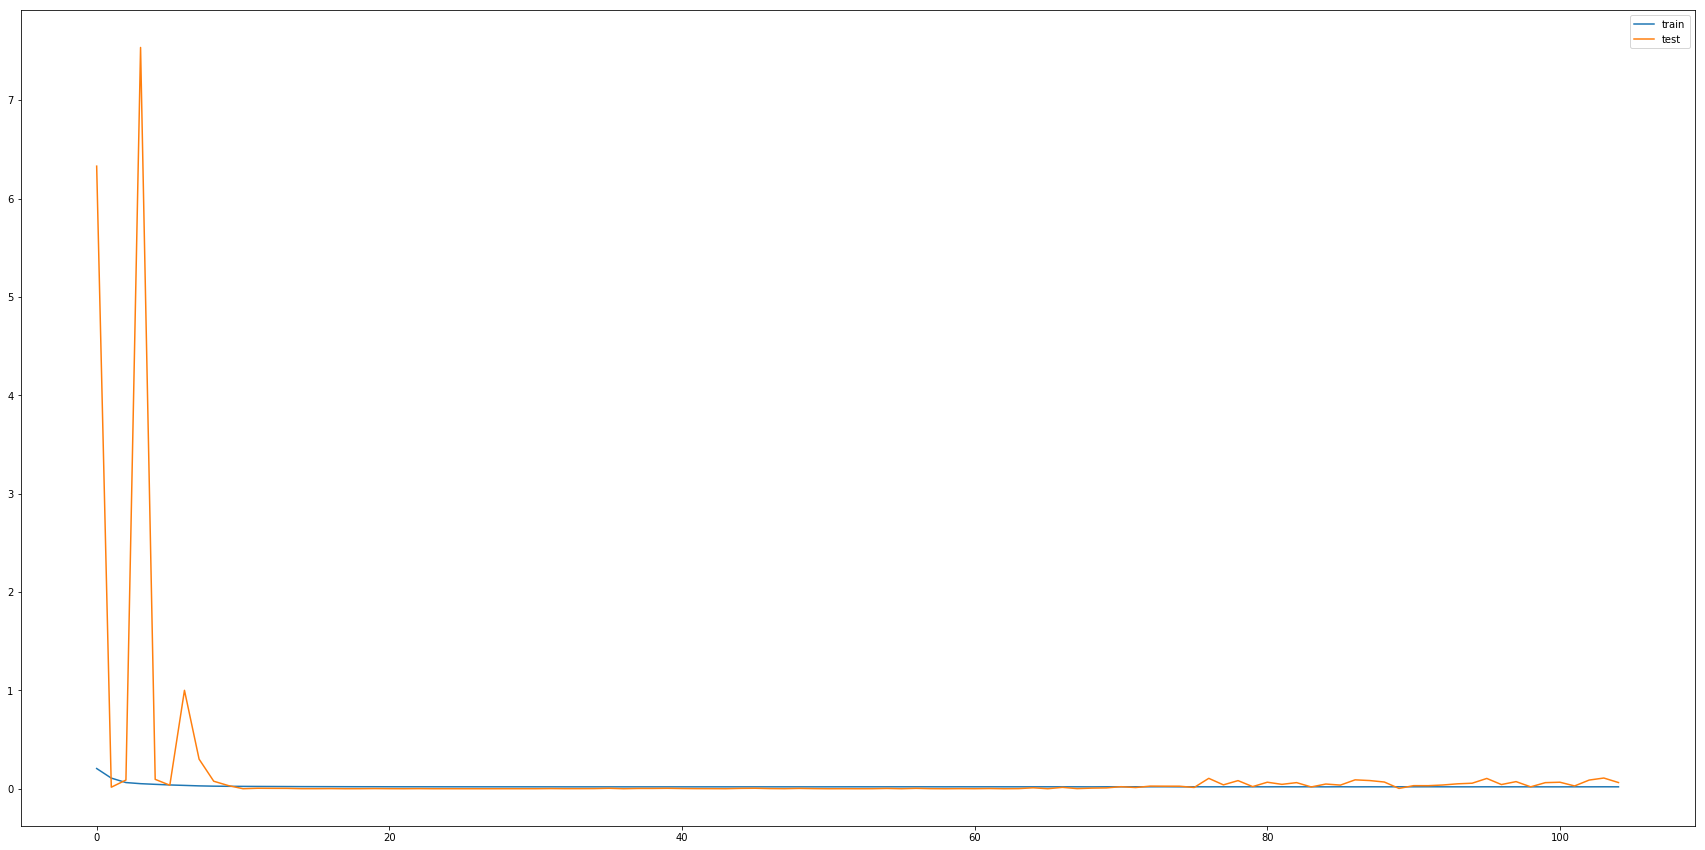

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_63 (Bidirectio (None, 392)               379456    
_________________________________________________________________
batch_normalization_135 (Bat (None, 392)               1568      
_________________________________________________________________
dropout_152 (Dropout)        (None, 392)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 1)                 393       
Total params: 381,417
Trainable params: 380,633
Non-trainable params: 784
_________________________________________________________________
None
Test RMSE: 346.636


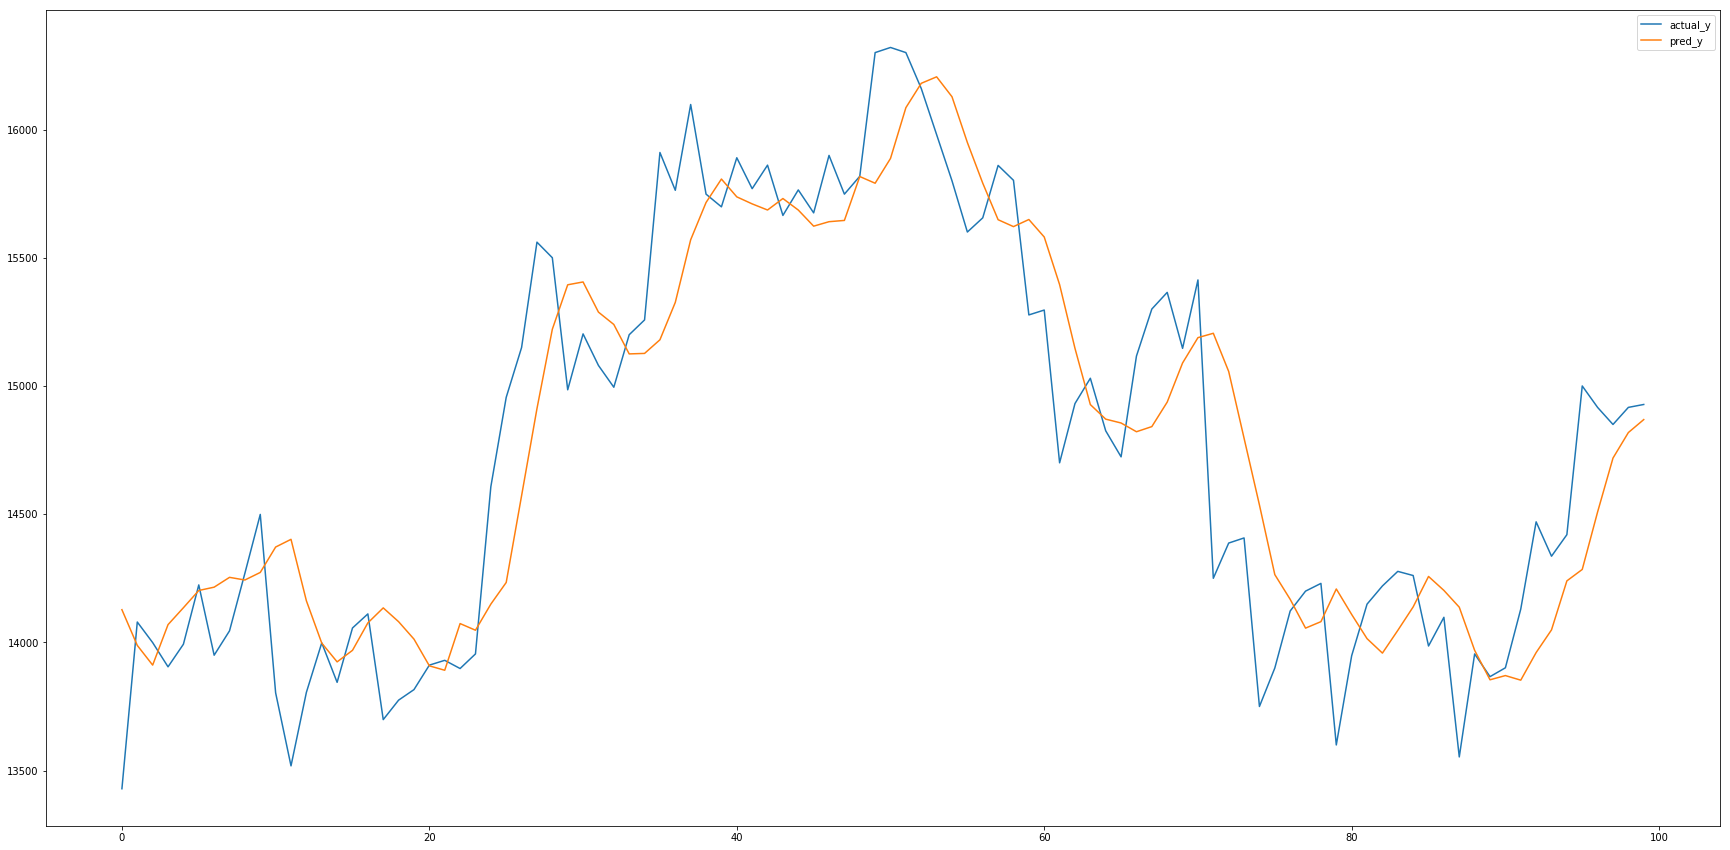

99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 0, 1, 1, 1, 1, 1, 0, 1, 1]
             precision    recall  f1-score   support

          0       0.33      0.38      0.35        40
          1       0.53      0.47      0.50        59

avg / total       0.45      0.43      0.44        99

======= 196 =======





<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_103 (LSTM)              (None, 256)               309248    
_________________________________________________________________
batch_normalization_136 (Bat (None, 256)               1024      
_________________________________________________________________
dropout_153 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 257       
Total par

Epoch 31/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0055
Epoch 00031: val_loss did not improve
27350/27350 [==============================] - 1s 23us/step - loss: 0.0192 - val_loss: 0.0016
Epoch 32/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0055
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 1s 23us/step - loss: 0.0192 - val_loss: 0.0060
Epoch 33/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0055
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 1s 24us/step - loss: 0.0192 - val_loss: 3.1184e-04
Epoch 34/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0055
Epoch 00034: val_loss did not improve
27350/27350 [==============================] - 1s 23us/step - loss: 0.0192 - val_loss: 6.7435e-04
Epoch 35/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0055
Epoch 00035: val_loss did not improve
27350/27350

Epoch 69/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0068
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 1s 23us/step - loss: 0.0199 - val_loss: 0.0284
Epoch 70/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0067
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 1s 24us/step - loss: 0.0197 - val_loss: 0.0891
Epoch 71/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0070
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 1s 23us/step - loss: 0.0199 - val_loss: 0.0184
Epoch 72/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0070
Epoch 00072: val_loss did not improve
27350/27350 [==============================] - 1s 23us/step - loss: 0.0198 - val_loss: 0.0836
Epoch 73/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0074
Epoch 00073: val_loss did not improve
27350/27350 [======

25728/27350 [===========================>..] - ETA: 0s - loss: 0.0074
Epoch 00107: val_loss did not improve
27350/27350 [==============================] - 1s 23us/step - loss: 0.0204 - val_loss: 0.0417
Epoch 108/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0073
Epoch 00108: val_loss did not improve
27350/27350 [==============================] - 1s 23us/step - loss: 0.0202 - val_loss: 0.1999
Epoch 109/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0074
Epoch 00109: val_loss did not improve
27350/27350 [==============================] - 1s 23us/step - loss: 0.0203 - val_loss: 0.0813
Epoch 00109: early stopping


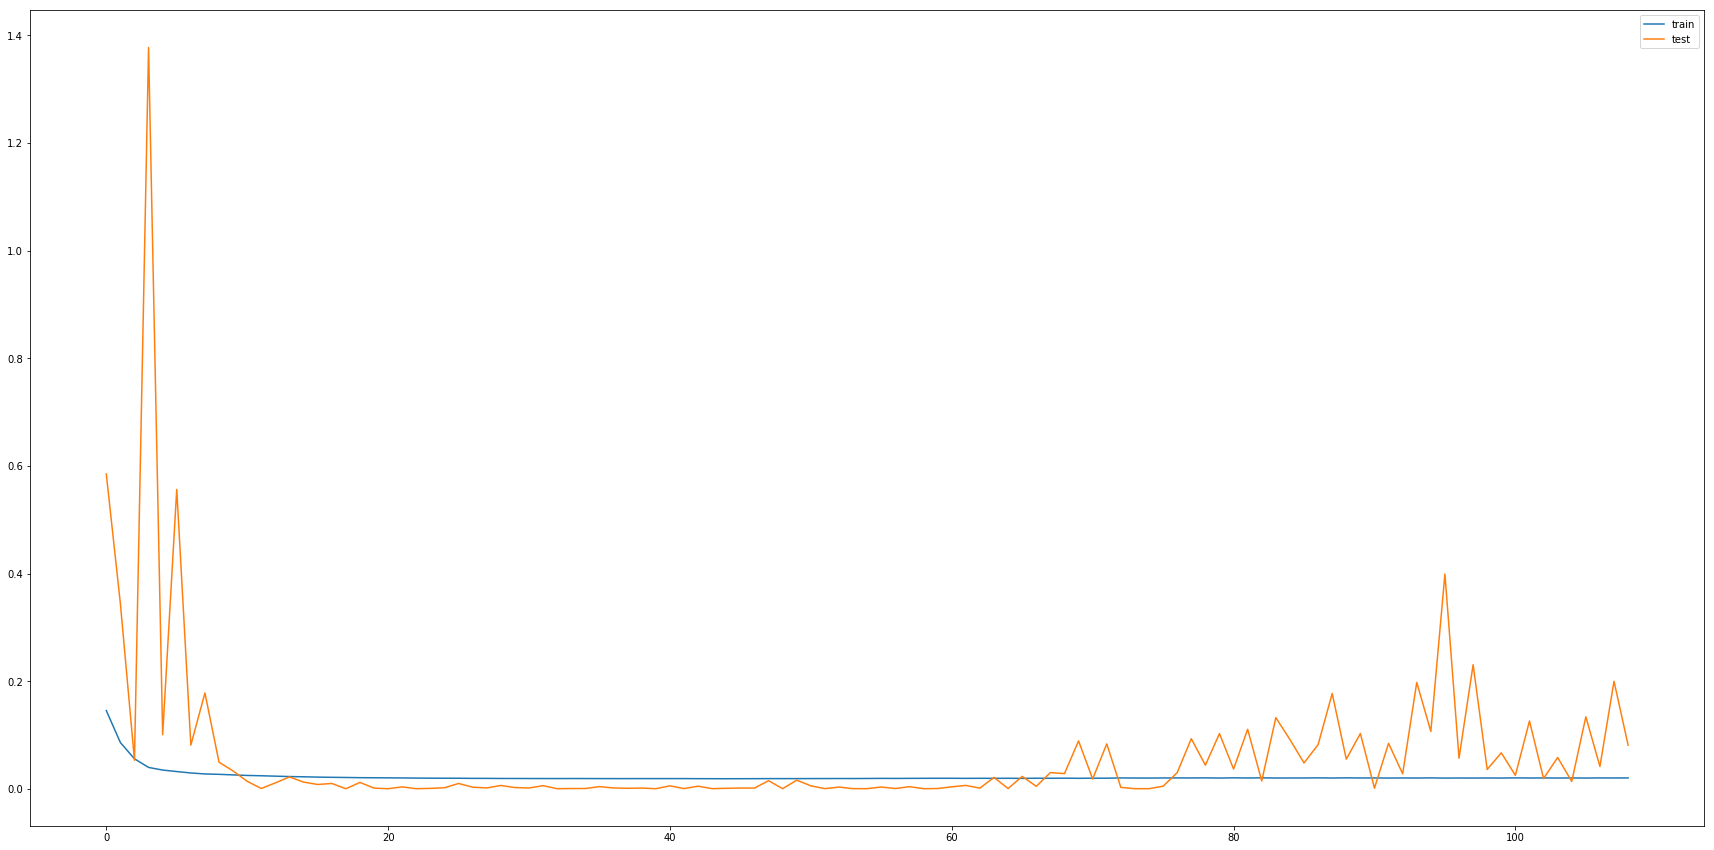

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_104 (LSTM)              (None, 256)               309248    
_________________________________________________________________
batch_normalization_137 (Bat (None, 256)               1024      
_________________________________________________________________
dropout_154 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 257       
Total params: 310,529
Trainable params: 310,017
Non-trainable params: 512
_________________________________________________________________
None
Test RMSE: 322.022


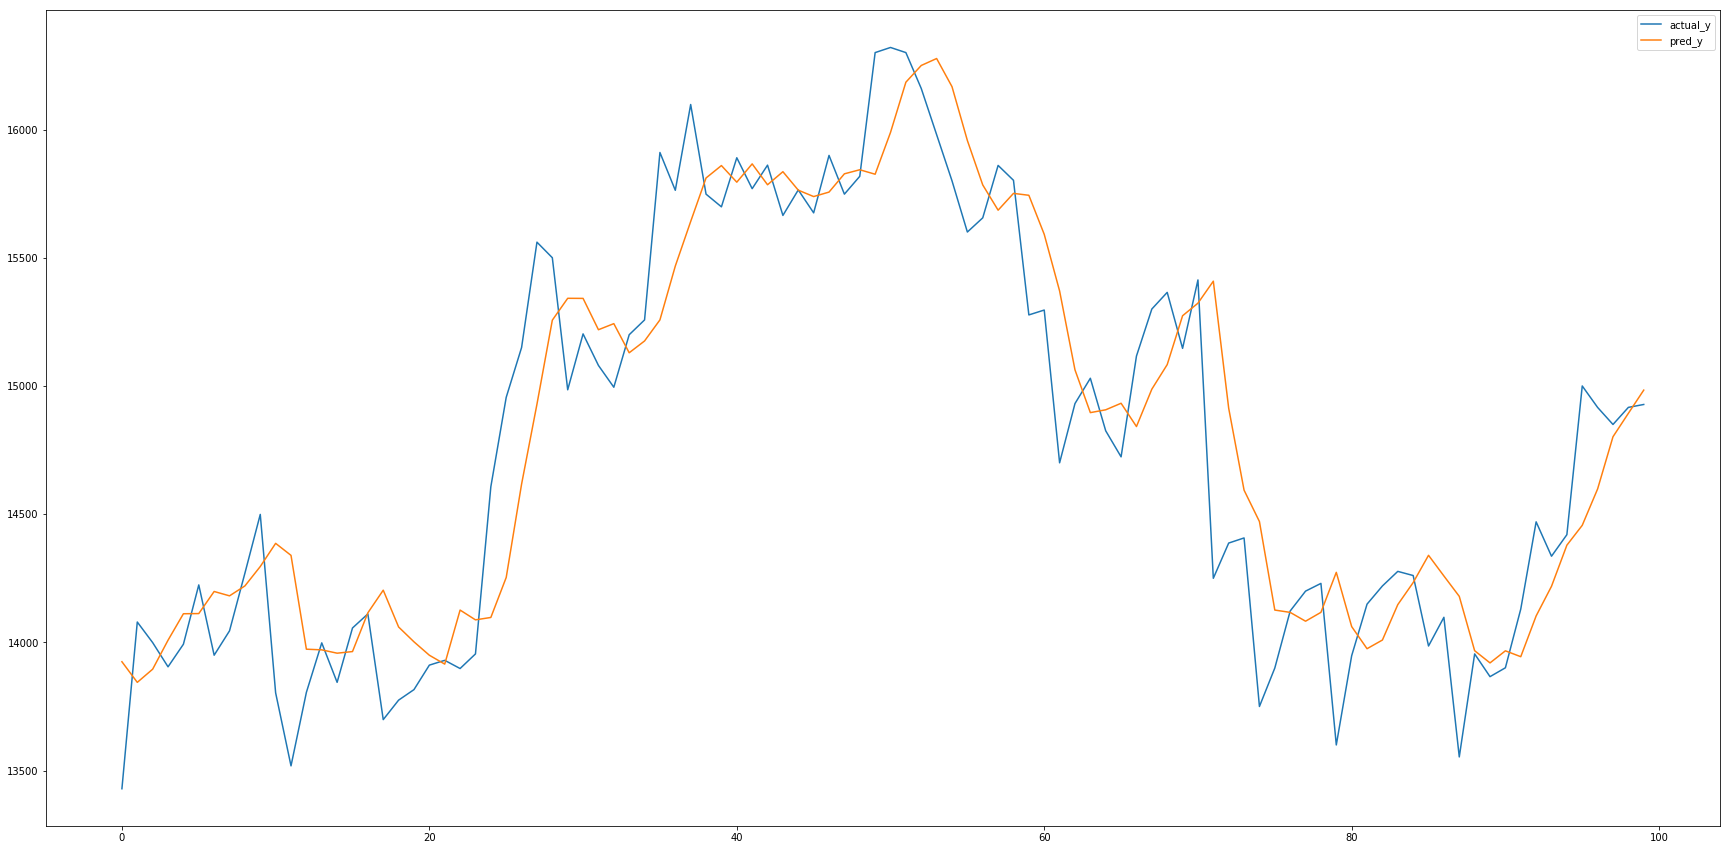

99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 1, 1, 1, 1, 1, 0, 1, 1, 1]
             precision    recall  f1-score   support

          0       0.26      0.28      0.27        40
          1       0.49      0.47      0.48        59

avg / total       0.40      0.39      0.40        99

======= 256 =======





<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_64 (Bidirectio (None, 512)               618496    
_________________________________________________________________
batch_normalization_138 (Bat (None, 512)               2048      
_________________________________________________________________
dropout_155 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_105 (Dense)            (None, 1)                 513       
Total par

Epoch 30/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0083
Epoch 00030: val_loss did not improve
27350/27350 [==============================] - 1s 35us/step - loss: 0.0200 - val_loss: 0.0033
Epoch 31/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0082
Epoch 00031: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0199 - val_loss: 0.0018
Epoch 32/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0081
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0198 - val_loss: 3.3760e-04
Epoch 33/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0080
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0197 - val_loss: 3.5322e-04
Epoch 34/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0081
Epoch 00034: val_loss did not improve
27350/27350

Epoch 68/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0094
Epoch 00068: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0198 - val_loss: 8.5118e-04
Epoch 69/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0092
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0196 - val_loss: 6.7100e-04
Epoch 70/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0094
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0198 - val_loss: 0.0106
Epoch 71/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0091
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0193 - val_loss: 0.0017
Epoch 72/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0095
Epoch 00072: val_loss did not improve
27350/27350

Epoch 106/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0106
Epoch 00106: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0200 - val_loss: 0.0407
Epoch 107/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0105
Epoch 00107: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0199 - val_loss: 0.0029
Epoch 108/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0105
Epoch 00108: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0200 - val_loss: 0.0076
Epoch 109/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0102
Epoch 00109: val_loss did not improve
27350/27350 [==============================] - 1s 35us/step - loss: 0.0198 - val_loss: 0.0158
Epoch 110/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0101
Epoch 00110: val_loss did not improve
27350/27350 [=

Epoch 144/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0097
Epoch 00144: val_loss did not improve
27350/27350 [==============================] - 1s 35us/step - loss: 0.0193 - val_loss: 0.0363
Epoch 145/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0096
Epoch 00145: val_loss did not improve
27350/27350 [==============================] - 1s 35us/step - loss: 0.0193 - val_loss: 0.0432
Epoch 146/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0096
Epoch 00146: val_loss did not improve
27350/27350 [==============================] - 1s 35us/step - loss: 0.0193 - val_loss: 0.0557
Epoch 147/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0095
Epoch 00147: val_loss did not improve
27350/27350 [==============================] - 1s 35us/step - loss: 0.0191 - val_loss: 0.1561
Epoch 148/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0100
Epoch 00148: val_loss did not improve
27350/27350 [=

Epoch 182/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0104
Epoch 00182: val_loss did not improve
27350/27350 [==============================] - 1s 37us/step - loss: 0.0197 - val_loss: 6.5550e-04
Epoch 183/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0101
Epoch 00183: val_loss did not improve
27350/27350 [==============================] - 1s 36us/step - loss: 0.0194 - val_loss: 0.0209
Epoch 184/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0102
Epoch 00184: val_loss did not improve
27350/27350 [==============================] - 1s 35us/step - loss: 0.0196 - val_loss: 0.0010
Epoch 185/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0101
Epoch 00185: val_loss did not improve
27350/27350 [==============================] - 1s 35us/step - loss: 0.0195 - val_loss: 0.0127
Epoch 186/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0100
Epoch 00186: val_loss did not improve
27350/2735

Epoch 220/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0101
Epoch 00220: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0194 - val_loss: 0.0374
Epoch 221/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0099
Epoch 00221: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0193 - val_loss: 0.0305
Epoch 222/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0103
Epoch 00222: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0197 - val_loss: 0.1258
Epoch 223/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0103
Epoch 00223: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0195 - val_loss: 0.0087
Epoch 224/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0107
Epoch 00224: val_loss did not improve
27350/27350 [=

Epoch 258/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0109
Epoch 00258: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0202 - val_loss: 0.0056
Epoch 259/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0107
Epoch 00259: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0200 - val_loss: 0.0013
Epoch 260/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0105
Epoch 00260: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0199 - val_loss: 0.0052
Epoch 261/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0120
Epoch 00261: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0197 - val_loss: 0.0093
Epoch 262/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0104
Epoch 00262: val_loss did not improve
27350/27350 [=

Epoch 296/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0108
Epoch 00296: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0200 - val_loss: 0.0012
Epoch 297/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0110
Epoch 00297: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0201 - val_loss: 0.0180
Epoch 298/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0112
Epoch 00298: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0203 - val_loss: 0.0040
Epoch 299/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0119
Epoch 00299: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0209 - val_loss: 0.0087
Epoch 300/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0120
Epoch 00300: val_loss did not improve
27350/27350 [=

Epoch 334/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0104
Epoch 00334: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0201 - val_loss: 0.0067
Epoch 335/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0098
Epoch 00335: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0198 - val_loss: 0.0030
Epoch 336/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0092
Epoch 00336: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0192 - val_loss: 0.0409
Epoch 337/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0090
Epoch 00337: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0189 - val_loss: 7.4551e-04
Epoch 338/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0089
Epoch 00338: val_loss did not improve
27350/2735

Epoch 372/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0091
Epoch 00372: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0191 - val_loss: 0.0076
Epoch 373/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0090
Epoch 00373: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0188 - val_loss: 0.0047
Epoch 374/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0090
Epoch 00374: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0188 - val_loss: 0.0070
Epoch 375/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0091
Epoch 00375: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0189 - val_loss: 0.0011
Epoch 376/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0091
Epoch 00376: val_loss did not improve
27350/27350 [=

Epoch 410/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0102
Epoch 00410: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0198 - val_loss: 0.0478
Epoch 411/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0101
Epoch 00411: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0197 - val_loss: 8.2920e-04
Epoch 412/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0100
Epoch 00412: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0197 - val_loss: 0.0292
Epoch 413/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0099
Epoch 00413: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0195 - val_loss: 0.0033
Epoch 414/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0098
Epoch 00414: val_loss did not improve
27350/2735

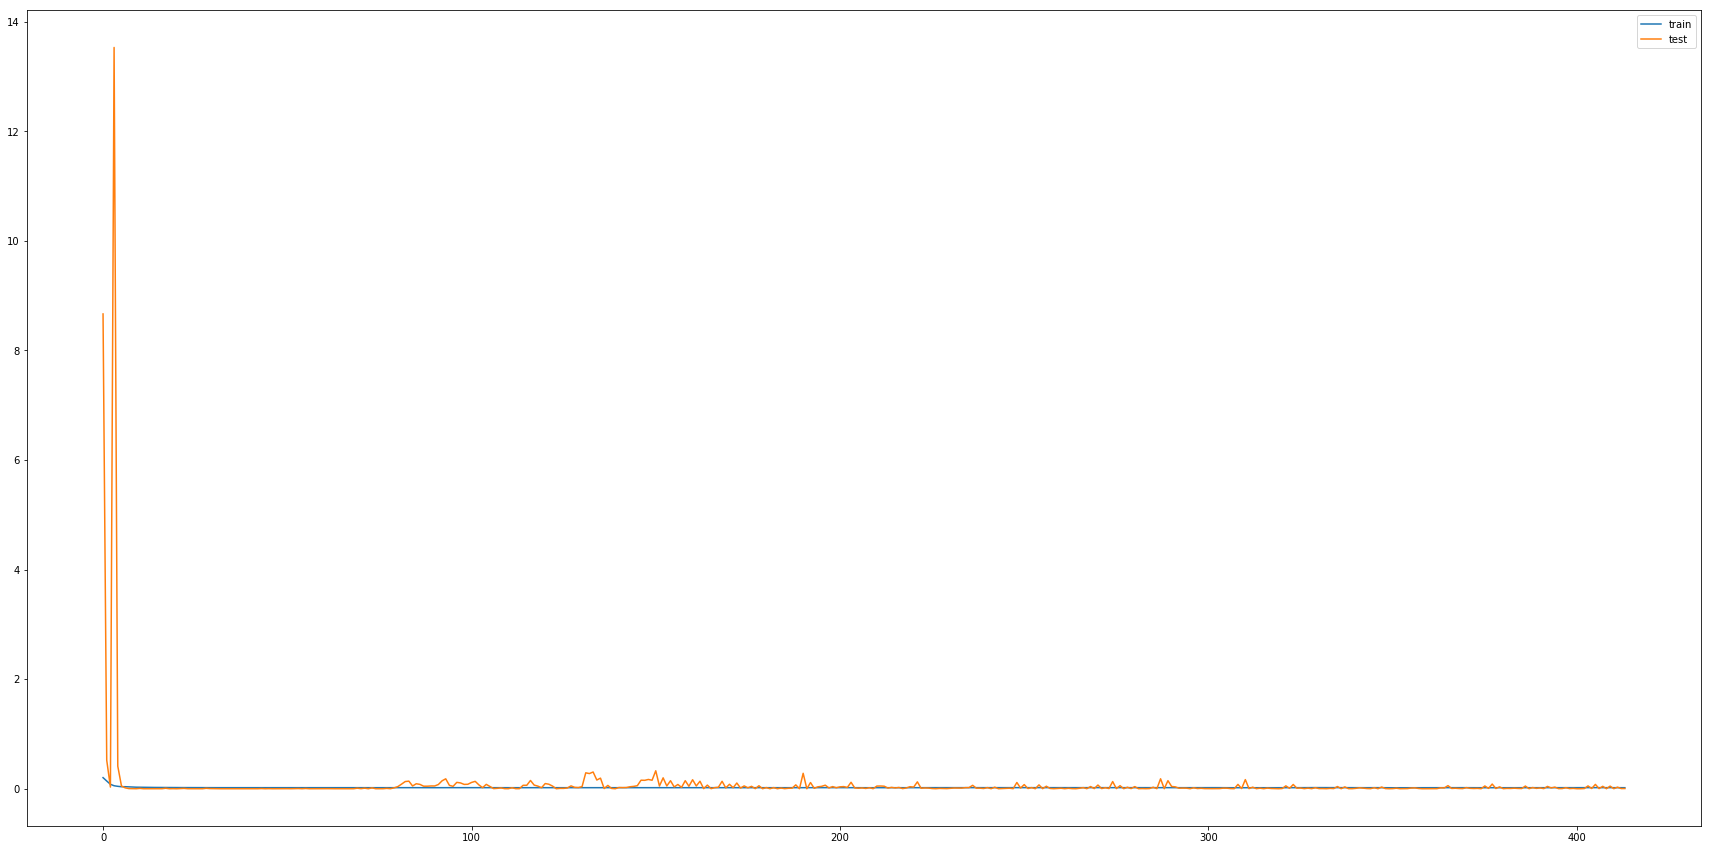

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_65 (Bidirectio (None, 512)               618496    
_________________________________________________________________
batch_normalization_139 (Bat (None, 512)               2048      
_________________________________________________________________
dropout_156 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_106 (Dense)            (None, 1)                 513       
Total params: 621,057
Trainable params: 620,033
Non-trainable params: 1,024
_________________________________________________________________
None
Test RMSE: 341.715


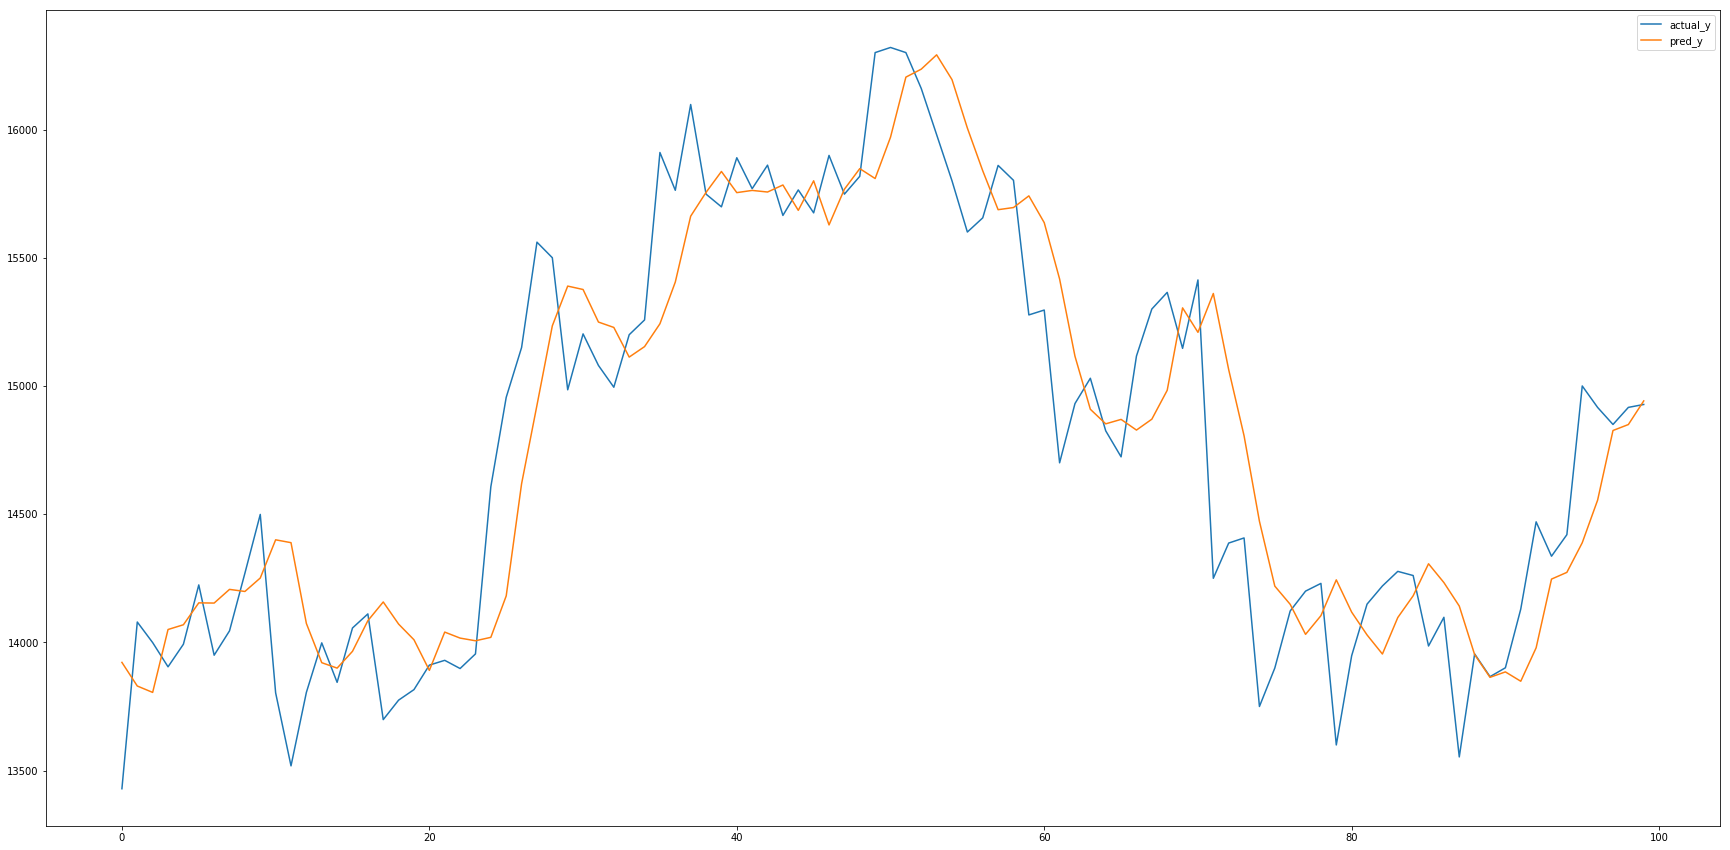

99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 0, 1, 1, 1, 0, 1, 0, 1, 1]
             precision    recall  f1-score   support

          0       0.30      0.35      0.32        40
          1       0.50      0.44      0.47        59

avg / total       0.42      0.40      0.41        99

======= 256 =======





<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_107 (LSTM)              (None, 384)               660480    
_________________________________________________________________
batch_normalization_140 (Bat (None, 384)               1536      
_________________________________________________________________
dropout_157 (Dropout)        (None, 384)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 385       
Total par

25344/27350 [==========================>...] - ETA: 0s - loss: 0.0055
Epoch 00031: val_loss improved from 0.00028 to 0.00028, saving model to ../output/tmp/model_lstm.hdf5
27350/27350 [==============================] - 1s 28us/step - loss: 0.0197 - val_loss: 2.7987e-04
Epoch 32/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0079
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 1s 26us/step - loss: 0.0196 - val_loss: 3.2061e-04
Epoch 33/500
25728/27350 [===========================>..] - ETA: 0s - loss: 0.0058
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 1s 26us/step - loss: 0.0196 - val_loss: 0.0018
Epoch 34/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0101
Epoch 00034: val_loss did not improve
27350/27350 [==============================] - 1s 27us/step - loss: 0.0195 - val_loss: 0.0011
Epoch 35/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.010

Epoch 69/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0117
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 1s 26us/step - loss: 0.0202 - val_loss: 0.0228
Epoch 70/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0190
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 1s 27us/step - loss: 0.0201 - val_loss: 0.0626
Epoch 71/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0096
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 1s 27us/step - loss: 0.0201 - val_loss: 0.1729
Epoch 72/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0190
Epoch 00072: val_loss did not improve
27350/27350 [==============================] - 1s 26us/step - loss: 0.0202 - val_loss: 0.1304
Epoch 73/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0187
Epoch 00073: val_loss did not improve
27350/27350 [======

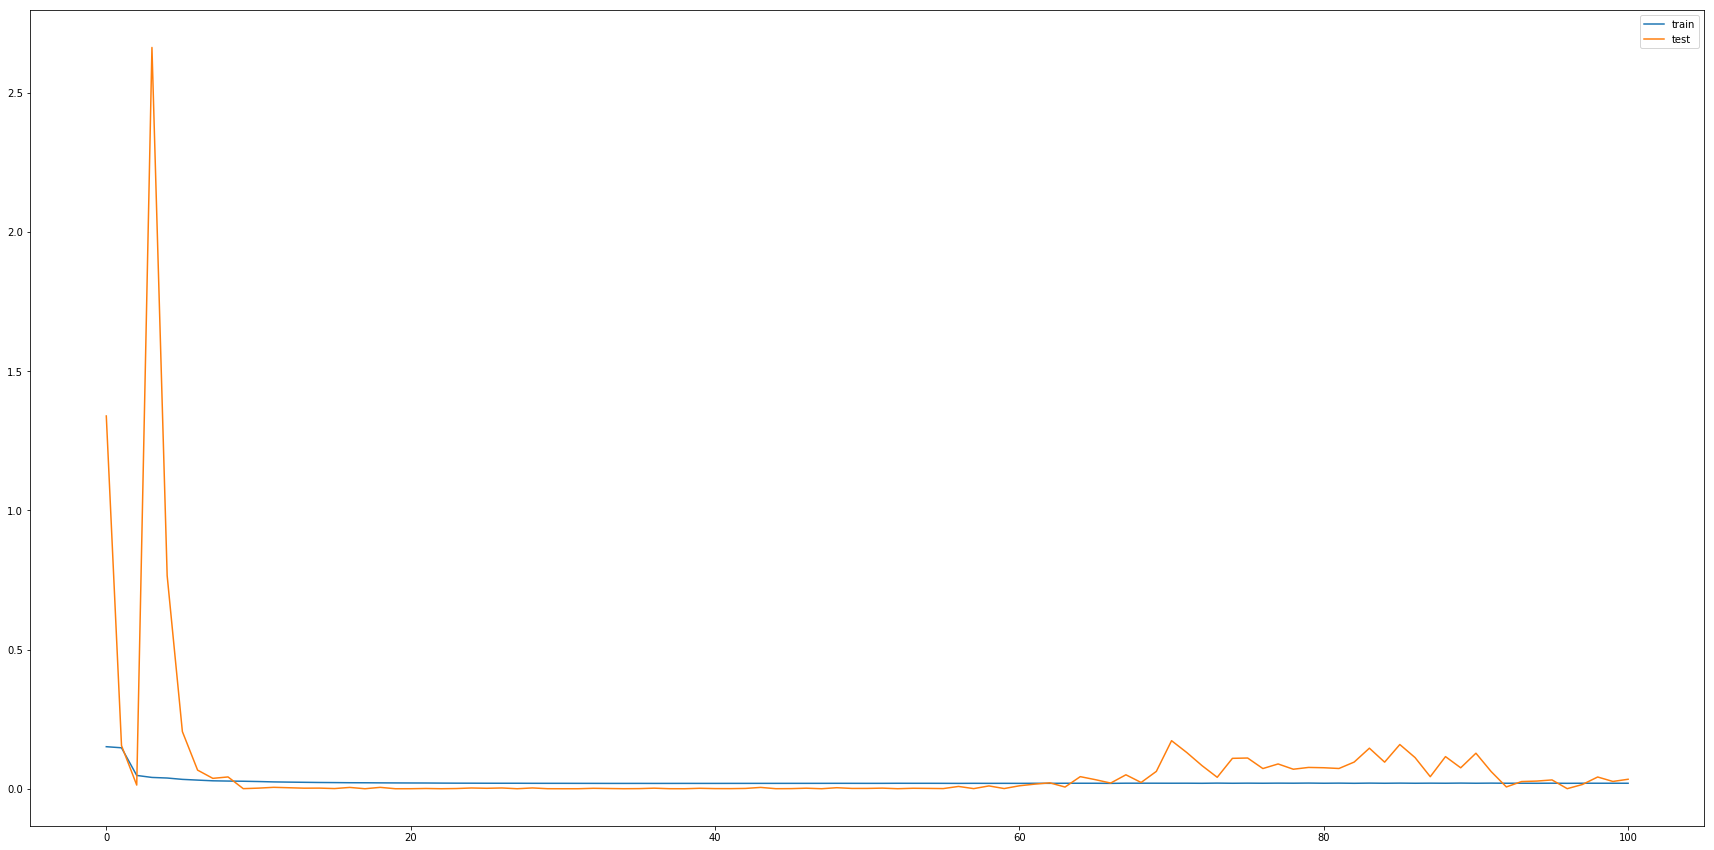

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_108 (LSTM)              (None, 384)               660480    
_________________________________________________________________
batch_normalization_141 (Bat (None, 384)               1536      
_________________________________________________________________
dropout_158 (Dropout)        (None, 384)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 1)                 385       
Total params: 662,401
Trainable params: 661,633
Non-trainable params: 768
_________________________________________________________________
None
Test RMSE: 326.939


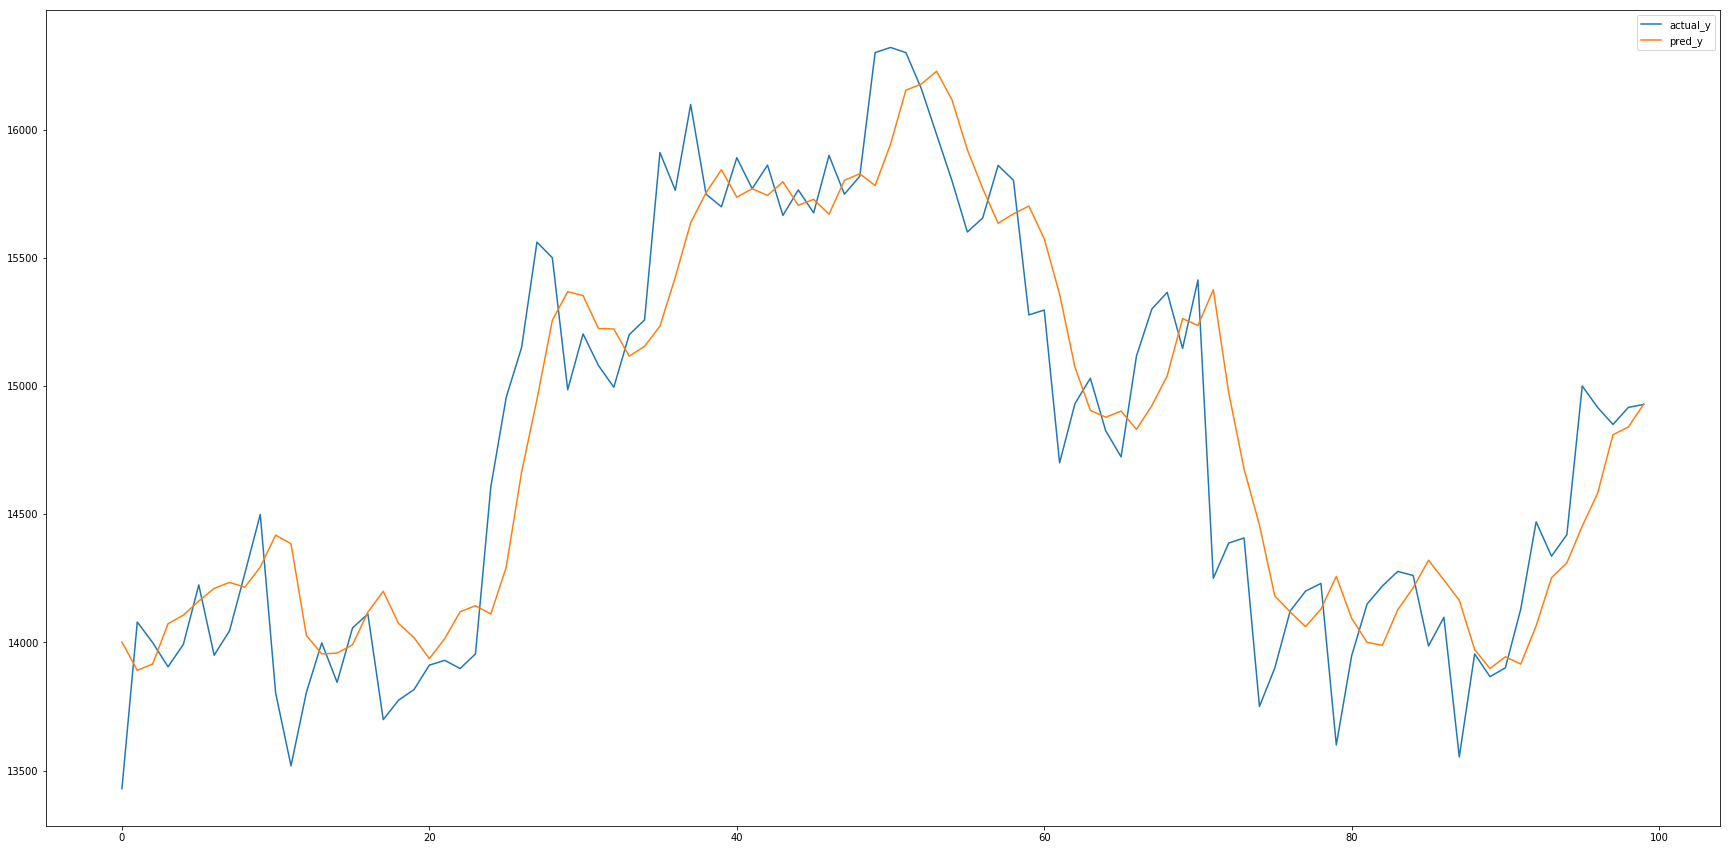

99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 1, 1, 1, 1, 1, 1, 0, 1, 1]
             precision    recall  f1-score   support

          0       0.23      0.25      0.24        40
          1       0.46      0.44      0.45        59

avg / total       0.37      0.36      0.37        99

======= 384 =======





<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_66 (Bidirectio (None, 768)               1320960   
_________________________________________________________________
batch_normalization_142 (Bat (None, 768)               3072      
_________________________________________________________________
dropout_159 (Dropout)        (None, 768)               0         
_________________________________________________________________
dense_109 (Dense)            (None, 1)                 769       
Total par

26496/27350 [============================>.] - ETA: 0s - loss: 0.0085
Epoch 00031: val_loss did not improve
27350/27350 [==============================] - 1s 35us/step - loss: 0.0201 - val_loss: 0.0012
Epoch 32/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0086
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 1s 35us/step - loss: 0.0202 - val_loss: 5.0585e-04
Epoch 33/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0085
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 1s 35us/step - loss: 0.0201 - val_loss: 7.2850e-04
Epoch 34/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0085
Epoch 00034: val_loss improved from 0.00032 to 0.00031, saving model to ../output/tmp/model_lstm.hdf5
27350/27350 [==============================] - 1s 38us/step - loss: 0.0200 - val_loss: 3.1485e-04
Epoch 35/500
26496/27350 [============================>.] - ETA: 0s - loss: 0

Epoch 69/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0094
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0191 - val_loss: 0.0501
Epoch 70/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0092
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0189 - val_loss: 0.0560
Epoch 71/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0098
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0193 - val_loss: 0.1059
Epoch 72/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0097
Epoch 00072: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0192 - val_loss: 0.0402
Epoch 73/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0100
Epoch 00073: val_loss did not improve
27350/27350 [======

26496/27350 [============================>.] - ETA: 0s - loss: 0.0113
Epoch 00107: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0207 - val_loss: 0.3066
Epoch 108/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0111
Epoch 00108: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0205 - val_loss: 0.0150
Epoch 109/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0105
Epoch 00109: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0202 - val_loss: 0.0010
Epoch 110/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0098
Epoch 00110: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0196 - val_loss: 0.0212
Epoch 111/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0094
Epoch 00111: val_loss did not improve
27350/27350 [===============

Epoch 145/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0140
Epoch 00145: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0227 - val_loss: 0.0039
Epoch 146/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0129
Epoch 00146: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0220 - val_loss: 0.0063
Epoch 147/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0121
Epoch 00147: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0213 - val_loss: 0.0899
Epoch 148/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0110
Epoch 00148: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0205 - val_loss: 0.0273
Epoch 149/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0105
Epoch 00149: val_loss did not improve
27350/27350 [=

Epoch 183/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0141
Epoch 00183: val_loss did not improve
27350/27350 [==============================] - 1s 35us/step - loss: 0.0224 - val_loss: 0.0109
Epoch 184/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0140
Epoch 00184: val_loss did not improve
27350/27350 [==============================] - 1s 35us/step - loss: 0.0225 - val_loss: 0.0615
Epoch 185/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0128
Epoch 00185: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0217 - val_loss: 0.0553
Epoch 186/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0123
Epoch 00186: val_loss did not improve
27350/27350 [==============================] - 1s 34us/step - loss: 0.0214 - val_loss: 0.0797
Epoch 187/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0113
Epoch 00187: val_loss did not improve
27350/27350 [=

Epoch 221/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0136
Epoch 00221: val_loss did not improve
27350/27350 [==============================] - 1s 35us/step - loss: 0.0218 - val_loss: 0.0087
Epoch 00221: early stopping


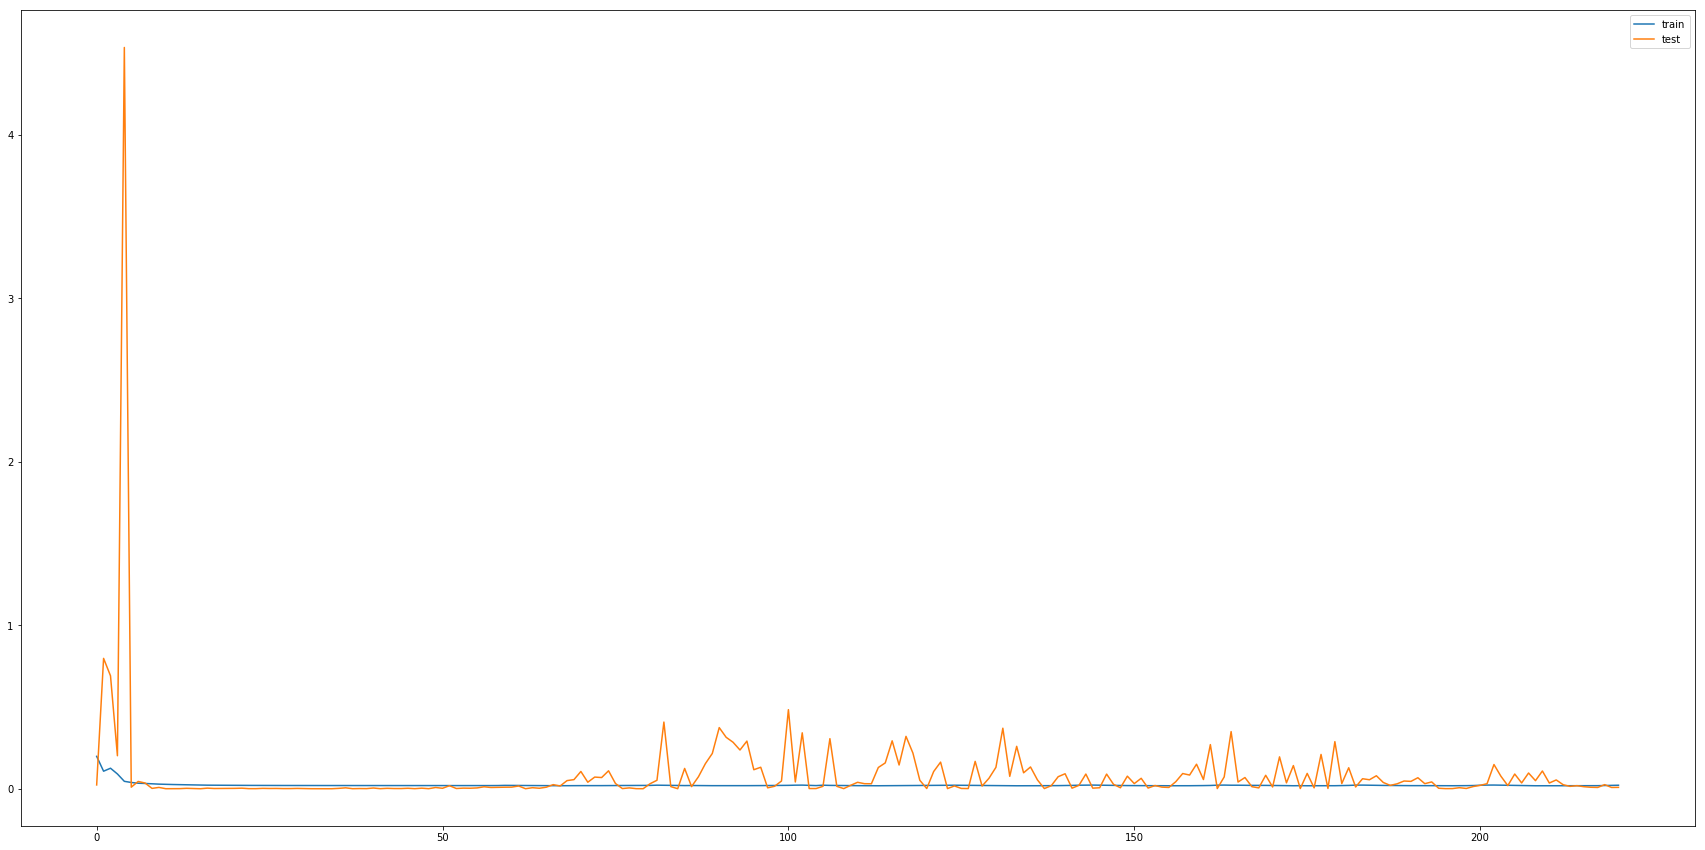

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_67 (Bidirectio (None, 768)               1320960   
_________________________________________________________________
batch_normalization_143 (Bat (None, 768)               3072      
_________________________________________________________________
dropout_160 (Dropout)        (None, 768)               0         
_________________________________________________________________
dense_110 (Dense)            (None, 1)                 769       
Total params: 1,324,801
Trainable params: 1,323,265
Non-trainable params: 1,536
_________________________________________________________________
None
Test RMSE: 346.765


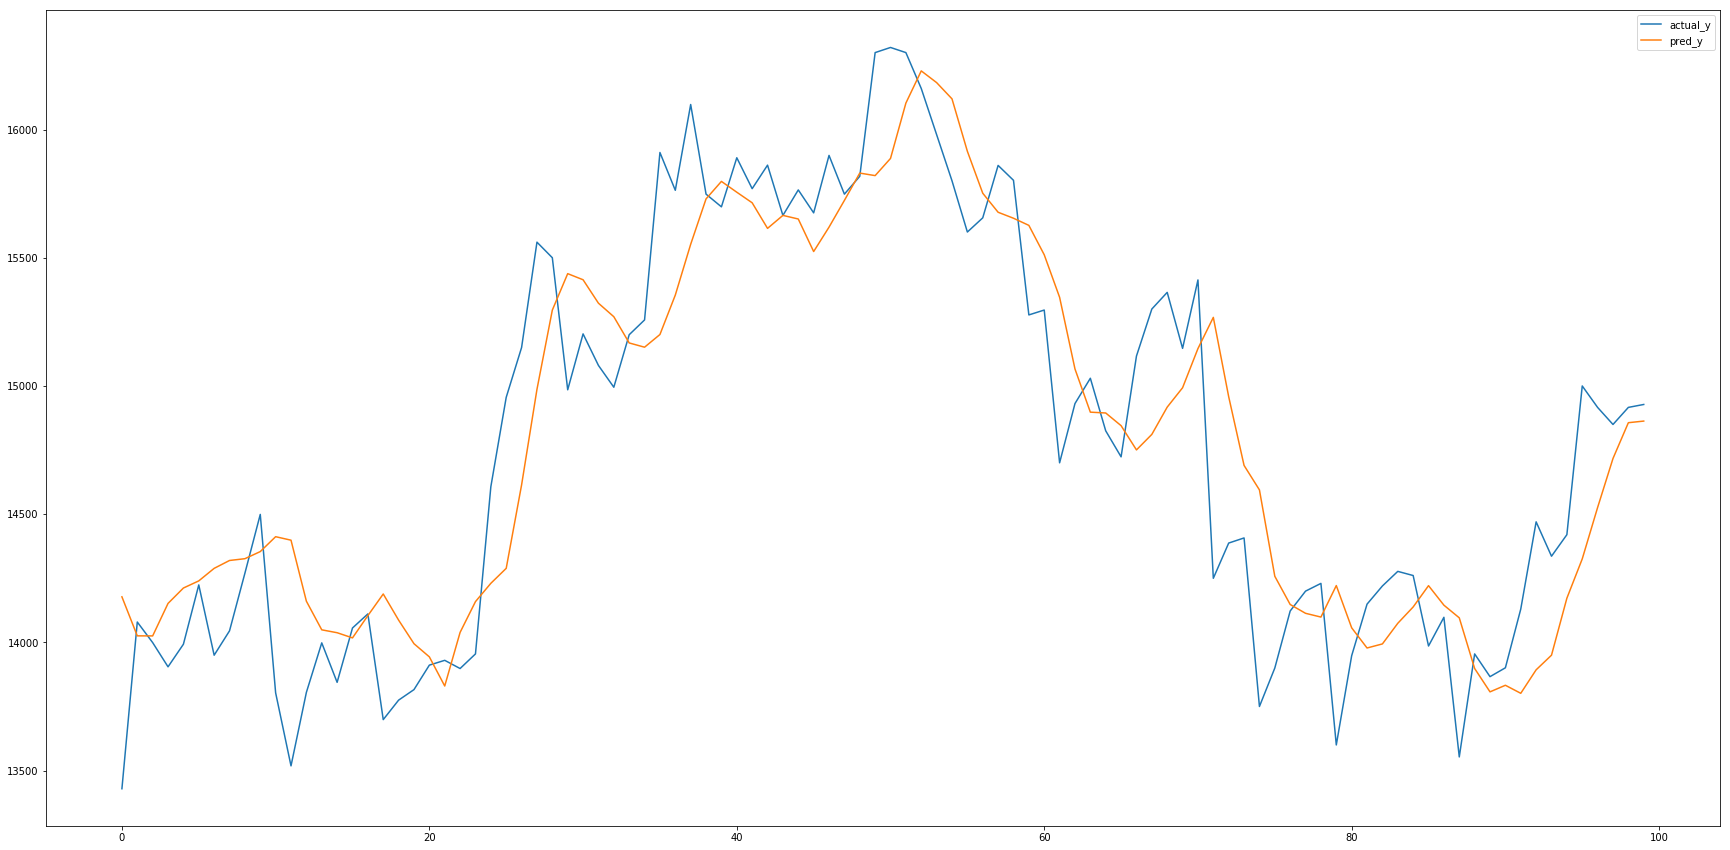

99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
             precision    recall  f1-score   support

          0       0.36      0.45      0.40        40
          1       0.55      0.46      0.50        59

avg / total       0.47      0.45      0.46        99

======= 384 =======





<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_111 (LSTM)              (None, 512)               1142784   
_________________________________________________________________
batch_normalization_144 (Bat (None, 512)               2048      
_________________________________________________________________
dropout_161 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_111 (Dense)            (None, 1)                 513       
Total par

Epoch 31/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0186
Epoch 00031: val_loss improved from 0.00048 to 0.00048, saving model to ../output/tmp/model_lstm.hdf5
27350/27350 [==============================] - 1s 31us/step - loss: 0.0199 - val_loss: 4.7753e-04
Epoch 32/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0185
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 1s 28us/step - loss: 0.0198 - val_loss: 5.2588e-04
Epoch 33/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0185
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 1s 28us/step - loss: 0.0198 - val_loss: 7.8178e-04
Epoch 34/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0185
Epoch 00034: val_loss improved from 0.00048 to 0.00036, saving model to ../output/tmp/model_lstm.hdf5
27350/27350 [==============================] - 1s 31us/step - loss: 0.0198 - val_loss: 3.6275e

Epoch 68/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0184
Epoch 00068: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0194 - val_loss: 0.0034
Epoch 69/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0185
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 1s 29us/step - loss: 0.0196 - val_loss: 0.0084
Epoch 70/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0183
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 1s 28us/step - loss: 0.0193 - val_loss: 0.0033
Epoch 71/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0186
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 1s 28us/step - loss: 0.0196 - val_loss: 0.0075
Epoch 72/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0183
Epoch 00072: val_loss did not improve
27350/27350 [======

27264/27350 [============================>.] - ETA: 0s - loss: 0.0186
Epoch 00106: val_loss did not improve
27350/27350 [==============================] - 1s 28us/step - loss: 0.0197 - val_loss: 0.0082
Epoch 107/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0185
Epoch 00107: val_loss did not improve
27350/27350 [==============================] - 1s 28us/step - loss: 0.0196 - val_loss: 0.0107
Epoch 108/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0186
Epoch 00108: val_loss did not improve
27350/27350 [==============================] - 1s 28us/step - loss: 0.0196 - val_loss: 0.0248
Epoch 109/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0187
Epoch 00109: val_loss did not improve
27350/27350 [==============================] - 1s 28us/step - loss: 0.0197 - val_loss: 0.1331
Epoch 110/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0185
Epoch 00110: val_loss did not improve
27350/27350 [===============

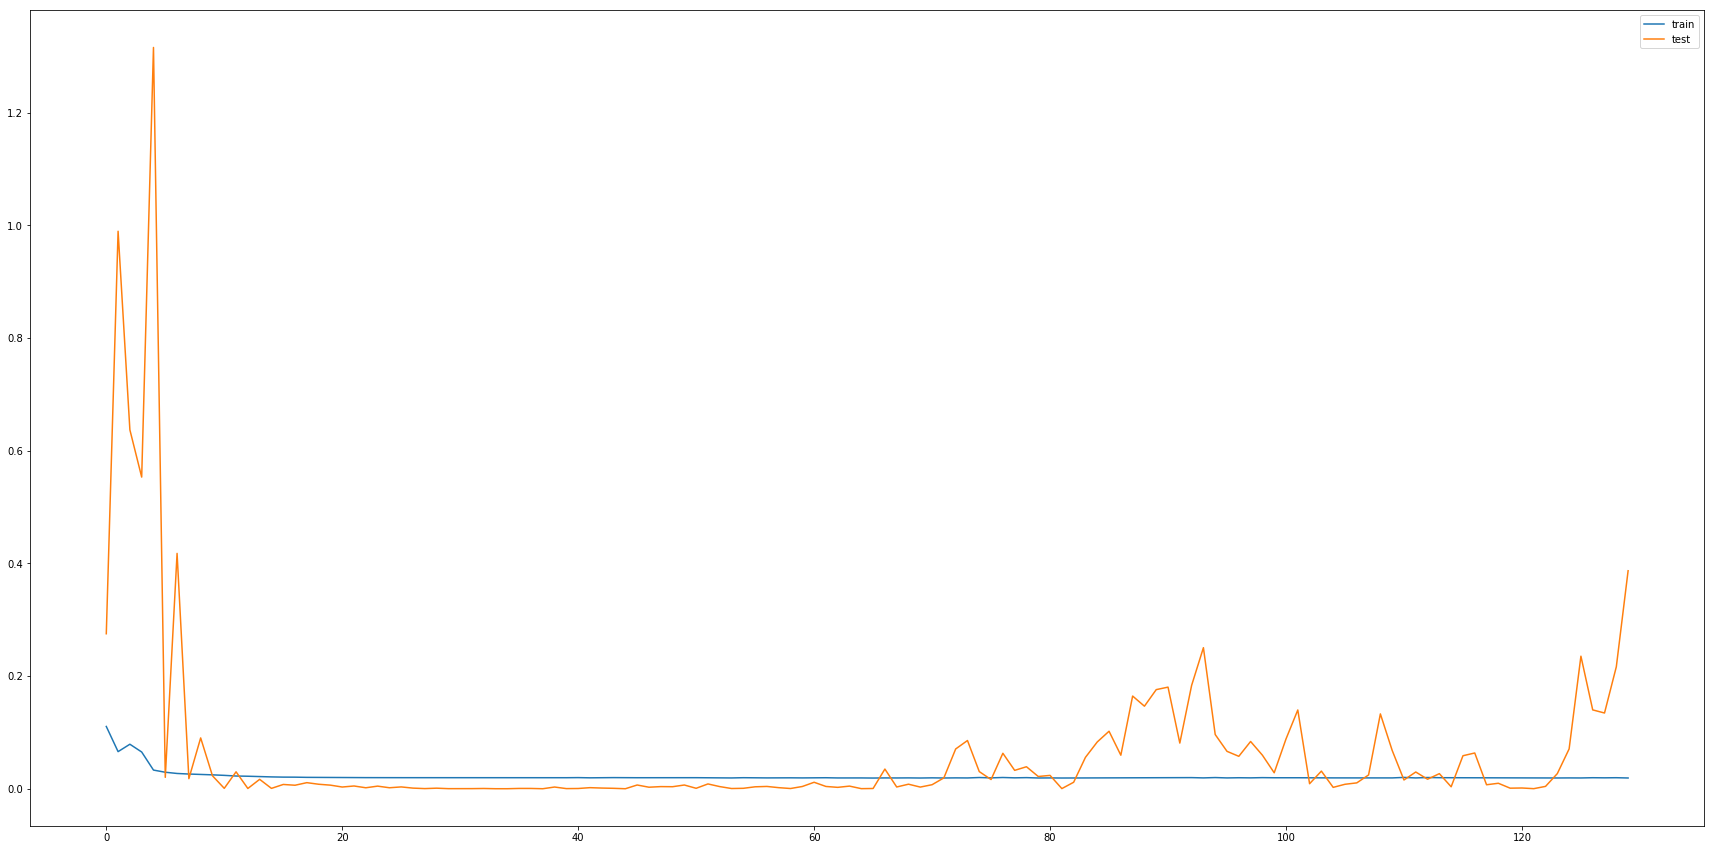

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_112 (LSTM)              (None, 512)               1142784   
_________________________________________________________________
batch_normalization_145 (Bat (None, 512)               2048      
_________________________________________________________________
dropout_162 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 1)                 513       
Total params: 1,145,345
Trainable params: 1,144,321
Non-trainable params: 1,024
_________________________________________________________________
None
Test RMSE: 355.044


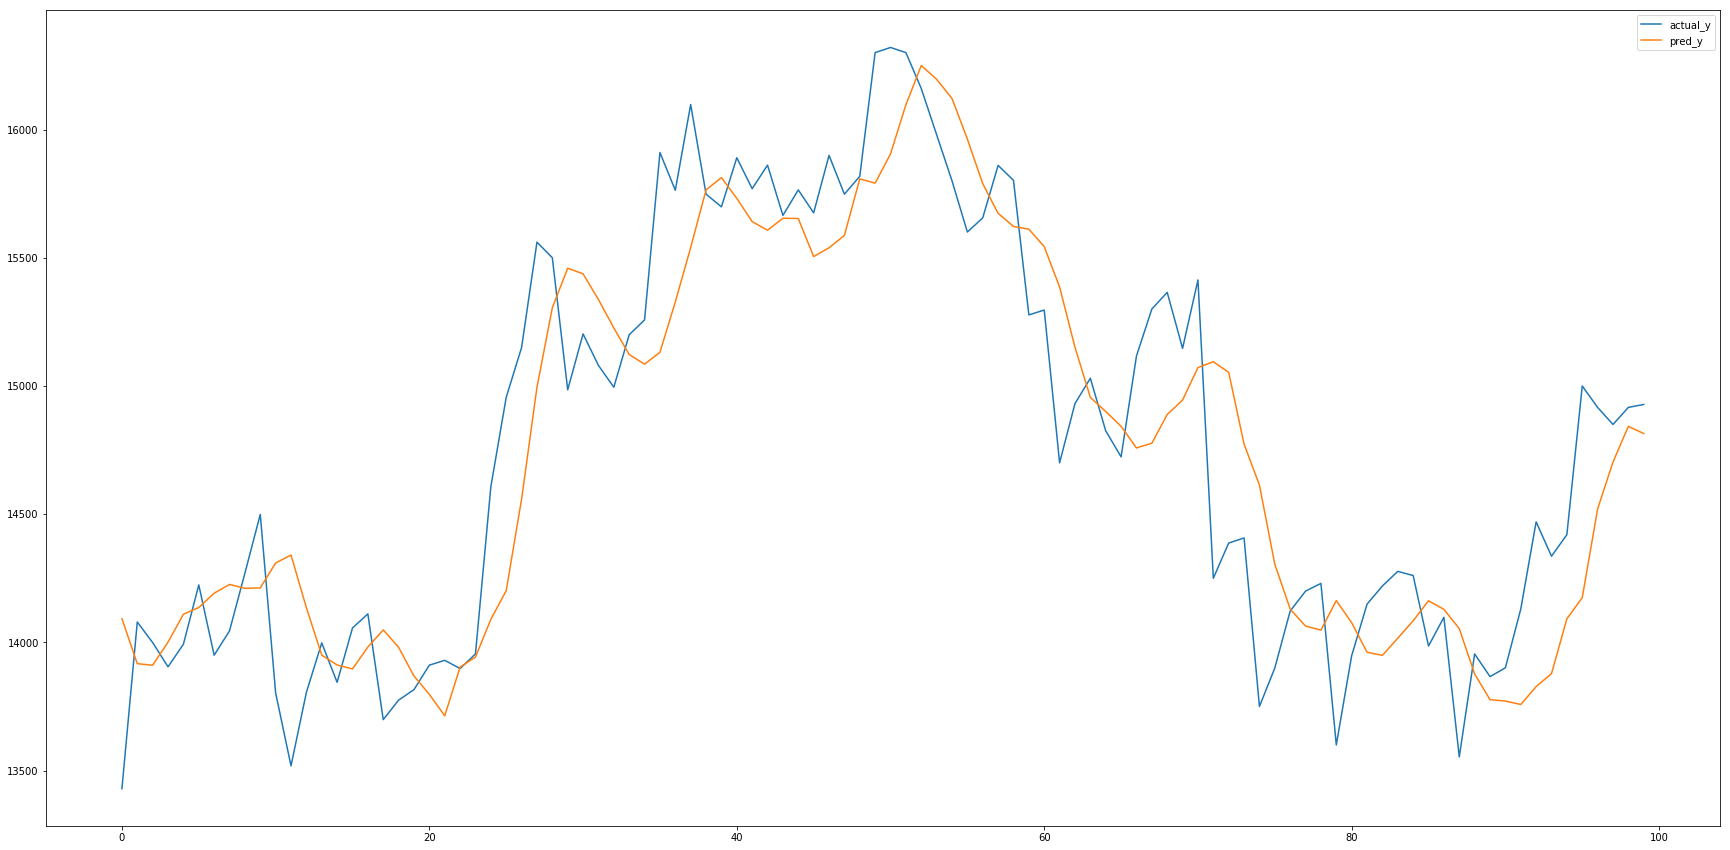

99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 0, 1, 1, 1, 1, 1, 0, 1, 1]
             precision    recall  f1-score   support

          0       0.32      0.42      0.37        40
          1       0.50      0.39      0.44        59

avg / total       0.43      0.40      0.41        99

======= 512 =======





<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_68 (Bidirectio (None, 1024)              2285568   
_________________________________________________________________
batch_normalization_146 (Bat (None, 1024)              4096      
_________________________________________________________________
dropout_163 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_113 (Dense)            (None, 1)                 1025      
Total par

Epoch 31/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0090
Epoch 00031: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0203 - val_loss: 5.0536e-04
Epoch 32/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0091
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 1s 42us/step - loss: 0.0204 - val_loss: 5.7182e-04
Epoch 33/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0080
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 1s 42us/step - loss: 0.0204 - val_loss: 3.9609e-04
Epoch 34/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0113
Epoch 00034: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0203 - val_loss: 5.1273e-04
Epoch 35/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0092
Epoch 00035: val_loss did not improve
273

Epoch 69/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0110
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 1s 42us/step - loss: 0.0199 - val_loss: 0.0246
Epoch 70/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0109
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0204 - val_loss: 0.0011
Epoch 71/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0123
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0209 - val_loss: 0.0018
Epoch 72/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0156
Epoch 00072: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0228 - val_loss: 0.0919
Epoch 73/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0218
Epoch 00073: val_loss did not improve
27350/27350 [======

27264/27350 [============================>.] - ETA: 0s - loss: 0.0174
Epoch 00107: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0184 - val_loss: 0.0460
Epoch 108/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0094
Epoch 00108: val_loss did not improve
27350/27350 [==============================] - 1s 42us/step - loss: 0.0186 - val_loss: 0.0998
Epoch 109/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0116
Epoch 00109: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0190 - val_loss: 0.1520
Epoch 110/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0123
Epoch 00110: val_loss did not improve
27350/27350 [==============================] - 1s 45us/step - loss: 0.0194 - val_loss: 0.2917
Epoch 111/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0120
Epoch 00111: val_loss did not improve
27350/27350 [===============

Epoch 145/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0083
Epoch 00145: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0184 - val_loss: 0.0036
Epoch 146/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0083
Epoch 00146: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0182 - val_loss: 0.0197
Epoch 147/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0086
Epoch 00147: val_loss did not improve
27350/27350 [==============================] - 1s 42us/step - loss: 0.0184 - val_loss: 0.0155
Epoch 148/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0085
Epoch 00148: val_loss did not improve
27350/27350 [==============================] - 1s 42us/step - loss: 0.0183 - val_loss: 0.0682
Epoch 149/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0173
Epoch 00149: val_loss did not improve
27350/27350 [=

Epoch 183/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0148
Epoch 00183: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0233 - val_loss: 0.0182
Epoch 184/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0141
Epoch 00184: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0227 - val_loss: 0.0457
Epoch 185/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0153
Epoch 00185: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0222 - val_loss: 0.0200
Epoch 186/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0140
Epoch 00186: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0224 - val_loss: 0.0280
Epoch 187/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0216
Epoch 00187: val_loss did not improve
27350/27350 [=

Epoch 221/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0084
Epoch 00221: val_loss did not improve
27350/27350 [==============================] - 1s 42us/step - loss: 0.0183 - val_loss: 0.0217
Epoch 222/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0084
Epoch 00222: val_loss did not improve
27350/27350 [==============================] - 1s 42us/step - loss: 0.0181 - val_loss: 0.0133
Epoch 223/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0076
Epoch 00223: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0179 - val_loss: 0.0046
Epoch 224/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0083
Epoch 00224: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0178 - val_loss: 0.0016
Epoch 225/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0168
Epoch 00225: val_loss did not improve
27350/27350 [=

Epoch 259/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0177
Epoch 00259: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0252 - val_loss: 0.0022
Epoch 260/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0152
Epoch 00260: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0233 - val_loss: 5.6691e-04
Epoch 261/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0133
Epoch 00261: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0222 - val_loss: 4.5553e-04
Epoch 262/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0131
Epoch 00262: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0214 - val_loss: 7.3846e-04
Epoch 263/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0132
Epoch 00263: val_loss did not improve
27

Epoch 297/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0082
Epoch 00297: val_loss did not improve
27350/27350 [==============================] - 1s 42us/step - loss: 0.0184 - val_loss: 0.0015
Epoch 298/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0074
Epoch 00298: val_loss did not improve
27350/27350 [==============================] - 1s 42us/step - loss: 0.0183 - val_loss: 0.0018
Epoch 299/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0082
Epoch 00299: val_loss did not improve
27350/27350 [==============================] - 1s 42us/step - loss: 0.0181 - val_loss: 0.0167
Epoch 300/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0080
Epoch 00300: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0177 - val_loss: 7.0509e-04
Epoch 301/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0167
Epoch 00301: val_loss did not improve
27350/2735

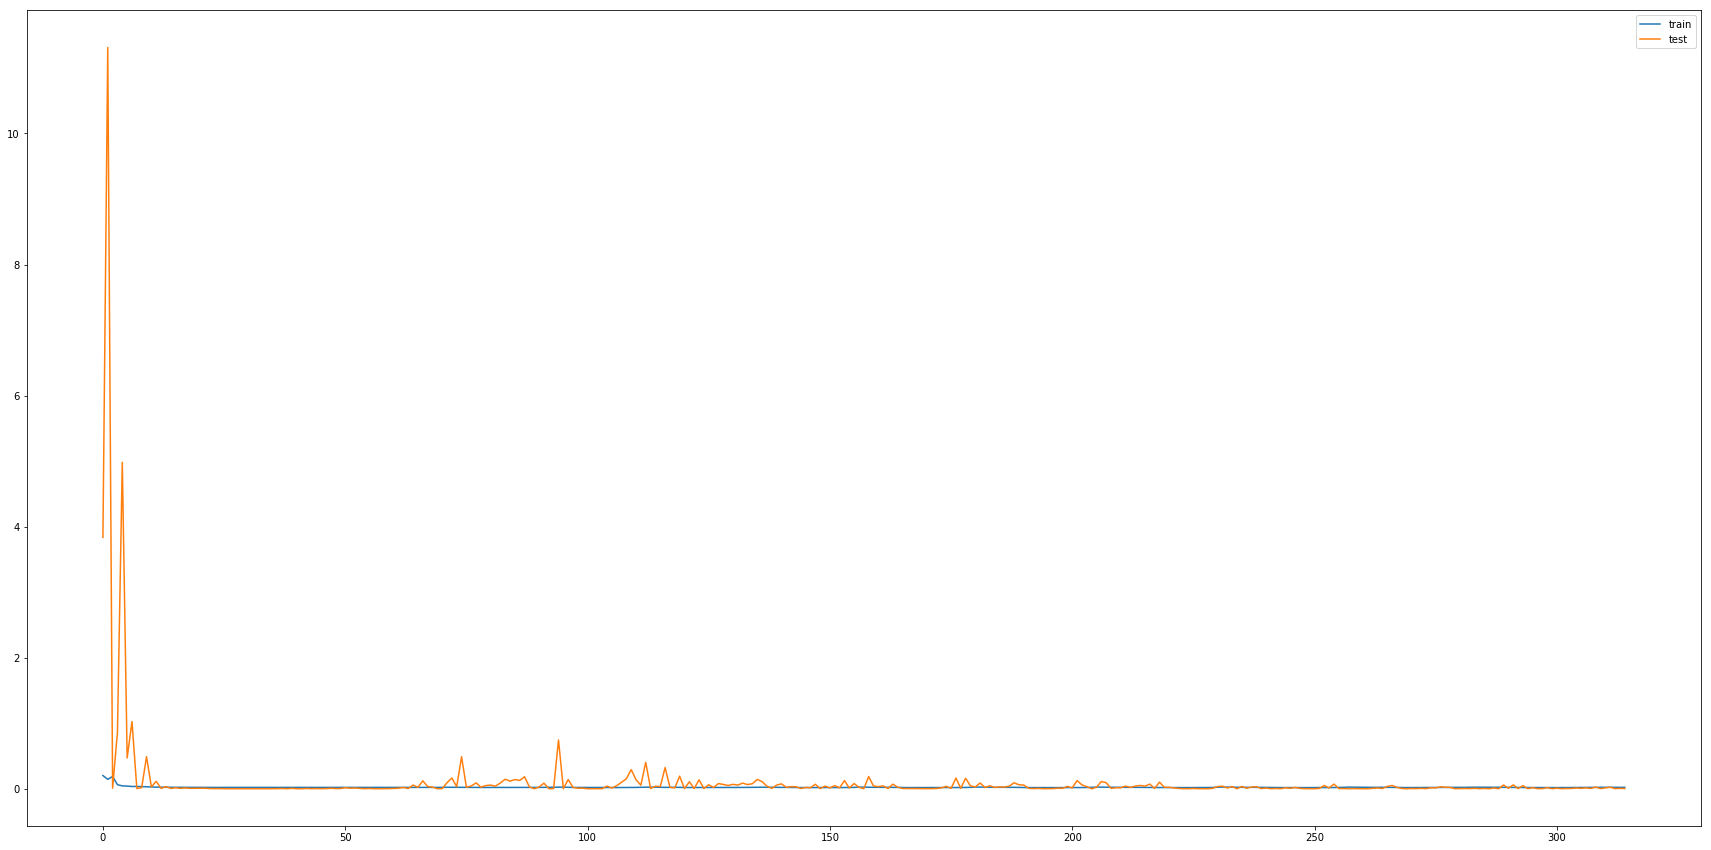

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_69 (Bidirectio (None, 1024)              2285568   
_________________________________________________________________
batch_normalization_147 (Bat (None, 1024)              4096      
_________________________________________________________________
dropout_164 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_114 (Dense)            (None, 1)                 1025      
Total params: 2,290,689
Trainable params: 2,288,641
Non-trainable params: 2,048
_________________________________________________________________
None
Test RMSE: 349.450


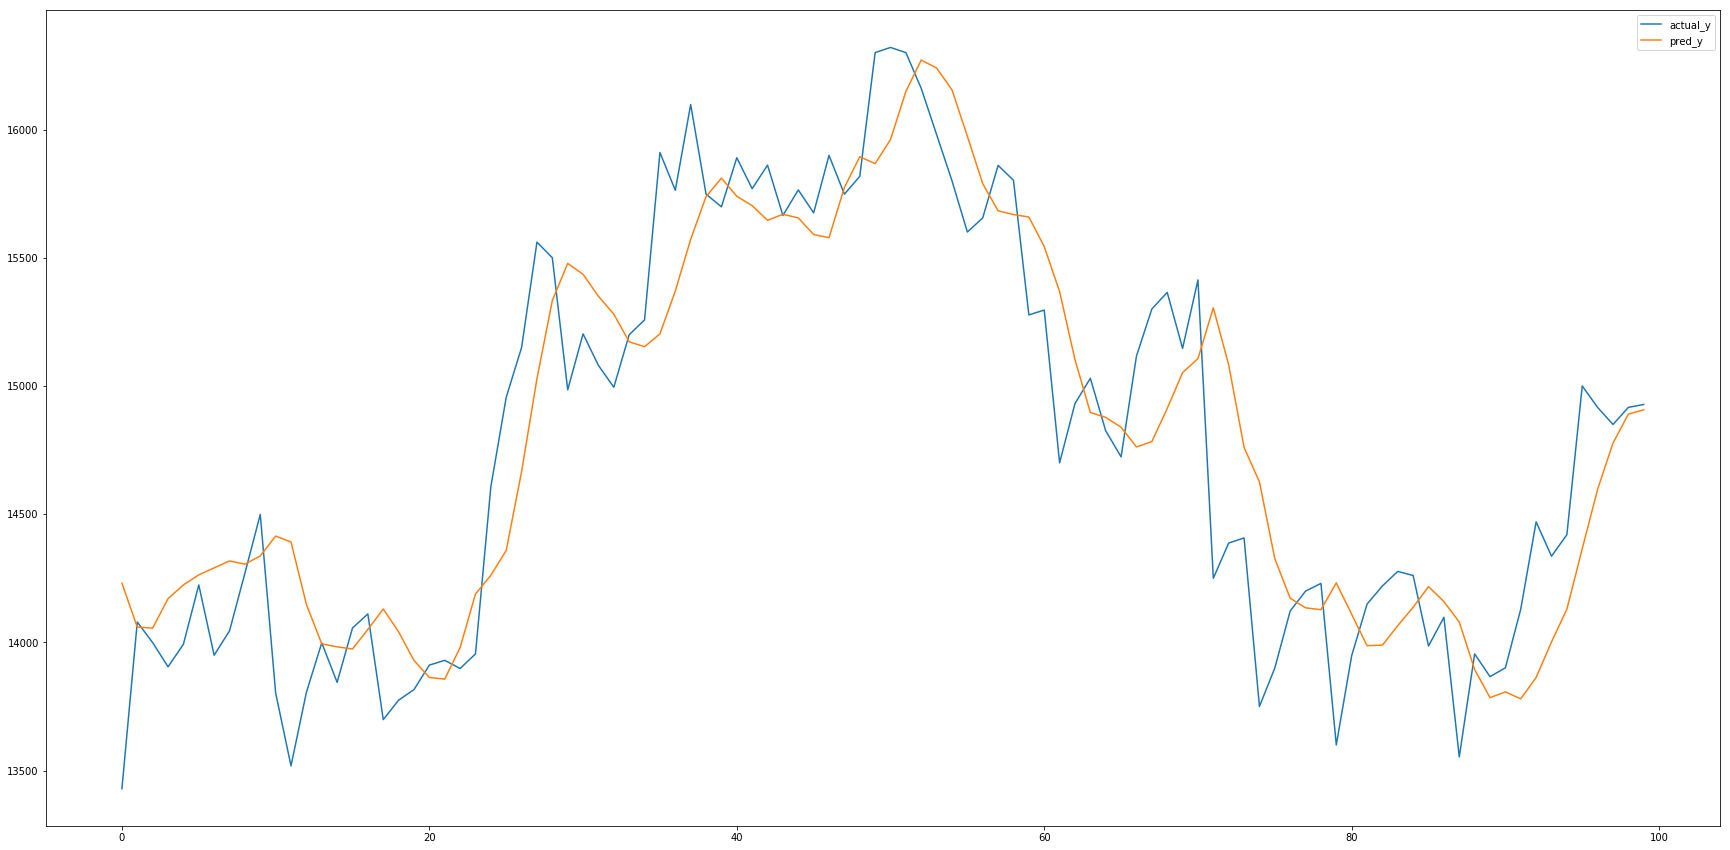

99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 0, 1, 1, 1, 1, 1, 0, 1, 1]
             precision    recall  f1-score   support

          0       0.35      0.45      0.39        40
          1       0.53      0.42      0.47        59

avg / total       0.46      0.43      0.44        99

======= 512 =======





<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_115 (LSTM)              (None, 768)               2500608   
_________________________________________________________________
batch_normalization_148 (Bat (None, 768)               3072      
_________________________________________________________________
dropout_165 (Dropout)        (None, 768)               0         
_________________________________________________________________
dense_115 (Dense)            (None, 1)                 769       
Total par

26496/27350 [============================>.] - ETA: 0s - loss: 0.0091
Epoch 00030: val_loss did not improve
27350/27350 [==============================] - 1s 37us/step - loss: 0.0205 - val_loss: 3.5084e-04
Epoch 31/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0090
Epoch 00031: val_loss did not improve
27350/27350 [==============================] - 1s 37us/step - loss: 0.0204 - val_loss: 7.1914e-04
Epoch 32/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0089
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 1s 37us/step - loss: 0.0203 - val_loss: 0.0027
Epoch 33/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0090
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 1s 37us/step - loss: 0.0203 - val_loss: 4.3614e-04
Epoch 34/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0090
Epoch 00034: val_loss did not improve
27350/27350 [=======

Epoch 68/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0093
Epoch 00068: val_loss did not improve
27350/27350 [==============================] - 1s 37us/step - loss: 0.0192 - val_loss: 0.0220
Epoch 69/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0090
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 1s 36us/step - loss: 0.0188 - val_loss: 0.0623
Epoch 70/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0091
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 1s 36us/step - loss: 0.0188 - val_loss: 0.1045
Epoch 71/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0089
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 1s 36us/step - loss: 0.0186 - val_loss: 0.0658
Epoch 72/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0094
Epoch 00072: val_loss did not improve
27350/27350 [======

26496/27350 [============================>.] - ETA: 0s - loss: 0.0110
Epoch 00106: val_loss did not improve
27350/27350 [==============================] - 1s 36us/step - loss: 0.0205 - val_loss: 0.0763
Epoch 107/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0102
Epoch 00107: val_loss did not improve
27350/27350 [==============================] - 1s 36us/step - loss: 0.0199 - val_loss: 7.6686e-04
Epoch 108/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0096
Epoch 00108: val_loss did not improve
27350/27350 [==============================] - 1s 36us/step - loss: 0.0193 - val_loss: 0.0481
Epoch 109/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0094
Epoch 00109: val_loss did not improve
27350/27350 [==============================] - 1s 37us/step - loss: 0.0192 - val_loss: 0.0618
Epoch 110/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0090
Epoch 00110: val_loss did not improve
27350/27350 [===========

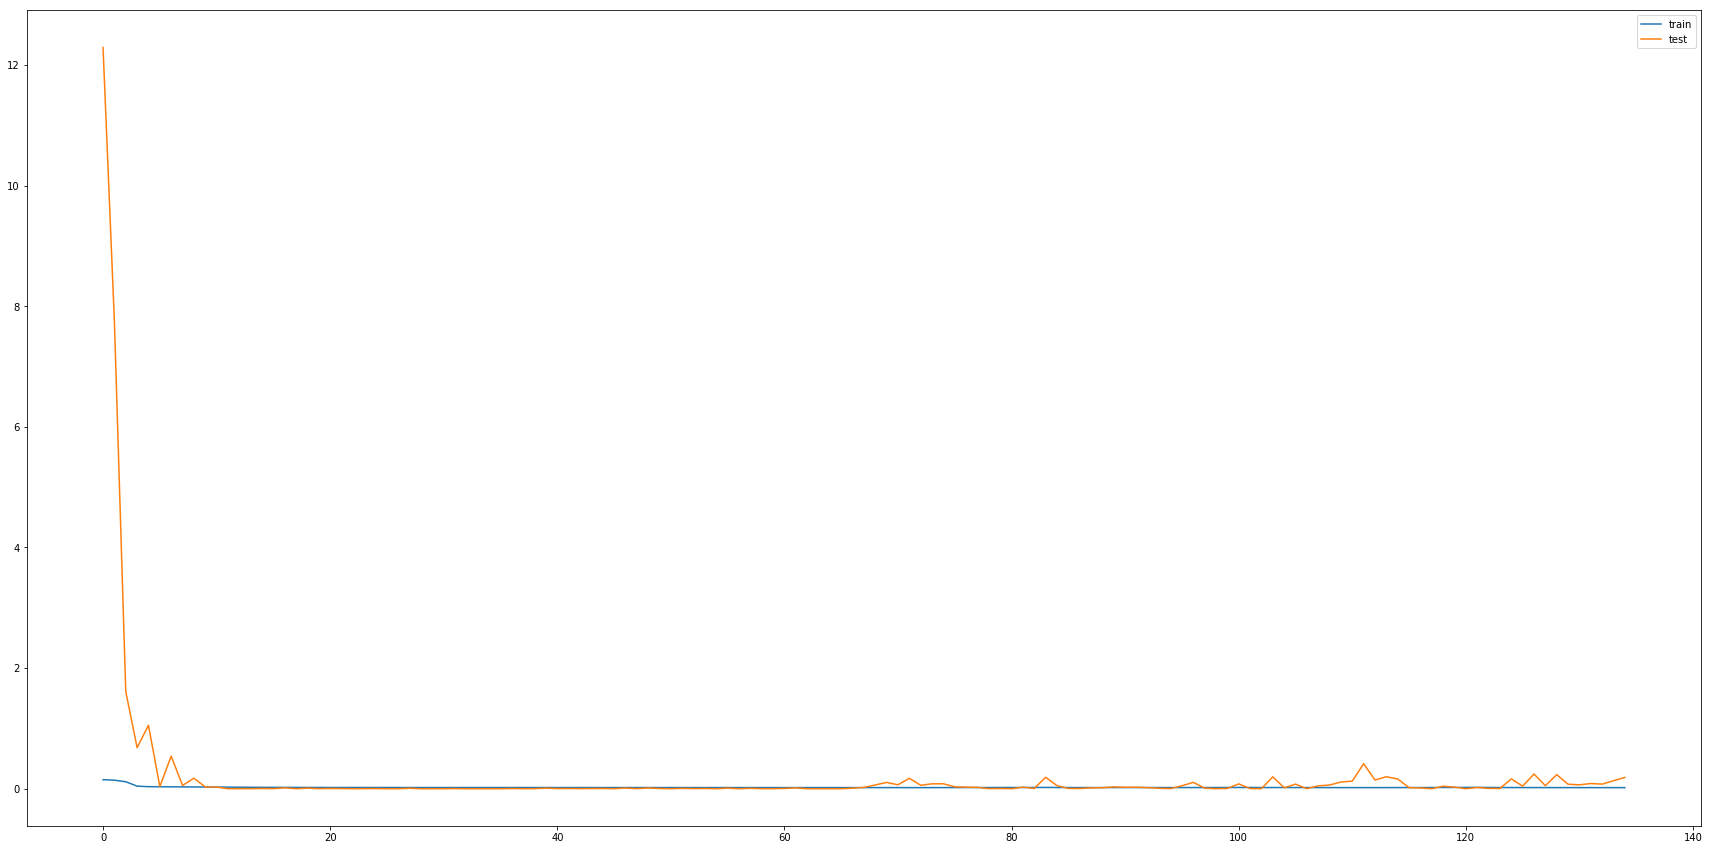

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_116 (LSTM)              (None, 768)               2500608   
_________________________________________________________________
batch_normalization_149 (Bat (None, 768)               3072      
_________________________________________________________________
dropout_166 (Dropout)        (None, 768)               0         
_________________________________________________________________
dense_116 (Dense)            (None, 1)                 769       
Total params: 2,504,449
Trainable params: 2,502,913
Non-trainable params: 1,536
_________________________________________________________________
None
Test RMSE: 330.038


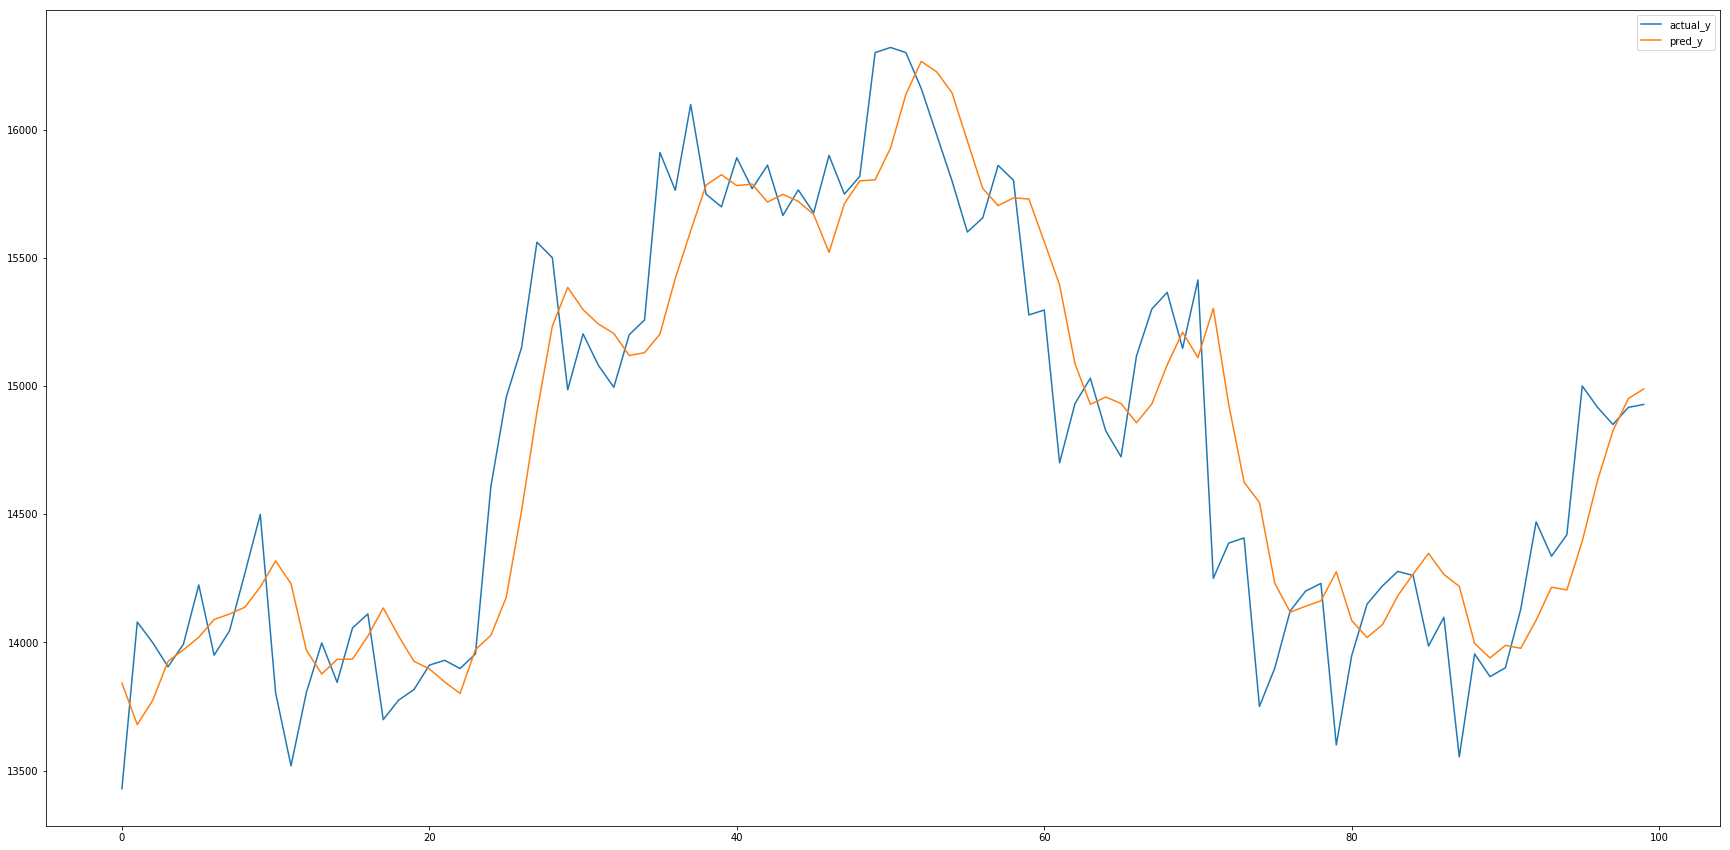

99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
             precision    recall  f1-score   support

          0       0.32      0.35      0.33        40
          1       0.53      0.49      0.51        59

avg / total       0.44      0.43      0.44        99

======= 768 =======





<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_70 (Bidirectio (None, 1536)              5001216   
_________________________________________________________________
batch_normalization_150 (Bat (None, 1536)              6144      
_________________________________________________________________
dropout_167 (Dropout)        (None, 1536)              0         
_________________________________________________________________
dense_117 (Dense)            (None, 1)                 1537      
Total par

Epoch 30/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0117
Epoch 00030: val_loss did not improve
27350/27350 [==============================] - 2s 64us/step - loss: 0.0203 - val_loss: 0.0034
Epoch 31/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0098
Epoch 00031: val_loss did not improve
27350/27350 [==============================] - 2s 63us/step - loss: 0.0205 - val_loss: 0.0041
Epoch 32/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0119
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 2s 63us/step - loss: 0.0204 - val_loss: 0.0062
Epoch 33/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0120
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 2s 63us/step - loss: 0.0206 - val_loss: 0.0024
Epoch 34/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0096
Epoch 00034: val_loss did not improve
27350/27350 [======

27264/27350 [============================>.] - ETA: 0s - loss: 0.0204
Epoch 00068: val_loss did not improve
27350/27350 [==============================] - 2s 64us/step - loss: 0.0212 - val_loss: 0.0157
Epoch 69/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0161
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 2s 64us/step - loss: 0.0228 - val_loss: 0.0445
Epoch 70/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0161
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 2s 64us/step - loss: 0.0244 - val_loss: 0.0062
Epoch 71/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0280
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 2s 64us/step - loss: 0.0288 - val_loss: 0.0033
Epoch 72/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0147
Epoch 00072: val_loss did not improve
27350/27350 [===================

26496/27350 [============================>.] - ETA: 0s - loss: 0.0090
Epoch 00106: val_loss did not improve
27350/27350 [==============================] - 2s 64us/step - loss: 0.0191 - val_loss: 0.0190
Epoch 107/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0107
Epoch 00107: val_loss did not improve
27350/27350 [==============================] - 2s 64us/step - loss: 0.0187 - val_loss: 0.0089
Epoch 108/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0110
Epoch 00108: val_loss did not improve
27350/27350 [==============================] - 2s 64us/step - loss: 0.0190 - val_loss: 0.0327
Epoch 109/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0109
Epoch 00109: val_loss did not improve
27350/27350 [==============================] - 2s 64us/step - loss: 0.0189 - val_loss: 0.0024
Epoch 110/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0093
Epoch 00110: val_loss did not improve
27350/27350 [===============

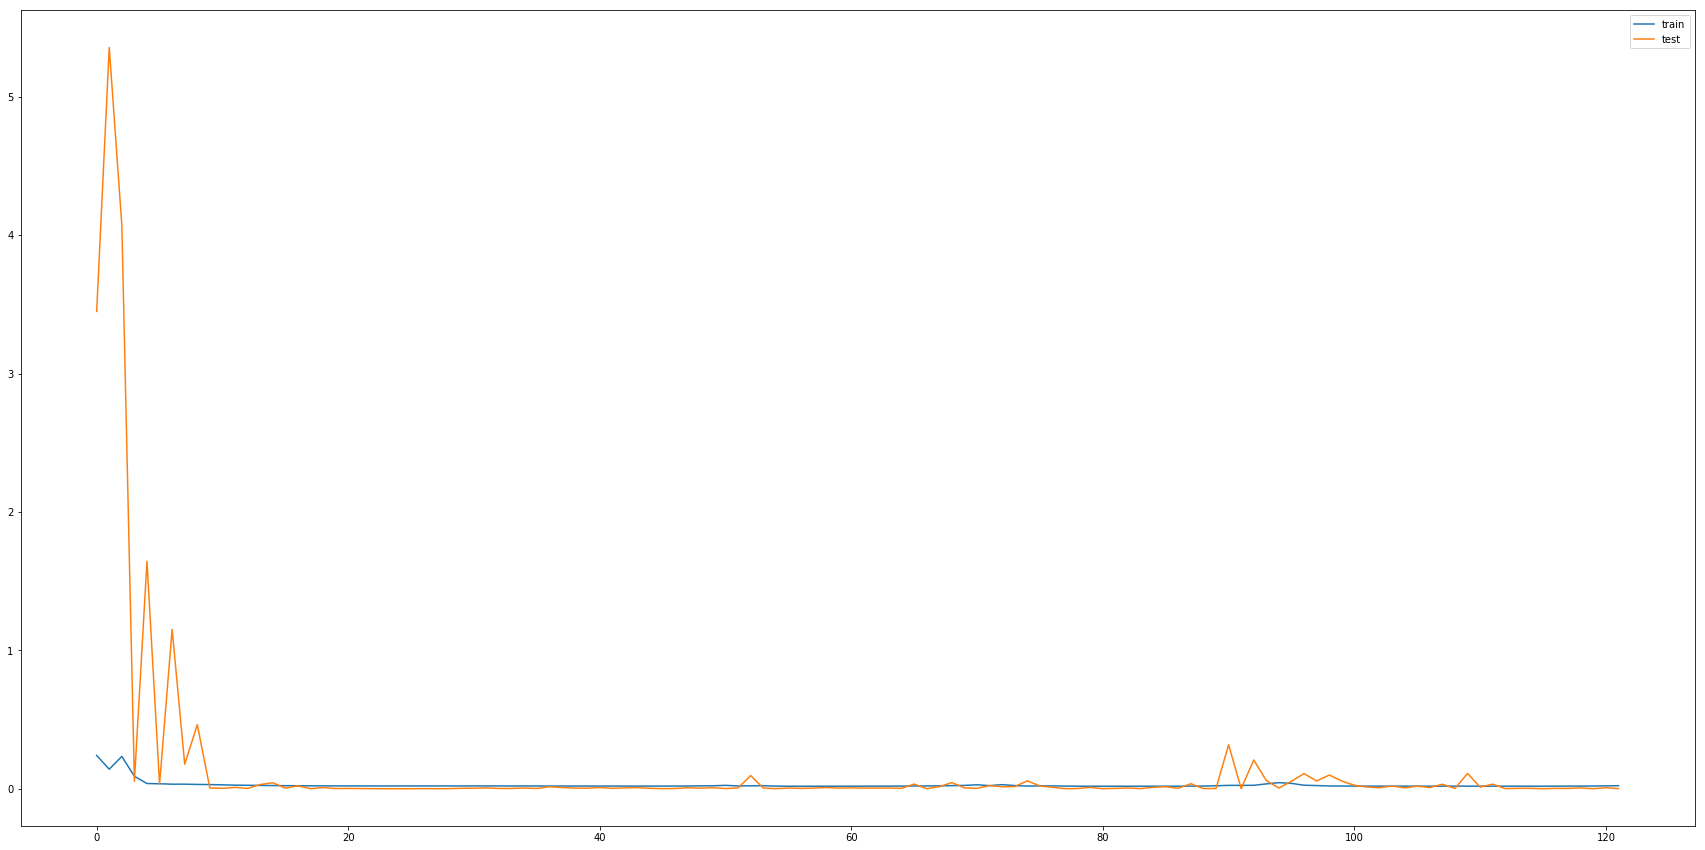

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_71 (Bidirectio (None, 1536)              5001216   
_________________________________________________________________
batch_normalization_151 (Bat (None, 1536)              6144      
_________________________________________________________________
dropout_168 (Dropout)        (None, 1536)              0         
_________________________________________________________________
dense_118 (Dense)            (None, 1)                 1537      
Total params: 5,008,897
Trainable params: 5,005,825
Non-trainable params: 3,072
_________________________________________________________________
None
Test RMSE: 348.546


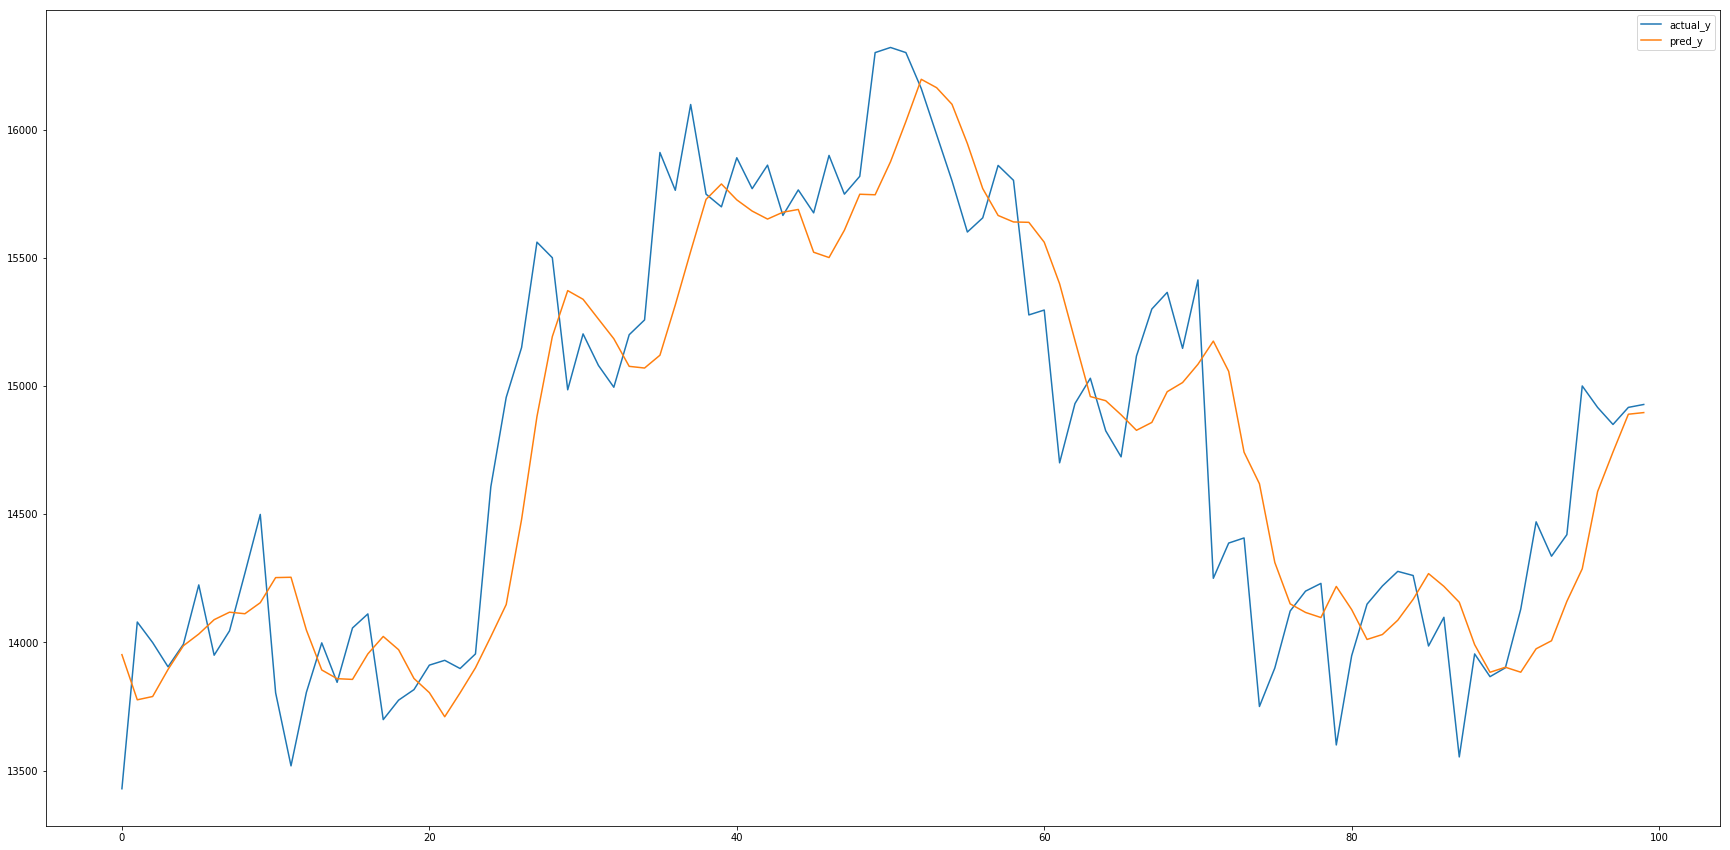

99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 1, 1, 1, 1, 1, 1, 0, 1, 1]
             precision    recall  f1-score   support

          0       0.33      0.40      0.36        40
          1       0.52      0.44      0.48        59

avg / total       0.44      0.42      0.43        99

======= 768 =======





<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_119 (LSTM)              (None, 896)               3376128   
_________________________________________________________________
batch_normalization_152 (Bat (None, 896)               3584      
_________________________________________________________________
dropout_169 (Dropout)        (None, 896)               0         
_________________________________________________________________
dense_119 (Dense)            (None, 1)                 897       
Total par

Epoch 30/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0099
Epoch 00030: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0210 - val_loss: 0.0024
Epoch 31/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0115
Epoch 00031: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0203 - val_loss: 5.0571e-04
Epoch 32/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0084
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0205 - val_loss: 0.0017
Epoch 33/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0096
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 1s 44us/step - loss: 0.0206 - val_loss: 0.0051
Epoch 34/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0196
Epoch 00034: val_loss did not improve
27350/27350 [==

26880/27350 [============================>.] - ETA: 0s - loss: 0.0110
Epoch 00068: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0188 - val_loss: 0.0062
Epoch 69/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0087
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0189 - val_loss: 0.0459
Epoch 70/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0090
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0191 - val_loss: 0.0011
Epoch 71/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0099
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0192 - val_loss: 0.0102
Epoch 72/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0103
Epoch 00072: val_loss did not improve
27350/27350 [===================

26496/27350 [============================>.] - ETA: 0s - loss: 0.0092
Epoch 00106: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0190 - val_loss: 0.0148
Epoch 107/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0081
Epoch 00107: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0187 - val_loss: 0.0366
Epoch 108/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0173
Epoch 00108: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0183 - val_loss: 0.1600
Epoch 109/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0089
Epoch 00109: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0185 - val_loss: 0.0815
Epoch 110/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0175
Epoch 00110: val_loss did not improve
27350/27350 [===============

Epoch 144/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0191
Epoch 00144: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0202 - val_loss: 0.0847
Epoch 145/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0089
Epoch 00145: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0192 - val_loss: 0.0089
Epoch 146/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0172
Epoch 00146: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0184 - val_loss: 0.0822
Epoch 147/500
26112/27350 [===========================>..] - ETA: 0s - loss: 0.0075
Epoch 00147: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0184 - val_loss: 0.0143
Epoch 148/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0171
Epoch 00148: val_loss did not improve
27350/27350 [=

Epoch 182/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0179
Epoch 00182: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0245 - val_loss: 0.0341
Epoch 183/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0161
Epoch 00183: val_loss did not improve
27350/27350 [==============================] - 1s 44us/step - loss: 0.0230 - val_loss: 0.0212
Epoch 184/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0215
Epoch 00184: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0223 - val_loss: 0.0974
Epoch 185/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0130
Epoch 00185: val_loss did not improve
27350/27350 [==============================] - 1s 44us/step - loss: 0.0215 - val_loss: 0.0108
Epoch 186/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0128
Epoch 00186: val_loss did not improve
27350/27350 [=

Epoch 220/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0085
Epoch 00220: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0182 - val_loss: 0.0185
Epoch 221/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0174
Epoch 00221: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0184 - val_loss: 0.1601
Epoch 222/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0104
Epoch 00222: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0180 - val_loss: 0.0191
Epoch 223/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0176
Epoch 00223: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0185 - val_loss: 0.0291
Epoch 224/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0104
Epoch 00224: val_loss did not improve
27350/27350 [=

Epoch 258/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0094
Epoch 00258: val_loss did not improve
27350/27350 [==============================] - 1s 43us/step - loss: 0.0192 - val_loss: 0.0165
Epoch 259/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0114
Epoch 00259: val_loss did not improve
27350/27350 [==============================] - 1s 44us/step - loss: 0.0195 - val_loss: 0.0591
Epoch 260/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0091
Epoch 00260: val_loss did not improve
27350/27350 [==============================] - 1s 44us/step - loss: 0.0190 - val_loss: 0.0128
Epoch 261/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0109
Epoch 00261: val_loss did not improve
27350/27350 [==============================] - 1s 44us/step - loss: 0.0190 - val_loss: 0.0021
Epoch 262/500
26496/27350 [============================>.] - ETA: 0s - loss: 0.0086
Epoch 00262: val_loss did not improve
27350/27350 [=

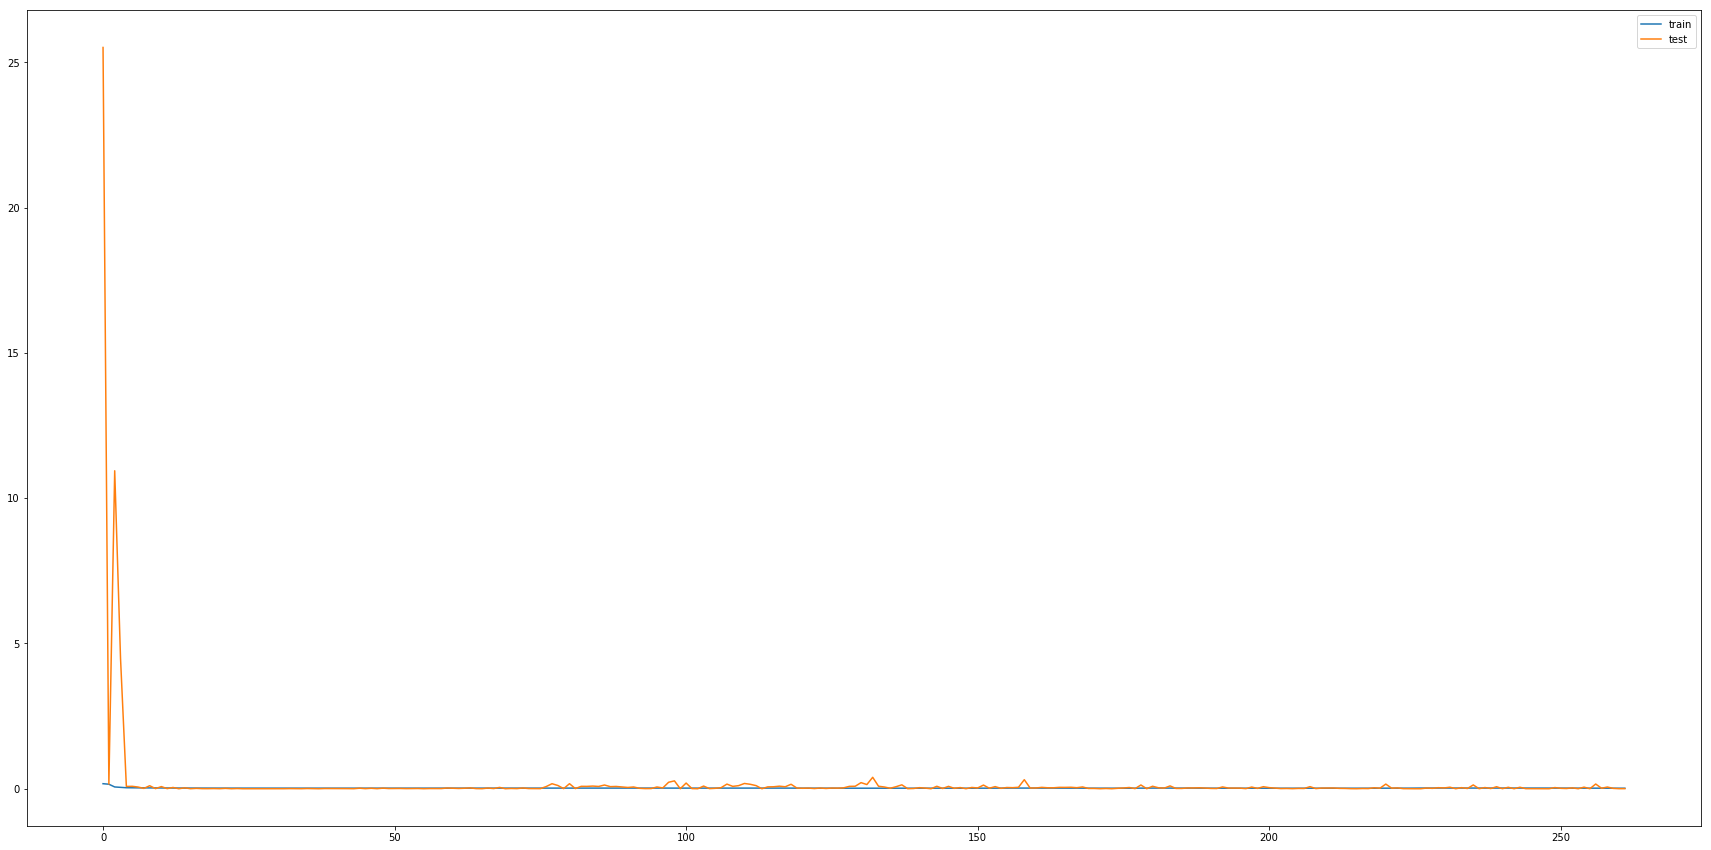

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_120 (LSTM)              (None, 896)               3376128   
_________________________________________________________________
batch_normalization_153 (Bat (None, 896)               3584      
_________________________________________________________________
dropout_170 (Dropout)        (None, 896)               0         
_________________________________________________________________
dense_120 (Dense)            (None, 1)                 897       
Total params: 3,380,609
Trainable params: 3,378,817
Non-trainable params: 1,792
_________________________________________________________________
None
Test RMSE: 333.364


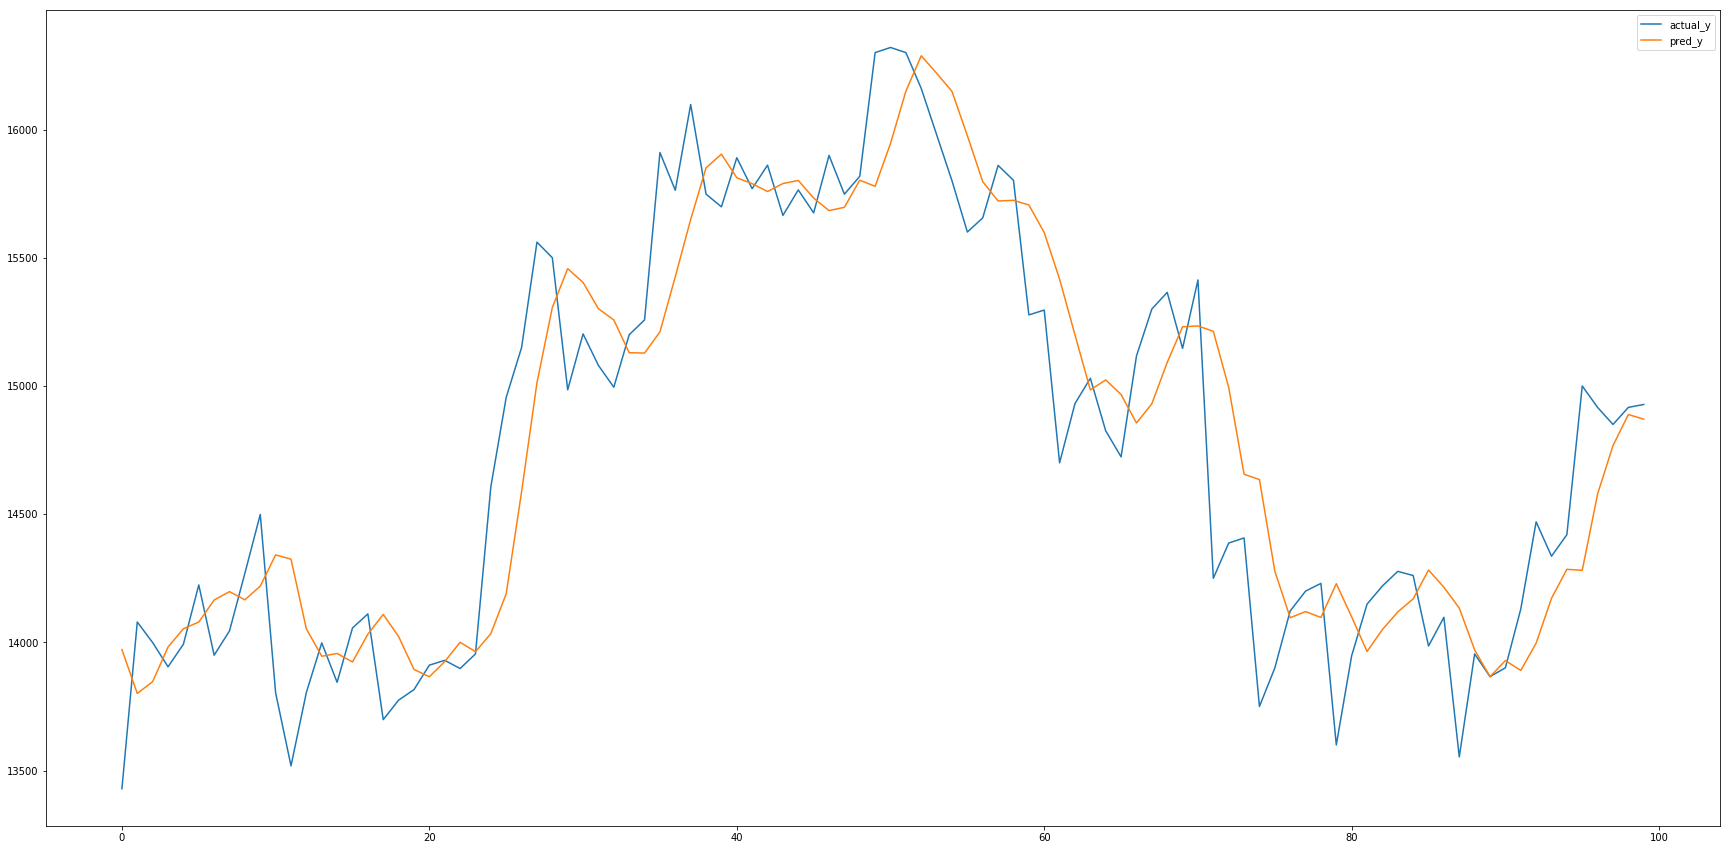

99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 1, 1, 1, 1, 1, 1, 0, 1, 1]
             precision    recall  f1-score   support

          0       0.31      0.38      0.34        40
          1       0.50      0.42      0.46        59

avg / total       0.42      0.40      0.41        99

======= 896 =======





<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_72 (Bidirectio (None, 1792)              6752256   
_________________________________________________________________
batch_normalization_154 (Bat (None, 1792)              7168      
_________________________________________________________________
dropout_171 (Dropout)        (None, 1792)              0         
_________________________________________________________________
dense_121 (Dense)            (None, 1)                 1793      
Total par

Epoch 30/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0199
Epoch 00030: val_loss did not improve
27350/27350 [==============================] - 2s 77us/step - loss: 0.0210 - val_loss: 0.0012
Epoch 31/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0198
Epoch 00031: val_loss did not improve
27350/27350 [==============================] - 2s 77us/step - loss: 0.0210 - val_loss: 0.0011
Epoch 32/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0197
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 2s 77us/step - loss: 0.0208 - val_loss: 0.0015
Epoch 33/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0194
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 2s 77us/step - loss: 0.0206 - val_loss: 0.0044
Epoch 34/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0193
Epoch 00034: val_loss did not improve
27350/27350 [======

Epoch 68/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0293
Epoch 00068: val_loss did not improve
27350/27350 [==============================] - 2s 77us/step - loss: 0.0302 - val_loss: 0.1261
Epoch 69/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0202
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 2s 77us/step - loss: 0.0211 - val_loss: 9.0111e-04
Epoch 70/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0239
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 2s 77us/step - loss: 0.0248 - val_loss: 0.0297
Epoch 71/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0238
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 2s 76us/step - loss: 0.0247 - val_loss: 0.0779
Epoch 72/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0218
Epoch 00072: val_loss did not improve
27350/27350 [==

27264/27350 [============================>.] - ETA: 0s - loss: 0.0177
Epoch 00106: val_loss did not improve
27350/27350 [==============================] - 2s 78us/step - loss: 0.0187 - val_loss: 0.0662
Epoch 107/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0180
Epoch 00107: val_loss did not improve
27350/27350 [==============================] - 2s 79us/step - loss: 0.0190 - val_loss: 0.0063
Epoch 108/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0177
Epoch 00108: val_loss did not improve
27350/27350 [==============================] - 2s 78us/step - loss: 0.0187 - val_loss: 0.0220
Epoch 109/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0181
Epoch 00109: val_loss did not improve
27350/27350 [==============================] - 2s 77us/step - loss: 0.0191 - val_loss: 0.0010
Epoch 110/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0180
Epoch 00110: val_loss did not improve
27350/27350 [===============

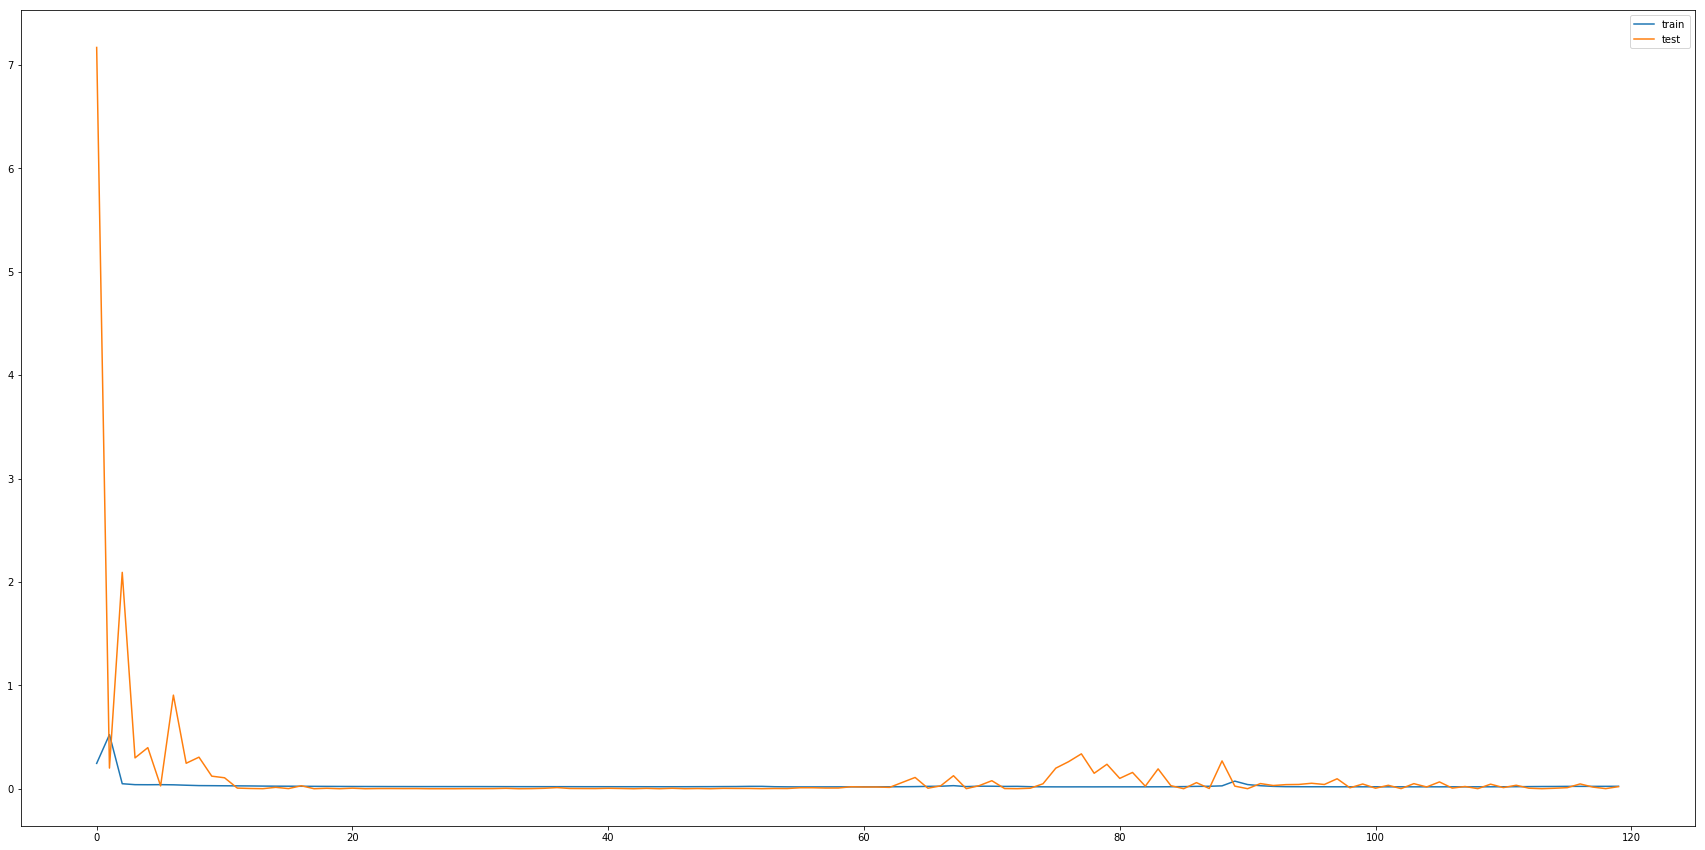

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_73 (Bidirectio (None, 1792)              6752256   
_________________________________________________________________
batch_normalization_155 (Bat (None, 1792)              7168      
_________________________________________________________________
dropout_172 (Dropout)        (None, 1792)              0         
_________________________________________________________________
dense_122 (Dense)            (None, 1)                 1793      
Total params: 6,761,217
Trainable params: 6,757,633
Non-trainable params: 3,584
_________________________________________________________________
None
Test RMSE: 333.706


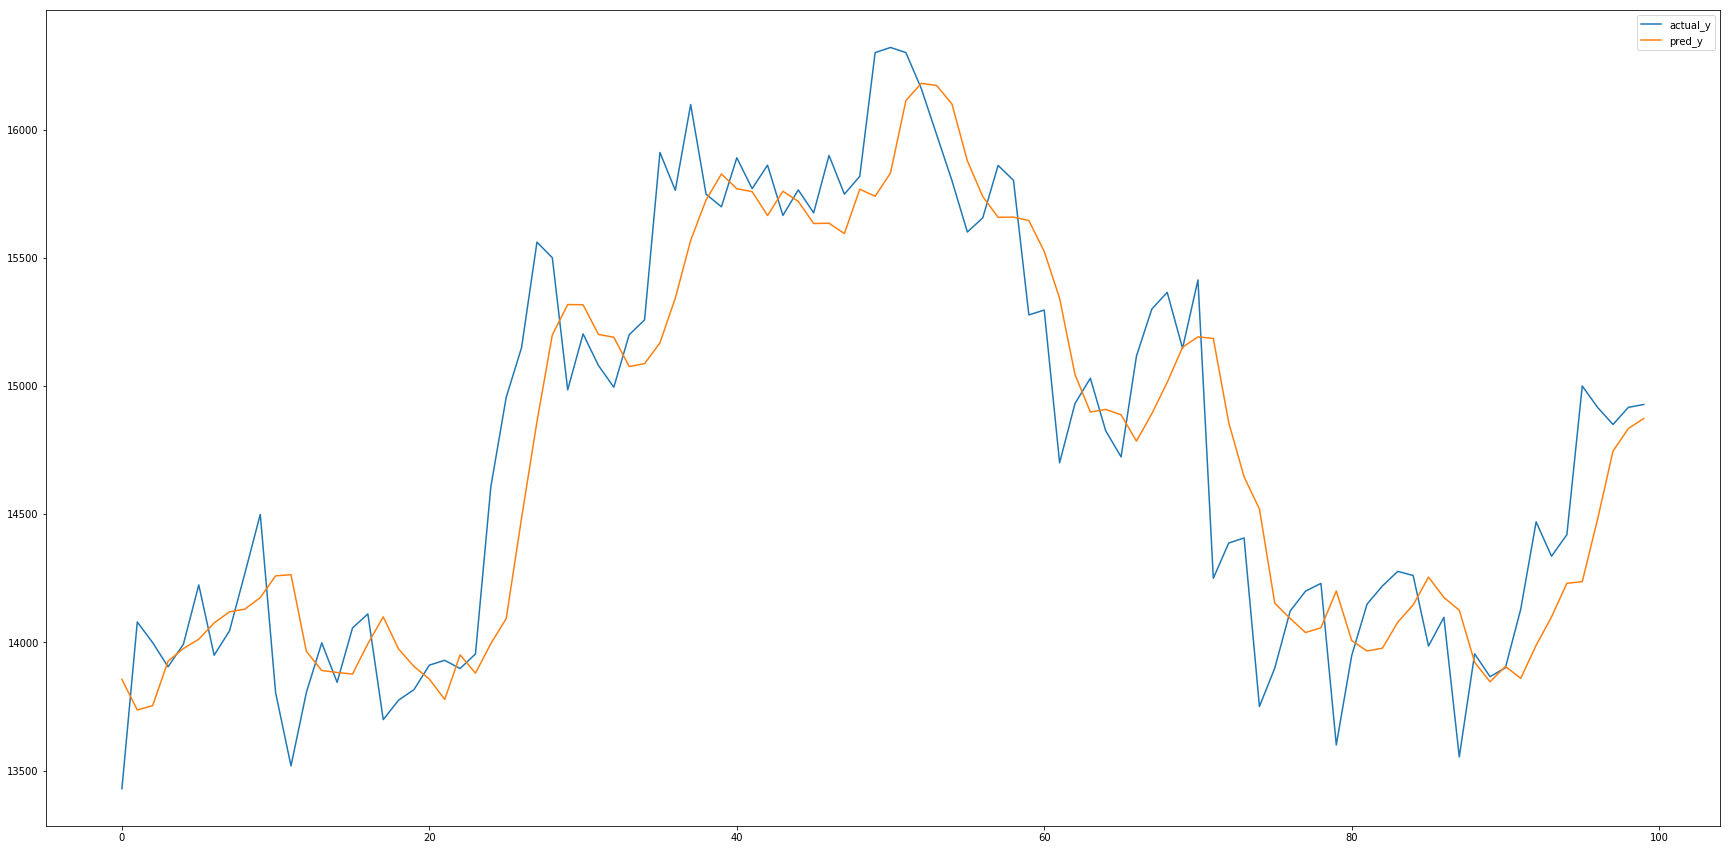

99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
             precision    recall  f1-score   support

          0       0.34      0.40      0.37        40
          1       0.54      0.47      0.50        59

avg / total       0.46      0.44      0.45        99

======= 896 =======





<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_123 (LSTM)              (None, 1024)              4382720   
_________________________________________________________________
batch_normalization_156 (Bat (None, 1024)              4096      
_________________________________________________________________
dropout_173 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_123 (Dense)            (None, 1)                 1025      
Total par

26880/27350 [============================>.] - ETA: 0s - loss: 0.0119
Epoch 00029: val_loss did not improve
27350/27350 [==============================] - 1s 51us/step - loss: 0.0206 - val_loss: 0.0069
Epoch 30/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0117
Epoch 00030: val_loss did not improve
27350/27350 [==============================] - 1s 51us/step - loss: 0.0204 - val_loss: 9.7181e-04
Epoch 31/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0116
Epoch 00031: val_loss did not improve
27350/27350 [==============================] - 1s 51us/step - loss: 0.0202 - val_loss: 0.0010
Epoch 32/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0117
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 1s 51us/step - loss: 0.0203 - val_loss: 0.0013
Epoch 33/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0116
Epoch 00033: val_loss did not improve
27350/27350 [===============

26880/27350 [============================>.] - ETA: 0s - loss: 0.0113
Epoch 00067: val_loss did not improve
27350/27350 [==============================] - 1s 50us/step - loss: 0.0190 - val_loss: 0.1856
Epoch 68/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0114
Epoch 00068: val_loss did not improve
27350/27350 [==============================] - 1s 51us/step - loss: 0.0190 - val_loss: 0.0011
Epoch 69/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0118
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 1s 51us/step - loss: 0.0193 - val_loss: 0.0136
Epoch 70/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0122
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 1s 51us/step - loss: 0.0196 - val_loss: 0.0013
Epoch 71/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0129
Epoch 00071: val_loss did not improve
27350/27350 [===================

26880/27350 [============================>.] - ETA: 0s - loss: 0.0111
Epoch 00105: val_loss did not improve
27350/27350 [==============================] - 1s 51us/step - loss: 0.0191 - val_loss: 0.0102
Epoch 106/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0108
Epoch 00106: val_loss did not improve
27350/27350 [==============================] - 1s 51us/step - loss: 0.0187 - val_loss: 0.0241
Epoch 107/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0111
Epoch 00107: val_loss did not improve
27350/27350 [==============================] - 1s 50us/step - loss: 0.0190 - val_loss: 0.0202
Epoch 108/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0107
Epoch 00108: val_loss did not improve
27350/27350 [==============================] - 1s 51us/step - loss: 0.0186 - val_loss: 0.0043
Epoch 109/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0109
Epoch 00109: val_loss did not improve
27350/27350 [===============

Epoch 143/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0189
Epoch 00143: val_loss did not improve
27350/27350 [==============================] - 1s 51us/step - loss: 0.0252 - val_loss: 0.1840
Epoch 144/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0184
Epoch 00144: val_loss did not improve
27350/27350 [==============================] - 1s 51us/step - loss: 0.0250 - val_loss: 0.0029
Epoch 145/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0167
Epoch 00145: val_loss did not improve
27350/27350 [==============================] - 1s 51us/step - loss: 0.0237 - val_loss: 0.0096
Epoch 146/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0148
Epoch 00146: val_loss did not improve
27350/27350 [==============================] - 1s 51us/step - loss: 0.0218 - val_loss: 0.0342
Epoch 147/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0145
Epoch 00147: val_loss did not improve
27350/27350 [=

Epoch 181/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0101- ET
Epoch 00181: val_loss did not improve
27350/27350 [==============================] - 1s 51us/step - loss: 0.0182 - val_loss: 4.6178e-04
Epoch 182/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0102
Epoch 00182: val_loss did not improve
27350/27350 [==============================] - 1s 51us/step - loss: 0.0182 - val_loss: 0.0012
Epoch 183/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0103
Epoch 00183: val_loss did not improve
27350/27350 [==============================] - 1s 51us/step - loss: 0.0182 - val_loss: 0.0035
Epoch 184/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0103
Epoch 00184: val_loss did not improve
27350/27350 [==============================] - 1s 51us/step - loss: 0.0182 - val_loss: 0.0018
Epoch 185/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0102
Epoch 00185: val_loss did not improve
27350/

Epoch 219/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0172
Epoch 00219: val_loss did not improve
27350/27350 [==============================] - 1s 51us/step - loss: 0.0236 - val_loss: 6.1319e-04
Epoch 220/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0162
Epoch 00220: val_loss did not improve
27350/27350 [==============================] - 1s 51us/step - loss: 0.0229 - val_loss: 0.0038
Epoch 221/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0160
Epoch 00221: val_loss did not improve
27350/27350 [==============================] - 1s 51us/step - loss: 0.0229 - val_loss: 0.0593
Epoch 222/500
26880/27350 [============================>.] - ETA: 0s - loss: 0.0149
Epoch 00222: val_loss did not improve
27350/27350 [==============================] - 1s 51us/step - loss: 0.0220 - val_loss: 0.0079
Epoch 00222: early stopping


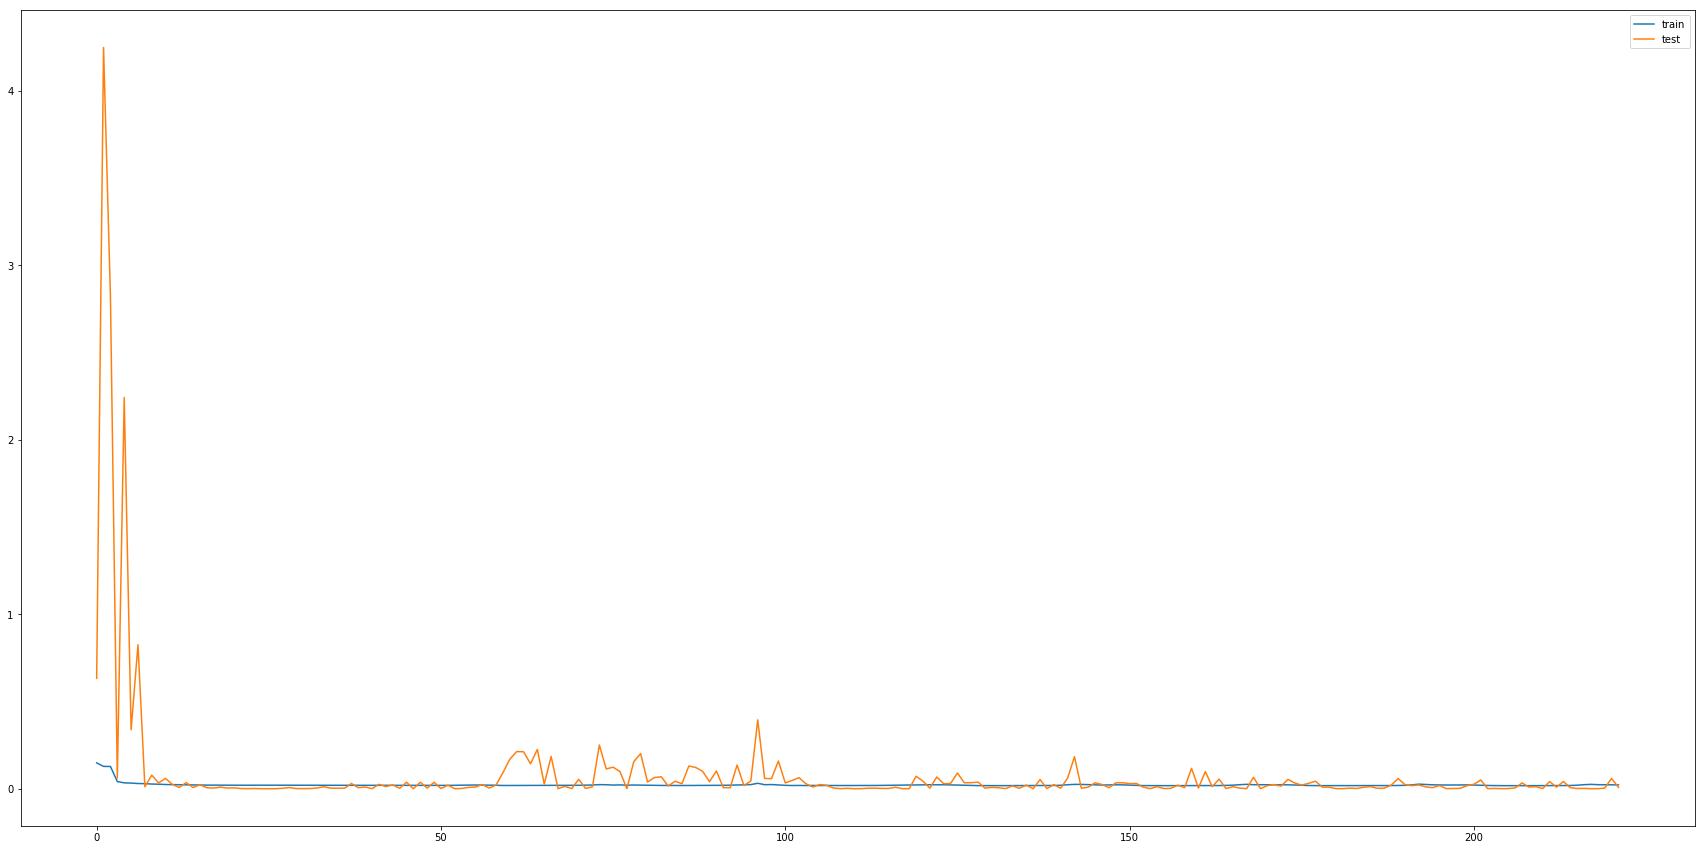

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_124 (LSTM)              (None, 1024)              4382720   
_________________________________________________________________
batch_normalization_157 (Bat (None, 1024)              4096      
_________________________________________________________________
dropout_174 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_124 (Dense)            (None, 1)                 1025      
Total params: 4,387,841
Trainable params: 4,385,793
Non-trainable params: 2,048
_________________________________________________________________
None
Test RMSE: 332.405


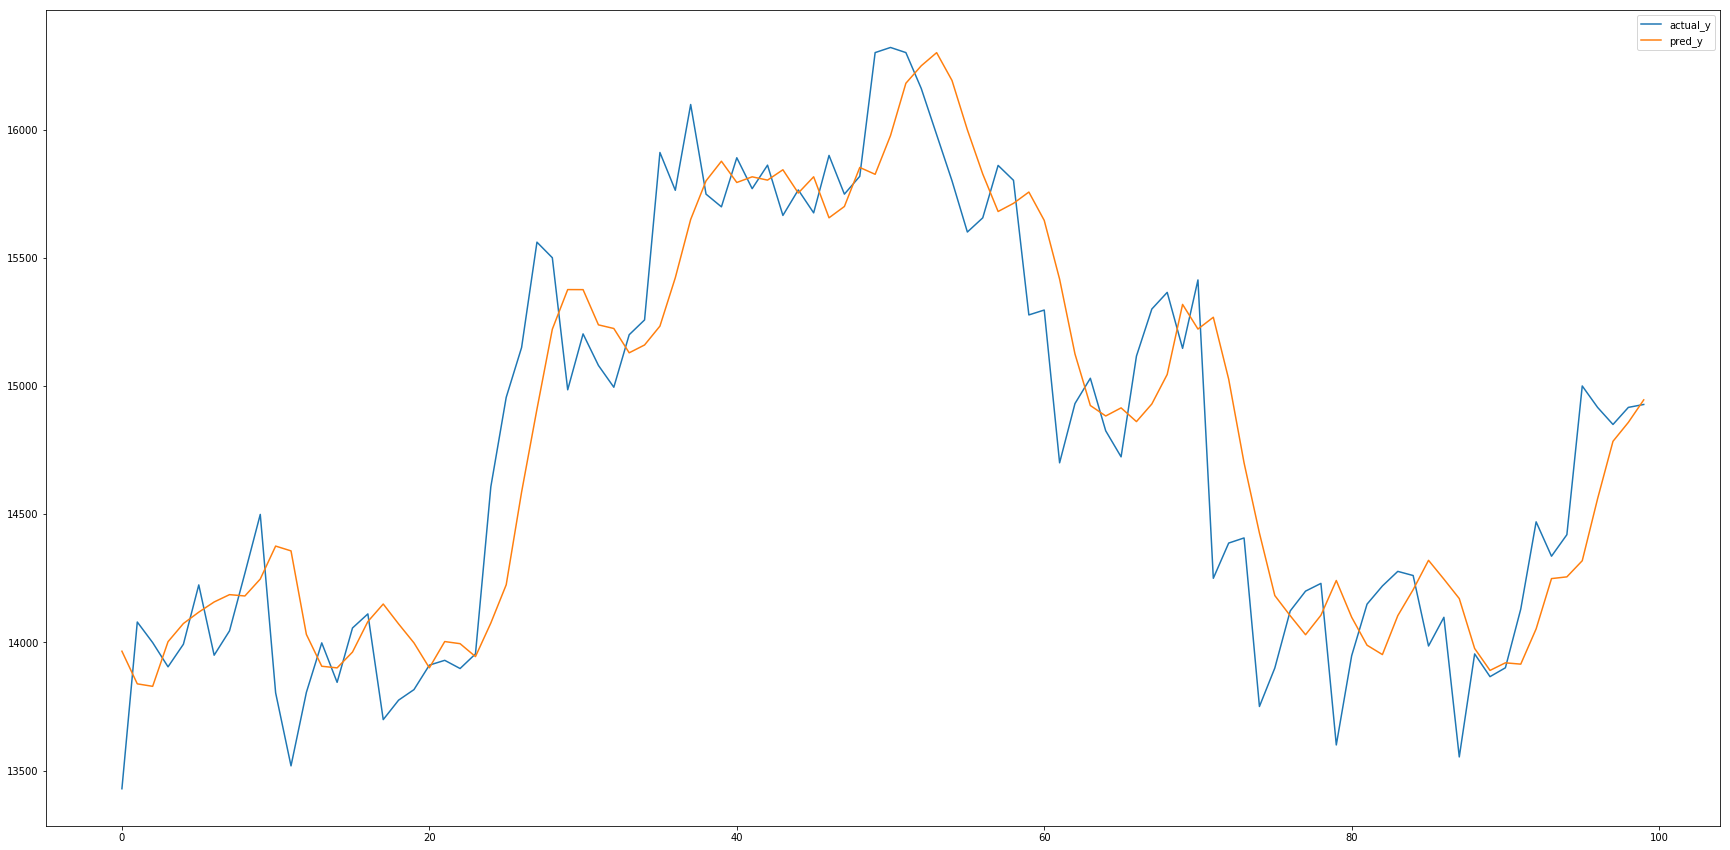

99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 0, 1, 1, 1, 1, 1, 0, 1, 1]
             precision    recall  f1-score   support

          0       0.28      0.33      0.30        40
          1       0.49      0.44      0.46        59

avg / total       0.41      0.39      0.40        99

======= 1024 =======





<type 'numpy.ndarray'>
(27350, 1, 45) (27350,) (100, 1, 45) (100,) (5000, 1, 45) (5000,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_74 (Bidirectio (None, 2048)              8765440   
_________________________________________________________________
batch_normalization_158 (Bat (None, 2048)              8192      
_________________________________________________________________
dropout_175 (Dropout)        (None, 2048)              0         
_________________________________________________________________
dense_125 (Dense)            (None, 1)                 2049      
Total pa

27264/27350 [============================>.] - ETA: 0s - loss: 0.0194
Epoch 00030: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0205 - val_loss: 0.0011
Epoch 31/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0192
Epoch 00031: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0204 - val_loss: 0.0018
Epoch 32/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0193
Epoch 00032: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0205 - val_loss: 0.0020
Epoch 33/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0190
Epoch 00033: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0201 - val_loss: 0.0019
Epoch 34/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0191
Epoch 00034: val_loss did not improve
27350/27350 [===================

27264/27350 [============================>.] - ETA: 0s - loss: 0.0285
Epoch 00068: val_loss did not improve
27350/27350 [==============================] - 3s 92us/step - loss: 0.0293 - val_loss: 0.1541
Epoch 69/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0326
Epoch 00069: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0333 - val_loss: 0.4481
Epoch 70/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0287
Epoch 00070: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0297 - val_loss: 0.0226
Epoch 71/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0218
Epoch 00071: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0230 - val_loss: 0.1692
Epoch 72/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0185
Epoch 00072: val_loss did not improve
27350/27350 [===================

27264/27350 [============================>.] - ETA: 0s - loss: 0.0167
Epoch 00106: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0178 - val_loss: 0.1264
Epoch 107/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0167
Epoch 00107: val_loss did not improve
27350/27350 [==============================] - 3s 92us/step - loss: 0.0177 - val_loss: 0.3266
Epoch 108/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0169
Epoch 00108: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0179 - val_loss: 0.2213
Epoch 109/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0172
Epoch 00109: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0181 - val_loss: 0.0634
Epoch 110/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0173
Epoch 00110: val_loss did not improve
27350/27350 [===============

Epoch 144/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0194
Epoch 00144: val_loss did not improve
27350/27350 [==============================] - 3s 93us/step - loss: 0.0206 - val_loss: 0.0643
Epoch 145/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0167
Epoch 00145: val_loss did not improve
27350/27350 [==============================] - 3s 94us/step - loss: 0.0179 - val_loss: 0.0095
Epoch 146/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0160
Epoch 00146: val_loss did not improve
27350/27350 [==============================] - 3s 94us/step - loss: 0.0172 - val_loss: 0.0063
Epoch 147/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0162
Epoch 00147: val_loss did not improve
27350/27350 [==============================] - 3s 94us/step - loss: 0.0173 - val_loss: 0.0075
Epoch 148/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0162
Epoch 00148: val_loss did not improve
27350/27350 [=

Epoch 182/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0168
Epoch 00182: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0177 - val_loss: 0.0160
Epoch 183/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0169
Epoch 00183: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0178 - val_loss: 0.0063
Epoch 184/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0173
Epoch 00184: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0180 - val_loss: 0.0012
Epoch 185/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0181
Epoch 00185: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0187 - val_loss: 0.0513
Epoch 186/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0280
Epoch 00186: val_loss did not improve
27350/27350 [=

Epoch 220/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0258
Epoch 00220: val_loss did not improve
27350/27350 [==============================] - 3s 92us/step - loss: 0.0263 - val_loss: 6.2312e-04
Epoch 221/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0231
Epoch 00221: val_loss did not improve
27350/27350 [==============================] - 3s 92us/step - loss: 0.0235 - val_loss: 0.0024
Epoch 222/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0243
Epoch 00222: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0248 - val_loss: 0.0057
Epoch 223/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0250
Epoch 00223: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0255 - val_loss: 0.0093
Epoch 224/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0257
Epoch 00224: val_loss did not improve
27350/2735

Epoch 258/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0170
Epoch 00258: val_loss did not improve
27350/27350 [==============================] - 3s 93us/step - loss: 0.0182 - val_loss: 0.0408
Epoch 259/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0161
Epoch 00259: val_loss did not improve
27350/27350 [==============================] - 3s 92us/step - loss: 0.0172 - val_loss: 0.0027
Epoch 260/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0158
Epoch 00260: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0169 - val_loss: 5.5229e-04
Epoch 261/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0158
Epoch 00261: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0169 - val_loss: 8.4588e-04
Epoch 262/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0159
Epoch 00262: val_loss did not improve
27350/

Epoch 296/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0162
Epoch 00296: val_loss did not improve
27350/27350 [==============================] - 3s 91us/step - loss: 0.0172 - val_loss: 6.1932e-04
Epoch 297/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0164
Epoch 00297: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0174 - val_loss: 0.0026
Epoch 298/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0164
Epoch 00298: val_loss did not improve
27350/27350 [==============================] - 3s 92us/step - loss: 0.0174 - val_loss: 0.0038
Epoch 299/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0165
Epoch 00299: val_loss did not improve
27350/27350 [==============================] - 3s 91us/step - loss: 0.0175 - val_loss: 0.0052
Epoch 300/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0167
Epoch 00300: val_loss did not improve
27350/2735

Epoch 334/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0199
Epoch 00334: val_loss did not improve
27350/27350 [==============================] - 3s 92us/step - loss: 0.0203 - val_loss: 0.0023
Epoch 335/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0309
Epoch 00335: val_loss did not improve
27350/27350 [==============================] - 3s 91us/step - loss: 0.0315 - val_loss: 0.0048
Epoch 336/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0229
Epoch 00336: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0236 - val_loss: 0.0165
Epoch 337/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0208
Epoch 00337: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0213 - val_loss: 0.0286
Epoch 338/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0228
Epoch 00338: val_loss did not improve
27350/27350 [=

Epoch 372/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0224
Epoch 00372: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0228 - val_loss: 0.0548
Epoch 373/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0270
Epoch 00373: val_loss did not improve
27350/27350 [==============================] - 3s 92us/step - loss: 0.0276 - val_loss: 0.0020
Epoch 374/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0220
Epoch 00374: val_loss did not improve
27350/27350 [==============================] - 3s 92us/step - loss: 0.0225 - val_loss: 0.0080
Epoch 375/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0237
Epoch 00375: val_loss did not improve
27350/27350 [==============================] - 3s 92us/step - loss: 0.0242 - val_loss: 0.0185
Epoch 376/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0260
Epoch 00376: val_loss did not improve
27350/27350 [=

Epoch 410/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0265
Epoch 00410: val_loss did not improve
27350/27350 [==============================] - 3s 92us/step - loss: 0.0275 - val_loss: 0.0562
Epoch 411/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0243
Epoch 00411: val_loss did not improve
27350/27350 [==============================] - 3s 92us/step - loss: 0.0255 - val_loss: 0.0939
Epoch 412/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0205
Epoch 00412: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0218 - val_loss: 0.1435
Epoch 413/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0177
Epoch 00413: val_loss did not improve
27350/27350 [==============================] - 2s 91us/step - loss: 0.0190 - val_loss: 0.1395
Epoch 414/500
27264/27350 [============================>.] - ETA: 0s - loss: 0.0173
Epoch 00414: val_loss did not improve
27350/27350 [=

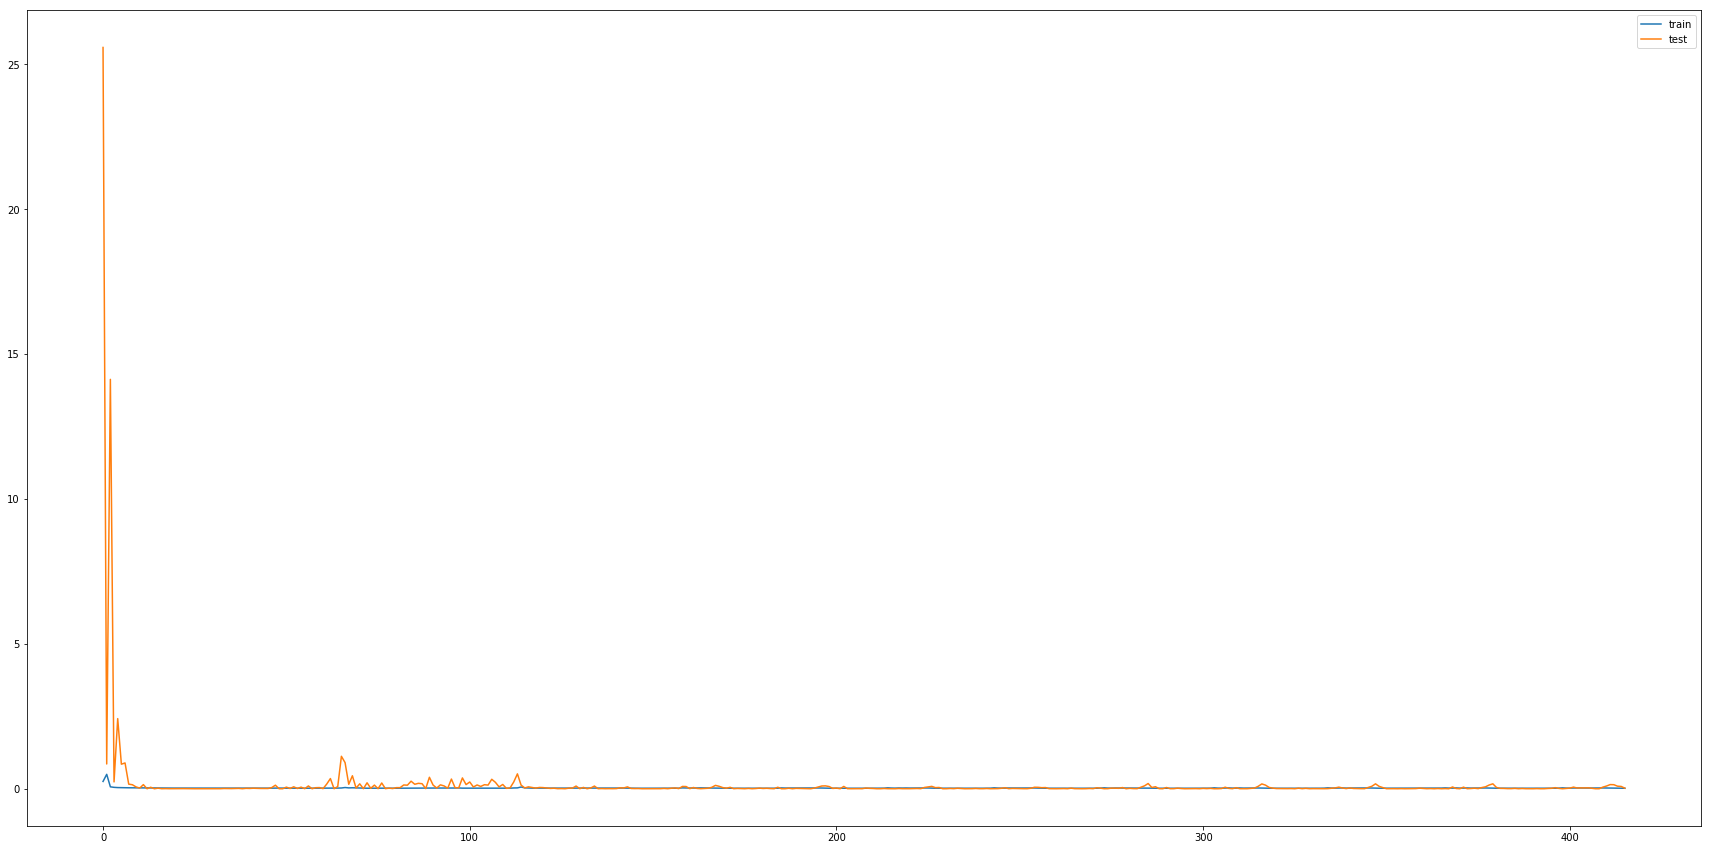

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_75 (Bidirectio (None, 2048)              8765440   
_________________________________________________________________
batch_normalization_159 (Bat (None, 2048)              8192      
_________________________________________________________________
dropout_176 (Dropout)        (None, 2048)              0         
_________________________________________________________________
dense_126 (Dense)            (None, 1)                 2049      
Total params: 8,775,681
Trainable params: 8,771,585
Non-trainable params: 4,096
_________________________________________________________________
None
Test RMSE: 343.893


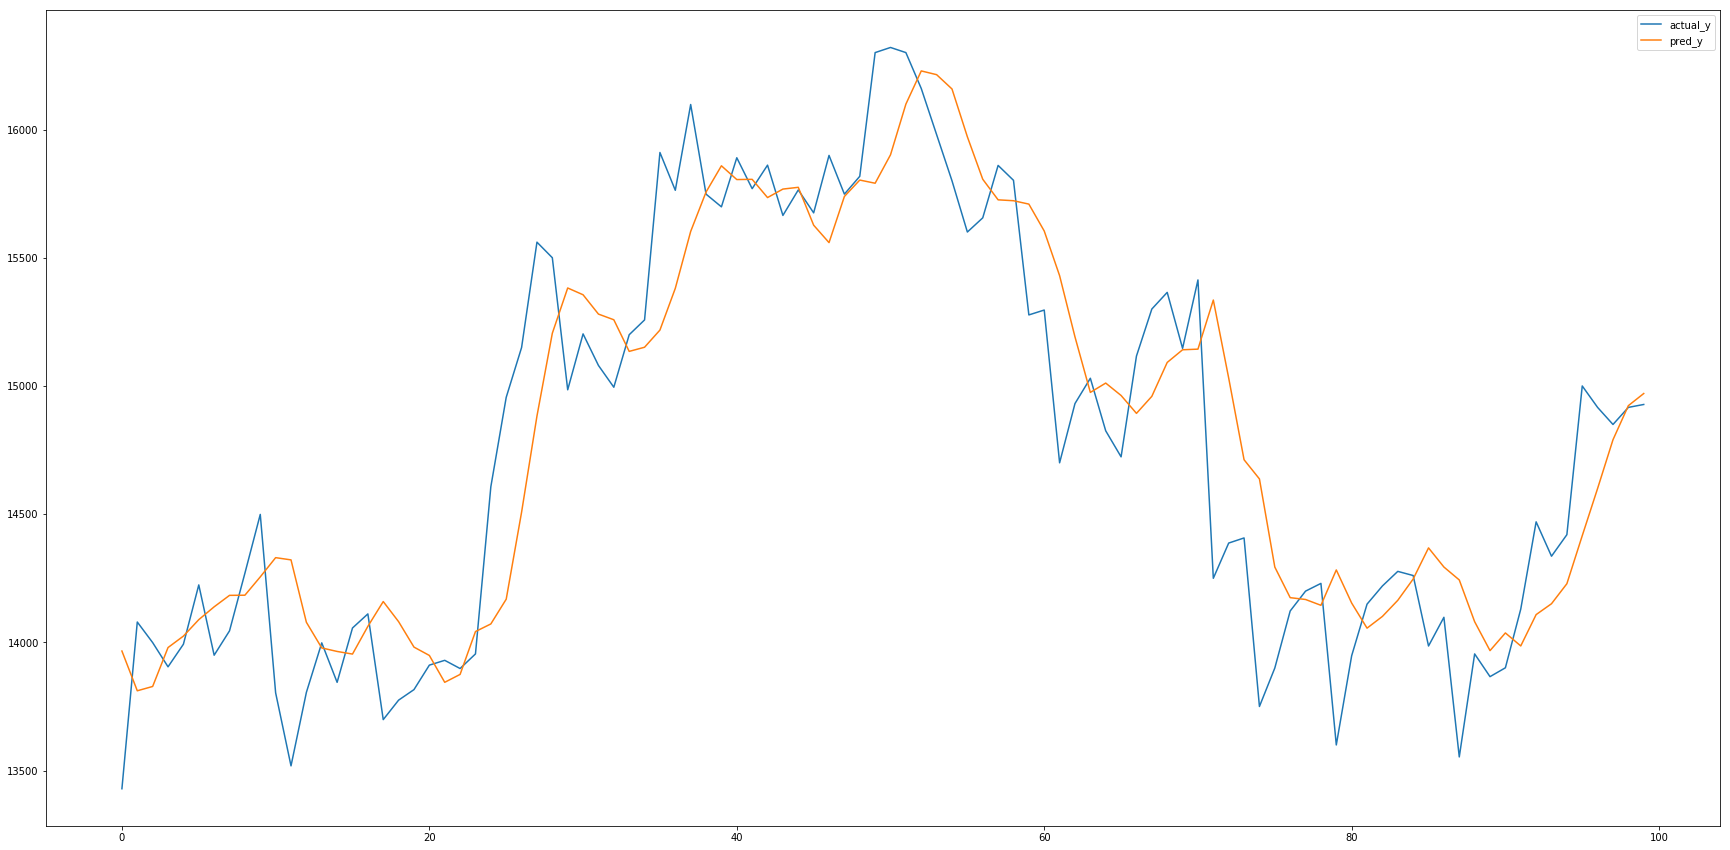

99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
             precision    recall  f1-score   support

          0       0.33      0.38      0.35        40
          1       0.53      0.47      0.50        59

avg / total       0.45      0.43      0.44        99

======= 1024 =======







In [93]:
for n in [64, 96, 128, 196, 256, 384, 512, 768, 896, 1024]:
    run_rnn('lstm1', False, n)
    print "======= %s =======\n\n\n\n\n" % n
    run_rnn('lstm1', True, n)
    print "======= %s =======\n\n\n\n\n" % n